## Import libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import zipfile
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

## Data download

In [6]:
responses = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/young_people_survey/responses.csv')
columns = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/young_people_survey/columns.csv')

## Data processing

Dataset contains both numeric and categorical data. Dataset also contains missing data. Therefore, it is necessary to process the data before working with them.

### categorical data

In [7]:
pd.set_option('display.max_rows', None)
responses.dtypes

Music                             float64
Slow songs or fast songs          float64
Dance                             float64
Folk                              float64
Country                           float64
Classical music                   float64
Musical                           float64
Pop                               float64
Rock                              float64
Metal or Hardrock                 float64
Punk                              float64
Hiphop, Rap                       float64
Reggae, Ska                       float64
Swing, Jazz                       float64
Rock n roll                       float64
Alternative                       float64
Latino                            float64
Techno, Trance                    float64
Opera                             float64
Movies                            float64
Horror                            float64
Thriller                          float64
Comedy                            float64
Romantic                          

Translating all categorical data into numerical data

Smoking column

The four answer choices are:
* Never smoked (0)
* Tried smoking (1)
* Former smoker (2)
* Current smoker (3)

Replace the words with numbers that will indicate the degree of relationship between the person and cigarettes (0 - never smoked, 3 - current smoker).

In [8]:
name_colum = 'Smoking'
responses.loc[responses[name_colum] == 'never smoked', name_colum] = 0
responses.loc[responses[name_colum] == 'tried smoking', name_colum] = 1
responses.loc[responses[name_colum] == 'former smoker', name_colum] = 2
responses.loc[responses[name_colum] == 'current smoker', name_colum] = 3
#responses[name_colum]

Alcohol column.

Three choices:
* Never (0)
* Social drinker (1)
* Drink a lot (2)

Replace the words with numbers, which will interpret the degree of interrelation of a person with alcohol (0 - never, 2 - drink a lot).

In [9]:
name_colum = 'Alcohol'
responses.loc[responses[name_colum] == 'never', name_colum] = 0
responses.loc[responses[name_colum] == 'social drinker', name_colum] = 1
responses.loc[responses[name_colum] == 'drink a lot', name_colum] = 2
#responses[name_colum]

Punctuality column.

Three choices:
* I am often early. (2)
* I am always on time. (1)
* I am often running late. (0)

Replace the words with numbers that will represent the degree of punctuality of a person (0 - I am often running late, 2 - I am often early.).

In [10]:
name_colum = 'Punctuality'
responses.loc[responses[name_colum] == 'i am often early', name_colum] = 2
responses.loc[responses[name_colum] == 'i am always on time', name_colum] = 1
responses.loc[responses[name_colum] == 'i am often running late', name_colum] = 0
#responses[name_colum]

Lying column.

The four answer choices are:
* Never (0)
* Only to avoid hurting someone (1)
* Sometimes (2)
* Everytime it suits me (3)

Replace the words with numbers that will interpret how often a person lies (0 - Never, 3 - Everytime it suits me).

In [11]:
name_colum = 'Lying'
responses.loc[responses[name_colum] == 'never', name_colum] = 0
responses.loc[responses[name_colum] == 'only to avoid hurting someone', name_colum] = 1
responses.loc[responses[name_colum] == 'sometimes', name_colum] = 2
responses.loc[responses[name_colum] == 'everytime it suits me', name_colum] = 3
#responses[name_colum]

Internet usage column.

Four answer choices:
* No time at all (0)
* Less than an hour a day (1)
* Few hours a day (2)
* Most of the day (3)

Replace the words with numbers, which will interprit how often a person sits on the Internet during the day (0 - No time at all, 3 - Most of the day).

In [12]:
name_colum = 'Internet usage'
responses.loc[responses[name_colum] == 'no time at all', name_colum] = 0
responses.loc[responses[name_colum] == 'less than an hour a day', name_colum] = 1
responses.loc[responses[name_colum] == 'few hours a day', name_colum] = 2
responses.loc[responses[name_colum] == 'most of the day', name_colum] = 3
#responses[name_colum]

Gender column

The two answer choices are:
* Female (0)
* Male (1)

Replace the words with numbers, which will interpret the gender of the person (0 - female, 1 - male).

In [13]:
name_colum = 'Gender'
responses.loc[responses[name_colum] == 'female', name_colum ] = 0
responses.loc[responses[name_colum] == 'male', name_colum ] = 1
#responses[name_colum]

column Left - right handed.

Two answer choices:
* Left handed (0)
* Right handed (1)

Replace the words with numbers, which will interpret which hand a person writes with (0 - left handed, 1 - right handed).

In [14]:
name_colum = 'Left - right handed'
responses.loc[responses[name_colum] == 'left handed', name_colum ] = 0
responses.loc[responses[name_colum] == 'right handed', name_colum ] = 1
#responses[name_colum]

Education column.

Six answer choices:
* Currently a Primary school pupil (0)
* Primary school (1)
* Secondary school (2)
* College/Bachelor degree (3)
* Masters degree (4)
* Doctorate degree (5)

Replace the words with numbers that will represent the person's education (0 - Currently a Primary school pupil, 5 - Doctorate degree).

In [15]:
name_colum = 'Education'
responses.loc[responses[name_colum] == 'currently a primary school pupil', name_colum ] = 0
responses.loc[responses[name_colum] == 'primary school', name_colum ] = 1
responses.loc[responses[name_colum] == 'secondary school', name_colum ] = 2
responses.loc[responses[name_colum] == 'college/bachelor degree', name_colum ] = 3
responses.loc[responses[name_colum] == 'masters degree', name_colum ] = 4
responses.loc[responses[name_colum] == 'doctorate degree', name_colum ] = 5
#responses[name_colum]

Only child column.

Two answer choices:
* No (0)
* Yes (1)

Replace the words with numbers that will interprit the person is the only child in the family or not (0 - No, 1 - Yes).

In [16]:
name_colum = 'Only child'
responses.loc[responses[name_colum] == 'no', name_colum ] = 0
responses.loc[responses[name_colum] == 'yes', name_colum ] = 1
#responses[name_colum]

Village column - town.

Two answer choices:
* City (0)
* Village (1)

Replace the words with numbers, which will interprit the place where the person lives (0 - city, 1 - village).

In [17]:
name_colum = 'Village - town'
responses.loc[responses[name_colum] == 'city', name_colum ] = 0
responses.loc[responses[name_colum] == 'village', name_colum ] = 1
#responses[name_colum]

House column - block of flats.

Two answers:
* block of flats (0)
* house/bungalow (1)

Replace the words with numbers, which will interprit where the person lived most of his/her childhood (0 - block of flats, 1 - house/bungalow).

In [18]:
name_colum = 'House - block of flats'
responses.loc[responses[name_colum] == 'block of flats', name_colum ] = 0
responses.loc[responses[name_colum] == 'house/bungalow', name_colum ] = 1
#responses[name_colum]

Since we have a questionnaire where people gave personal information about themselves, it is better to delete the lines with missing values.

In [19]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
responses.dropna(inplace=True)
responses

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0,1,3,0,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0,1,3,0,0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0,1,2,0,0,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0,1,2,0,1,1
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,1,1,2,0,0,0
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,0,1,2,0,0,1
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,0,1,2,1,0,0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,0,1,3,0,0,0


## First part

Evaluate students' musical preferences (columns 0-18):
* What musical interest groups can be distinguished on the basis of these data?
* What genres do the largest number of students prefer?
* After clustering, let's determine if music preference affects film preferences? 



Select from the main table the columns that correspond to preferences in music and the columns that correspond to preferences in films.

In [20]:
MusicPrefered = responses.loc[:,"Music":"Opera"]
MoviePrefered = responses.loc[:,"Movies":"Action"]

Divide people into clusters regarding their preferences in music.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

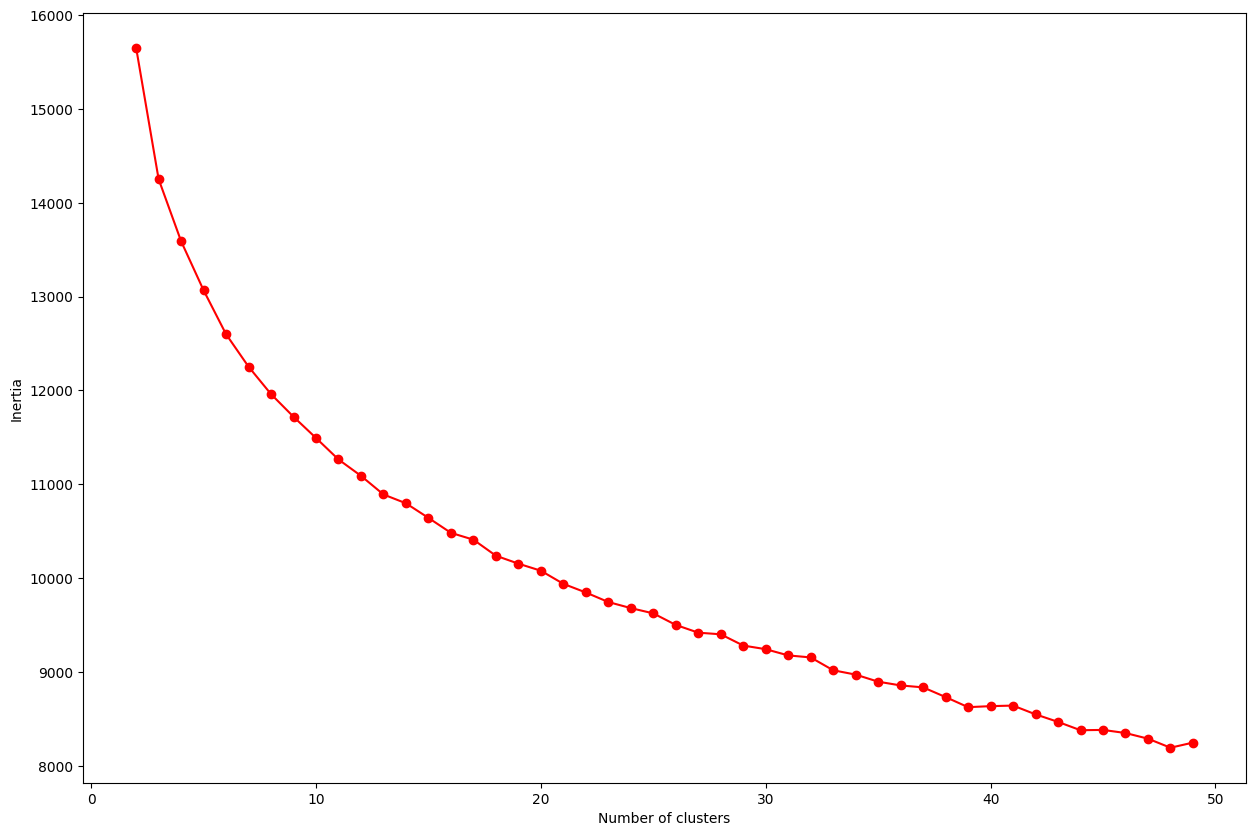

In [21]:
x = list(range(2, 50))
inertia = []
for k in x:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_transform(MusicPrefered)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(x, inertia, '-r')
plt.plot(x, inertia, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
#categorising people into 11 groups
kmeans = KMeans(n_clusters=11)
kmeans.fit_transform(MusicPrefered)
cl = kmeans.labels_

group_0 = []
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []
group_6 = []
group_7 = []
group_8 = []
group_9 = []
group_10 = []
for i in range(len(cl)):
  if cl[i] == 0:
    group_0.append(i)
  if cl[i] == 1:
    group_1.append(i)
  if cl[i] == 2:
    group_2.append(i)
  if cl[i] == 3:
    group_3.append(i)
  if cl[i] == 4:
    group_4.append(i)
  if cl[i] == 5:
    group_5.append(i)
  if cl[i] == 6:
    group_6.append(i)
  if cl[i] == 7:
    group_7.append(i)
  if cl[i] == 8:
    group_8.append(i)
  if cl[i] == 9:
    group_9.append(i)
  if cl[i] == 10:
    group_10.append(i)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
print(group_0)
print(group_1)
print(group_2)
print(group_3)
print(group_4)
print(group_5)
print(group_6)
print(group_7)
print(group_8)
print(group_9)
print(group_10)

[4, 12, 16, 28, 45, 46, 54, 59, 78, 89, 95, 99, 104, 111, 115, 118, 139, 145, 149, 153, 162, 176, 194, 202, 220, 261, 266, 270, 302, 303, 308, 318, 326, 338, 344, 349, 356, 374, 422, 434, 438, 452, 462, 470, 471, 480, 482, 505, 507, 519, 525, 553, 568, 574, 584, 593, 599, 604, 609, 619, 621, 623, 632, 634, 646, 651, 654, 657]
[26, 32, 35, 66, 108, 119, 137, 141, 142, 143, 144, 152, 168, 178, 207, 231, 232, 248, 254, 260, 262, 272, 291, 294, 296, 305, 309, 313, 325, 327, 329, 377, 378, 382, 415, 417, 418, 420, 430, 435, 439, 448, 459, 467, 474, 515, 541, 544, 545, 546, 548, 578, 585, 611, 614, 629, 665, 667, 669]
[8, 23, 24, 31, 37, 44, 48, 52, 60, 62, 63, 67, 74, 83, 85, 103, 106, 109, 117, 150, 165, 180, 185, 201, 233, 236, 240, 256, 268, 290, 306, 307, 315, 334, 364, 368, 373, 391, 402, 403, 405, 406, 416, 424, 425, 426, 427, 433, 442, 456, 463, 465, 469, 477, 486, 495, 504, 510, 512, 521, 527, 529, 532, 536, 573, 579, 580, 581, 582, 583, 618, 627, 637, 642, 655, 668]
[0, 9, 30, 50, 

Consider the music preferences of people from different clusters.

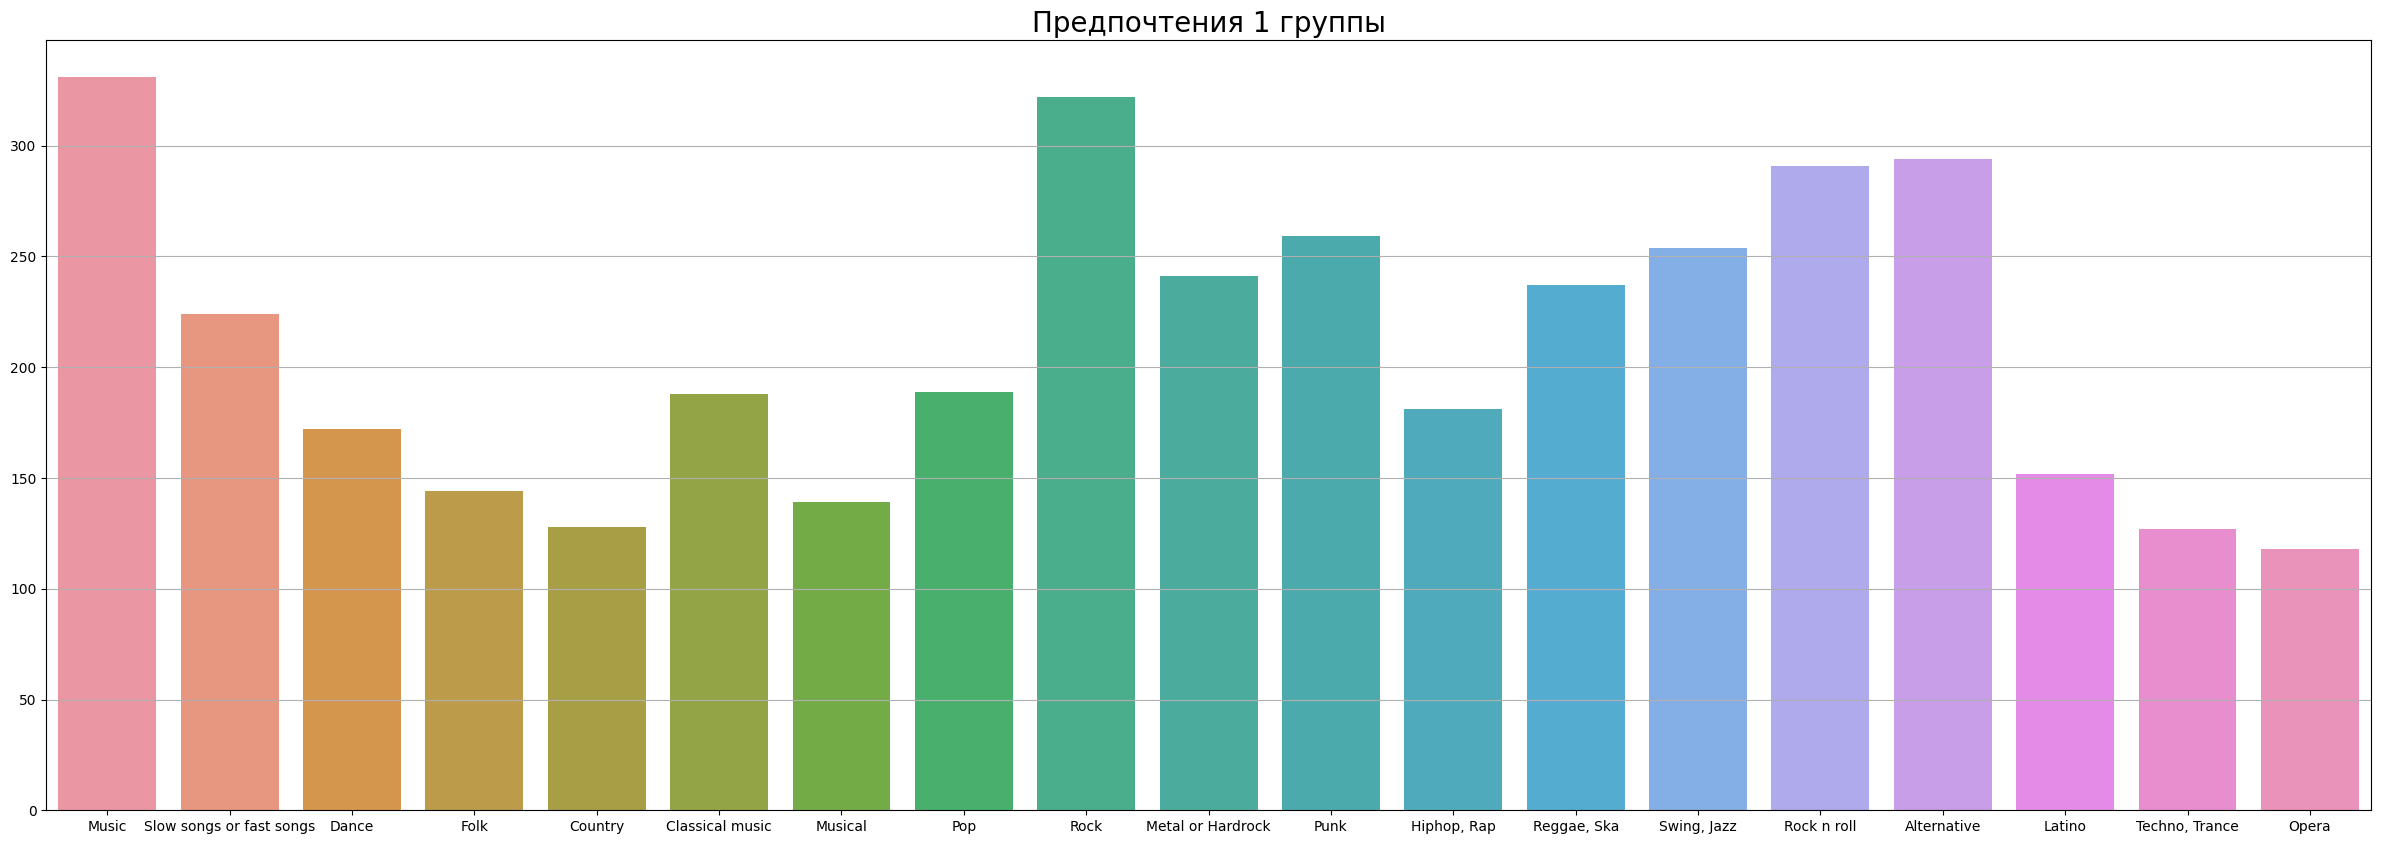

In [24]:
g_ = []
for i in group_0:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x=MusicPrefered.columns.values, y=sum)
ax.set_title('Group 1 preferences', fontsize=20)
plt.show()

<b>Note:</b>


This cluster of people prefer rock, rock n roll, alternative. We can say that this group of people likes loud, heavy, rhythmic music

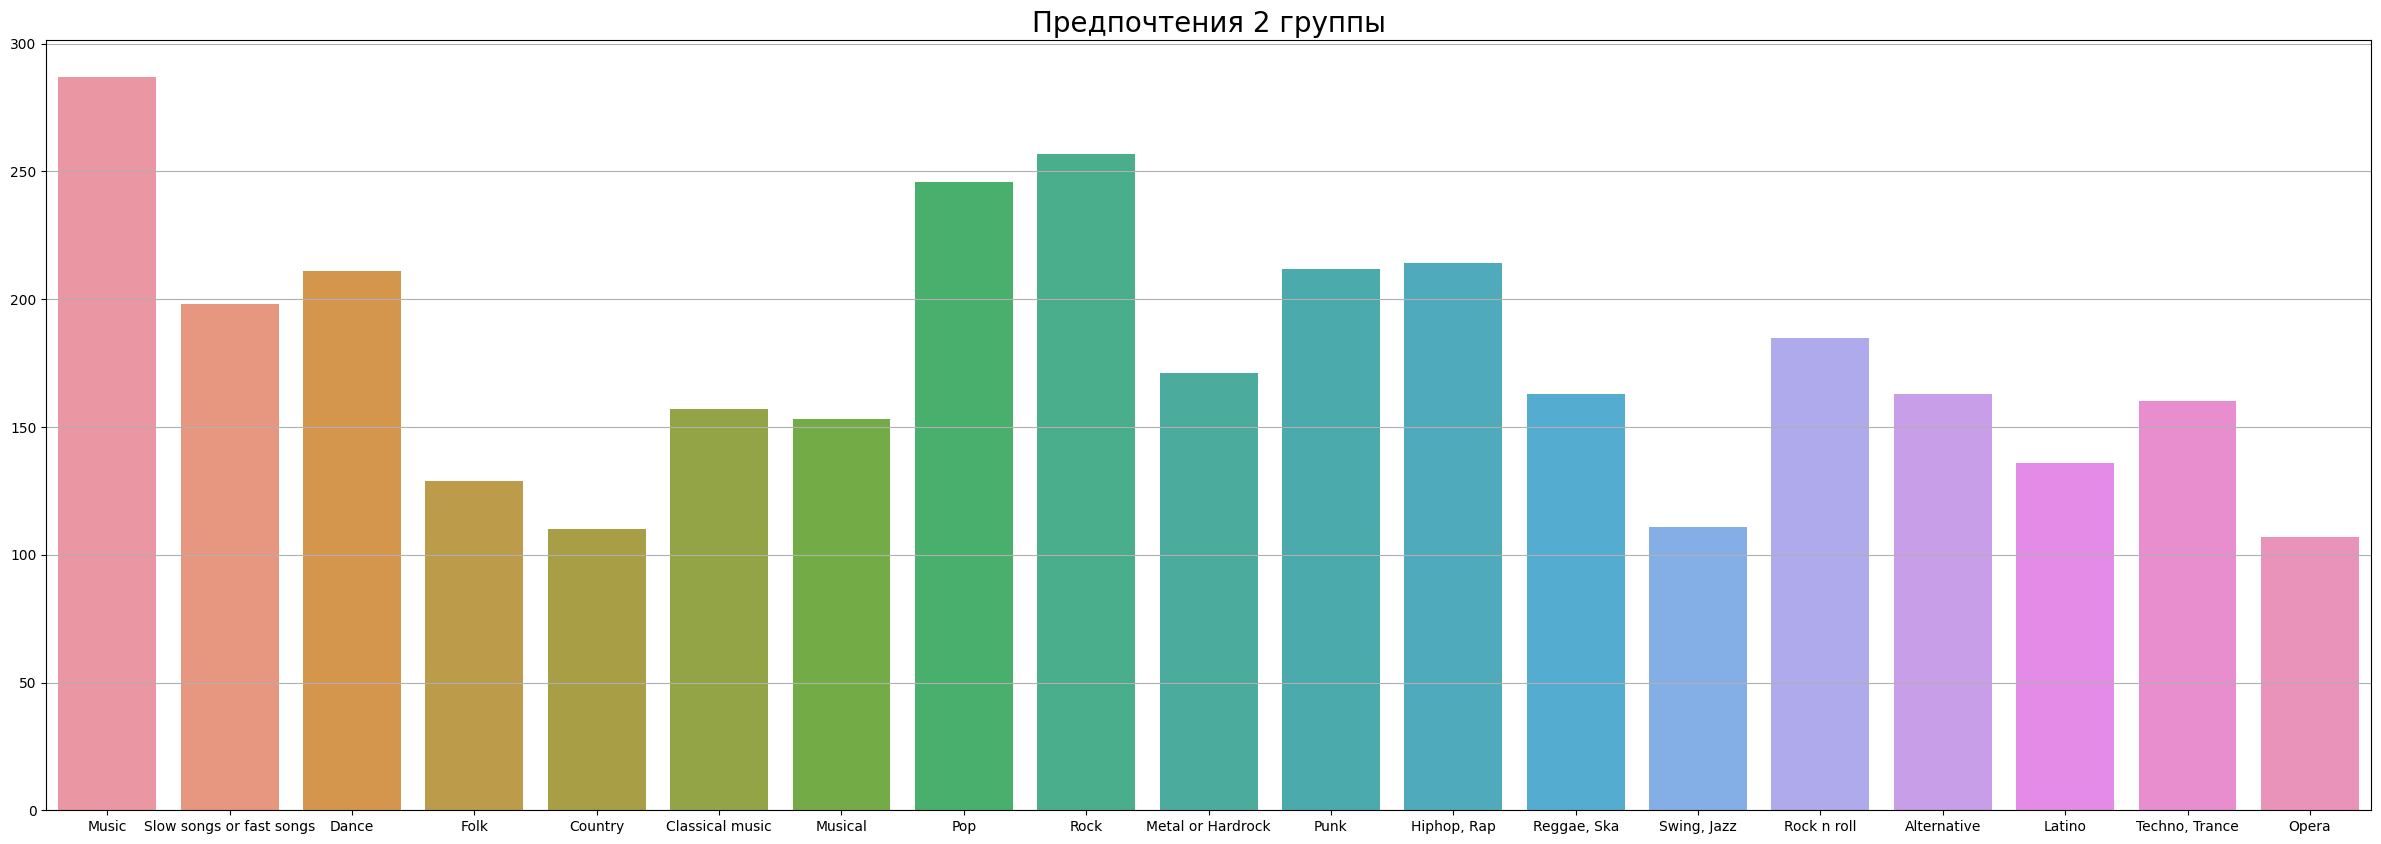

In [25]:
g_ = []
for i in group_1:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x=MusicPrefered.columns.values, y=sum)
ax.set_title('Group 2 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer rock, pop, dance. We can say that this group of people likes fun, dance, rhythmic music.

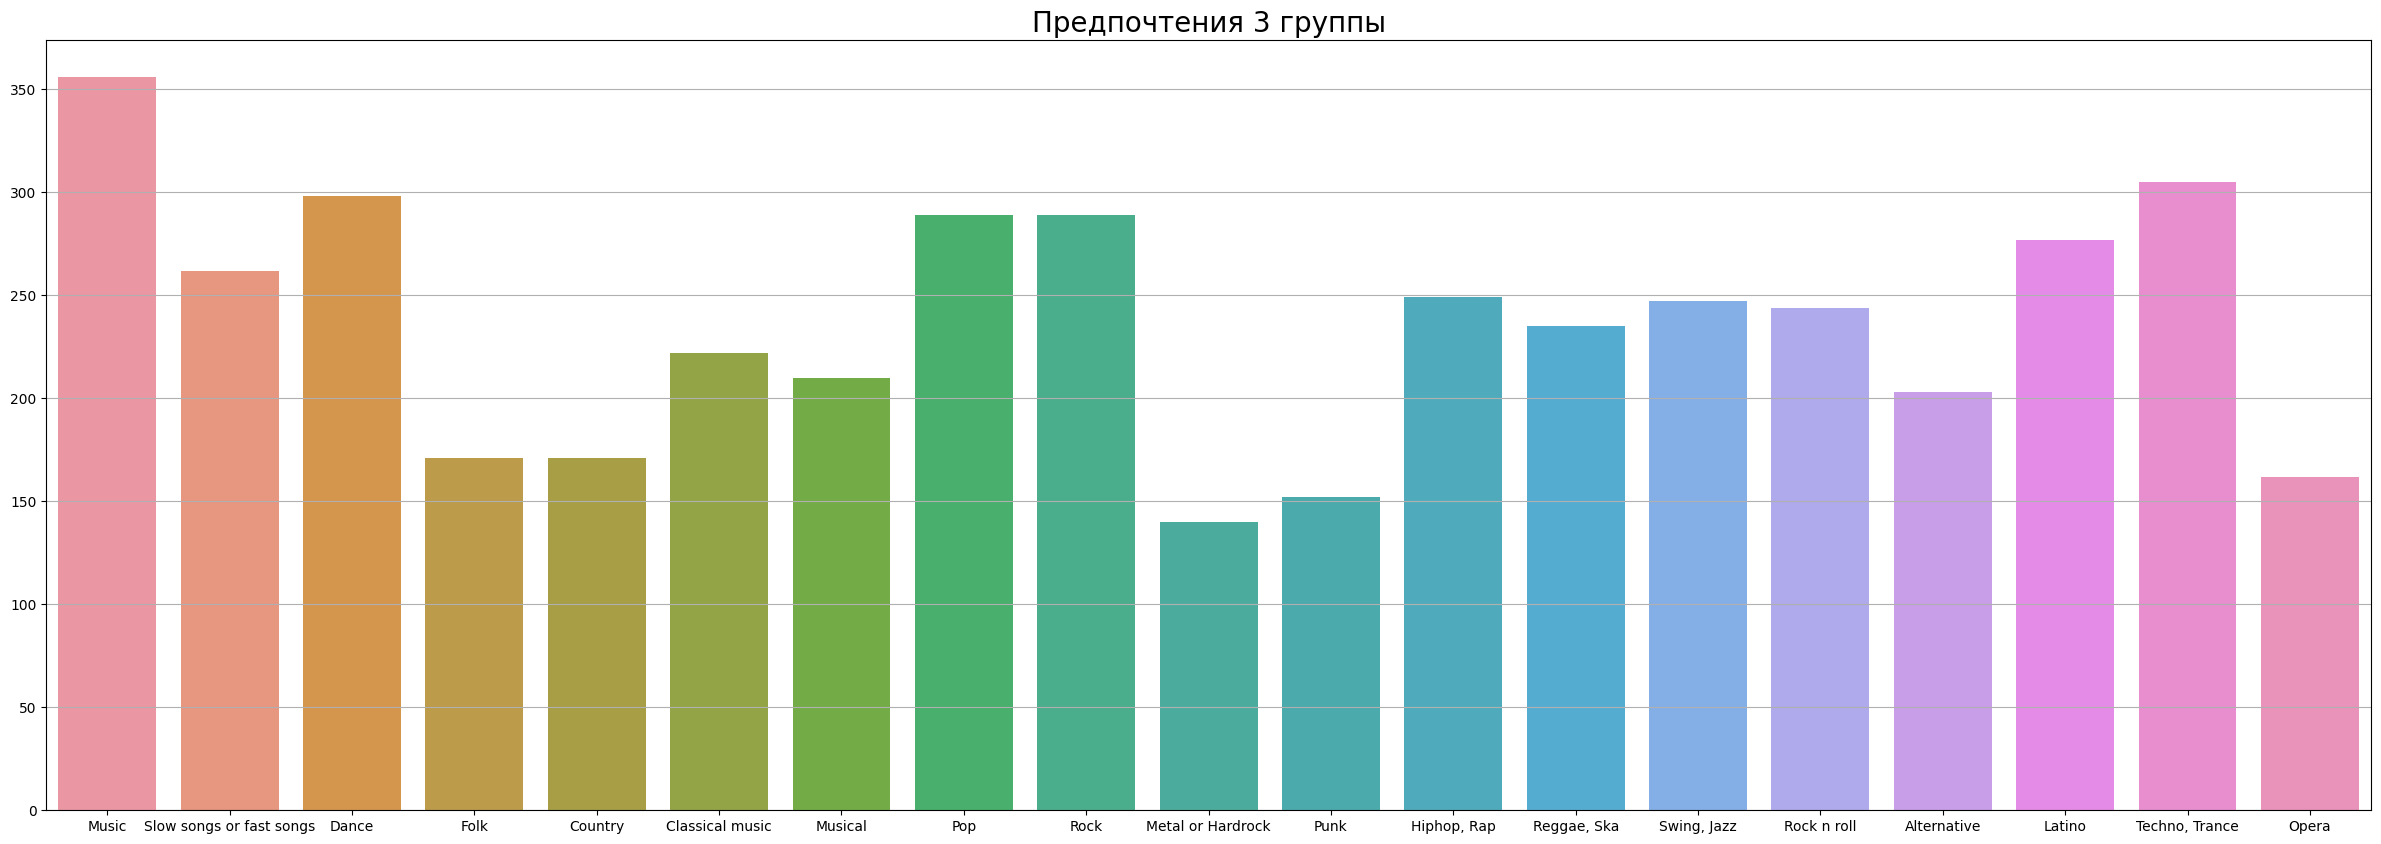

In [26]:
g_ = []
for i in group_2:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x=MusicPrefered.columns.values, y=sum)
ax.set_title('Group 3 preferences', fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer dance, pop, hiphop\rap, slow songs or fast songs, echno, Trance. It can be said that this group of people likes fun, dance music, perhaps such people are engaged in dancing.

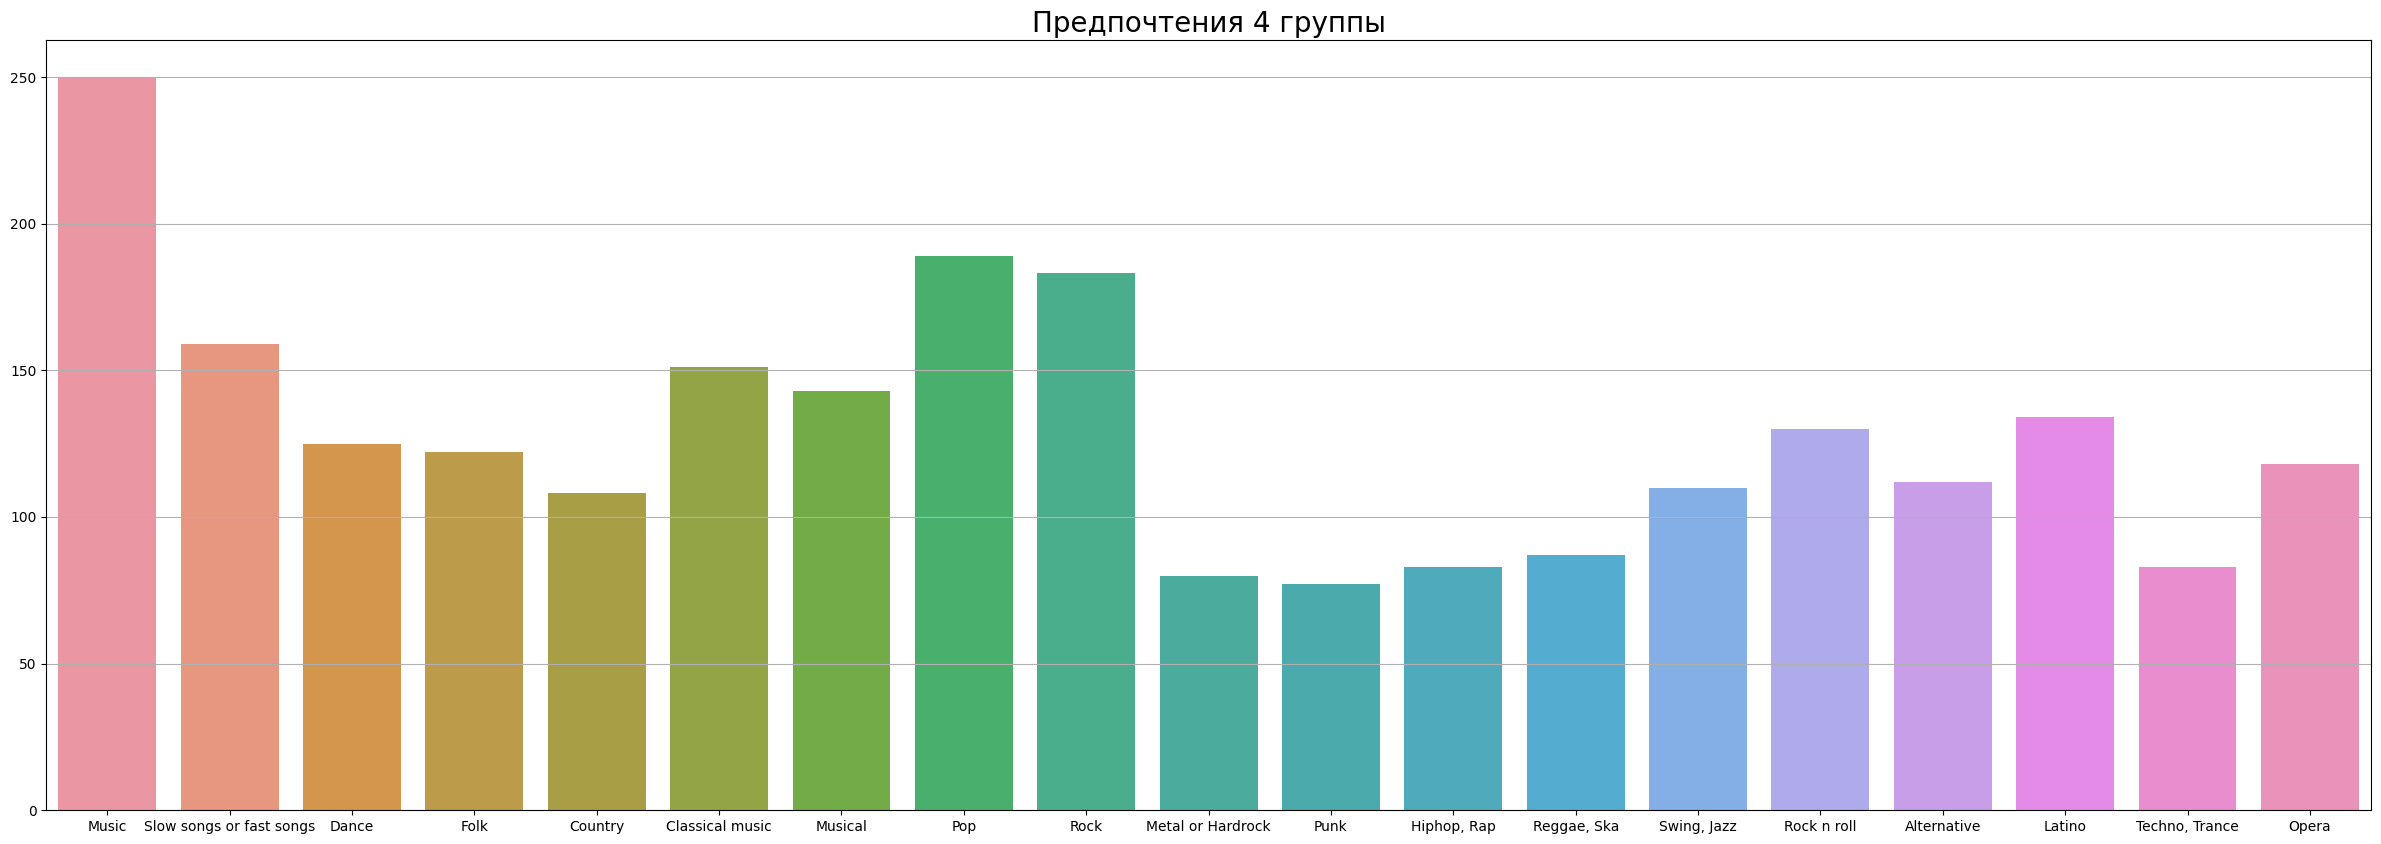

In [27]:
g_ = []
for i in group_3:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x=MusicPrefered.columns.values, y=sum)
ax.set_title('Group 4 preferences', fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer rock, metal/hardrock, punk, swing/jazz, rock n roll, alternative. We can say that this group of people likes heavy, loud music, but at the same time, this group likes slow, measured jazz.

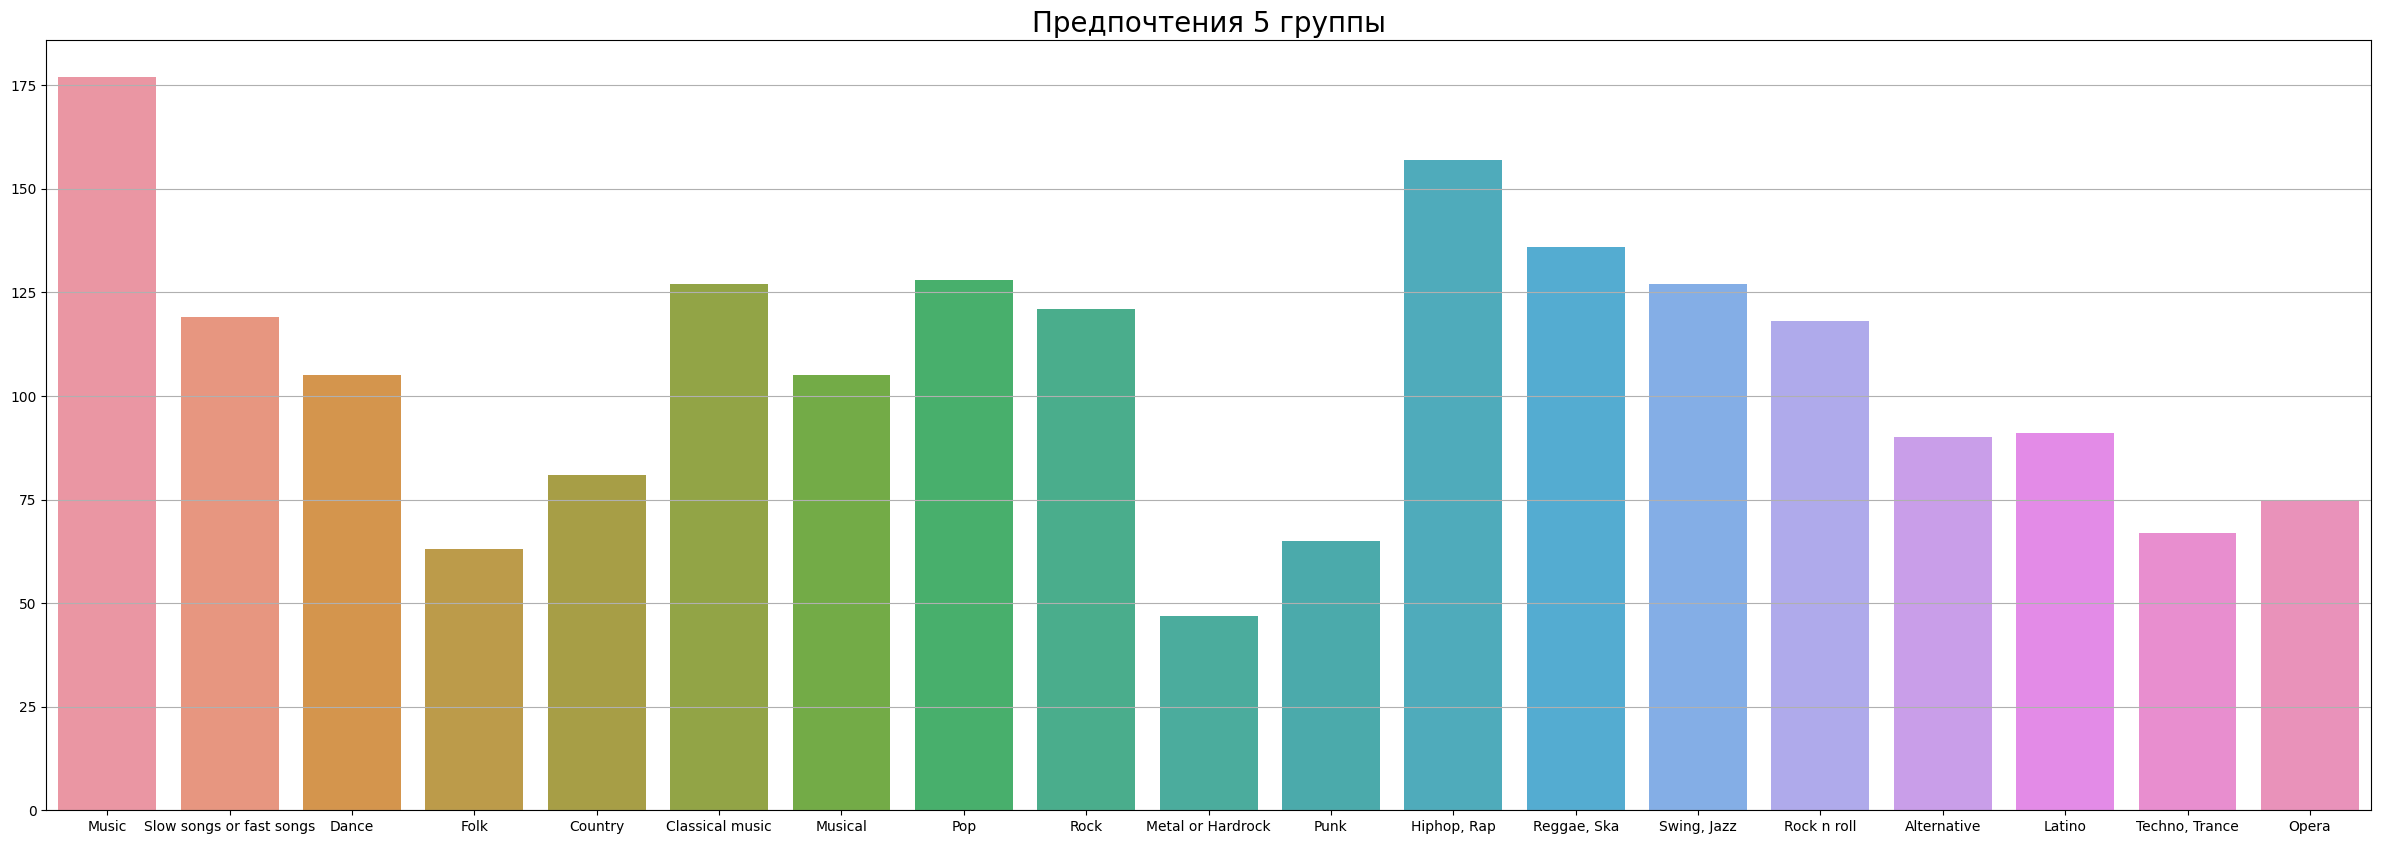

In [28]:
g_ = []
for i in group_4:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x=MusicPrefered.columns.values, y=sum)
ax.set_title('Group 5 preferences', fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefers dance, classical music, musical, pop, rock, latino. We can say that this group of people likes rhythmic, dimensional, melodic music.

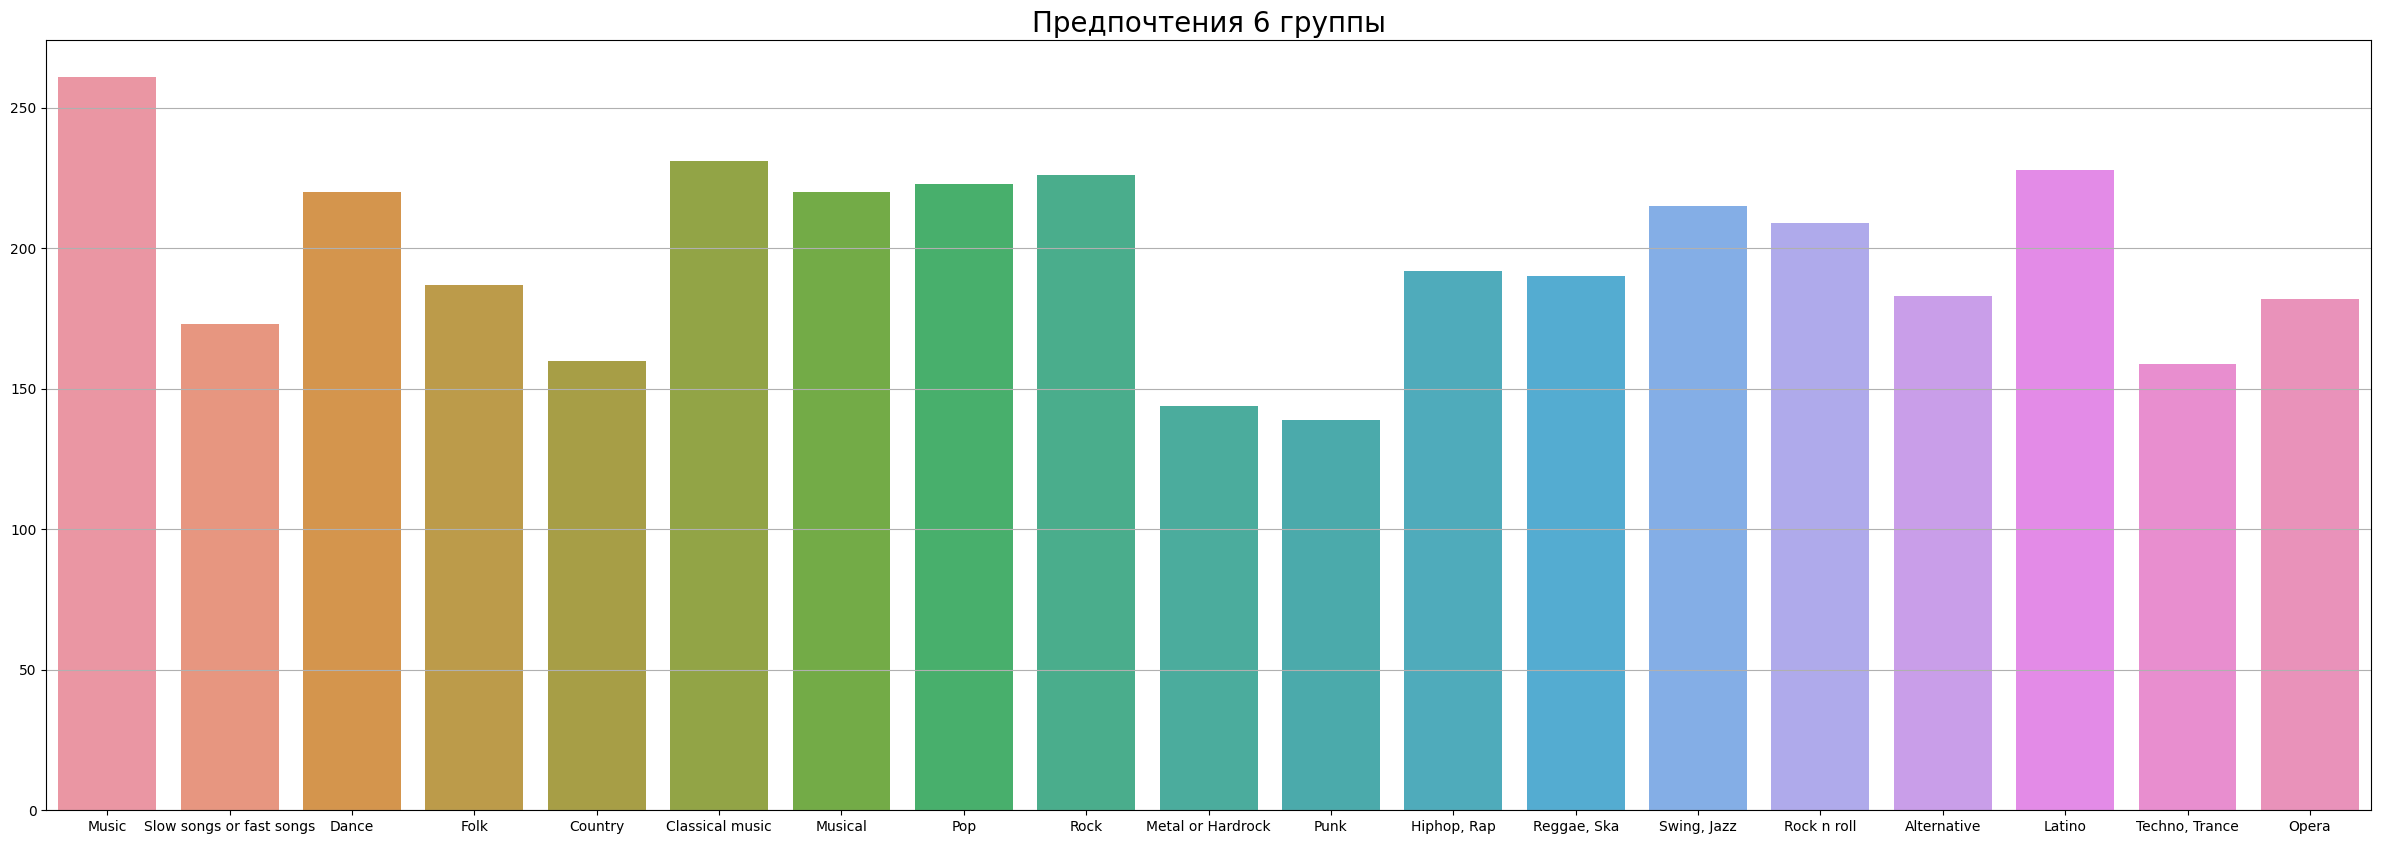

In [29]:
g_ = []
for i in group_5:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 6 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefers classical music, musical, pop, rock, swing\jazz, opera. We can say that this group of people prefer melodic, classical music.

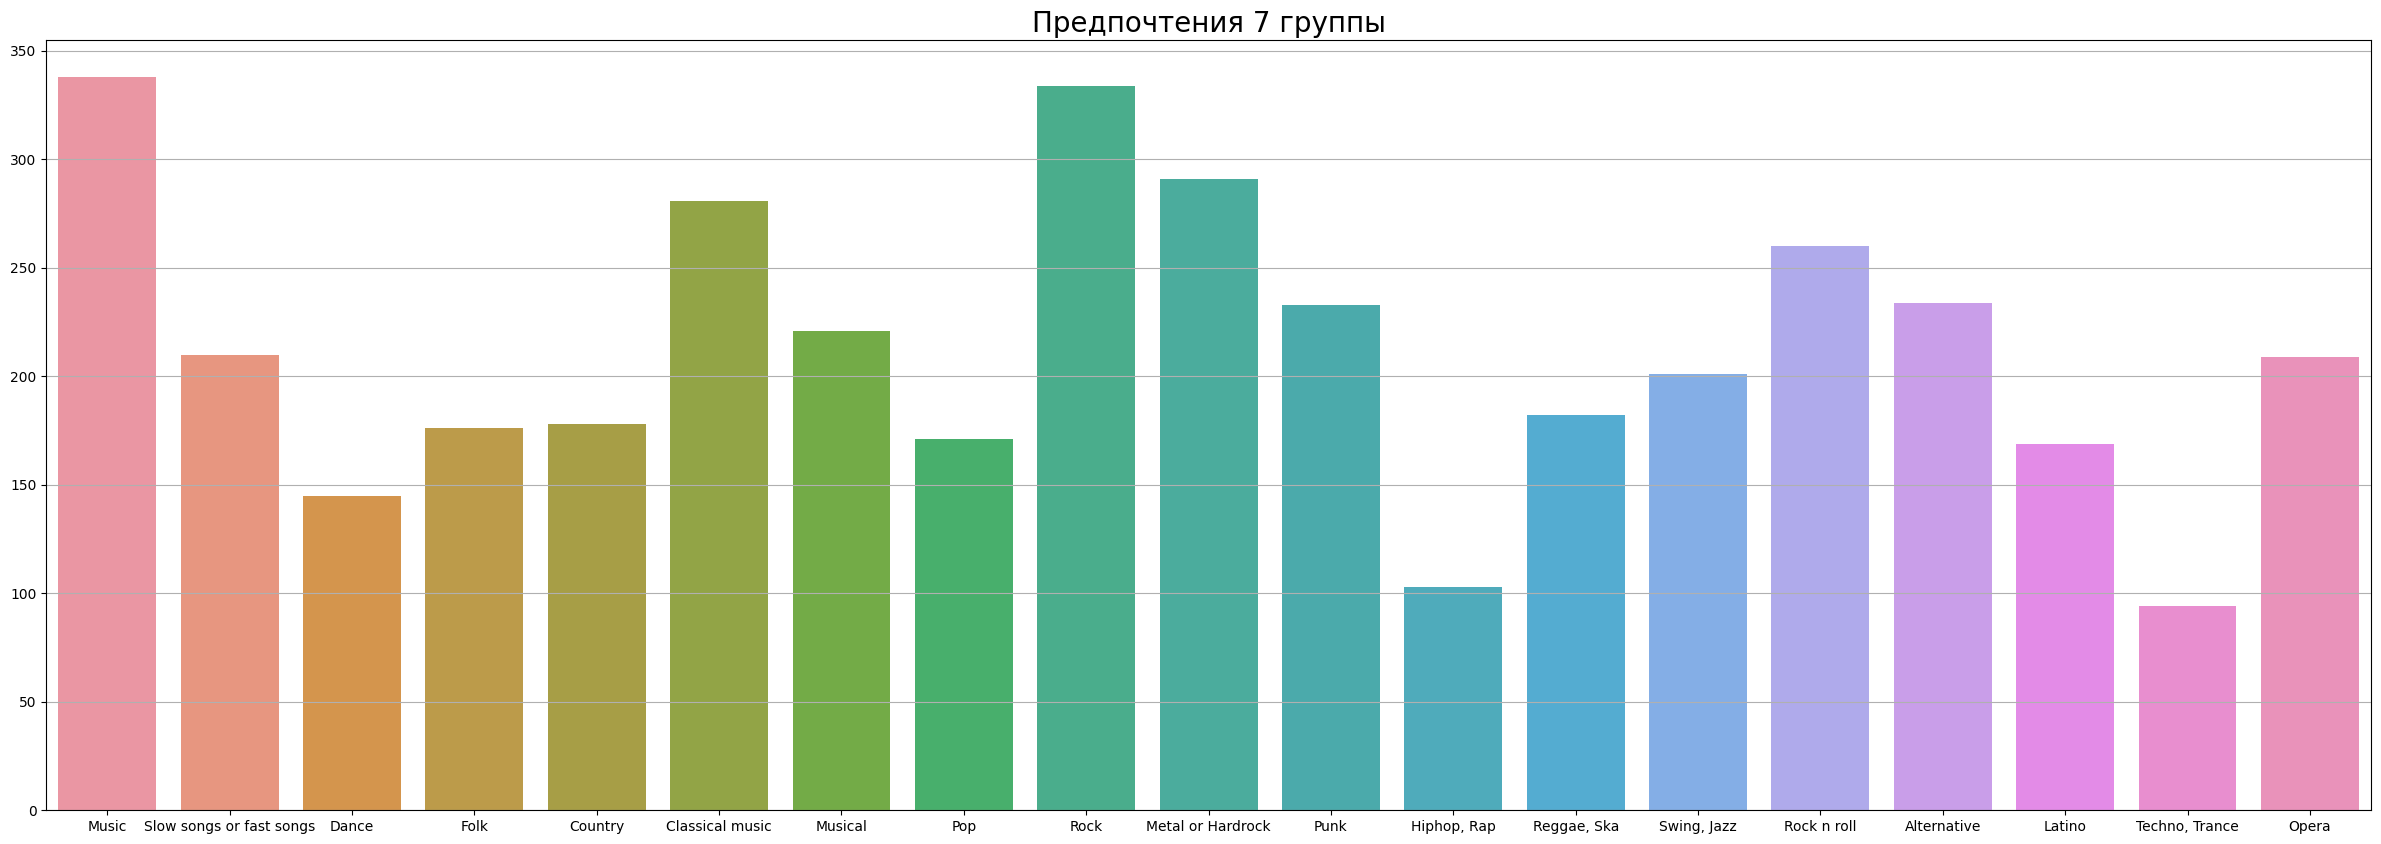

In [30]:
g_ = []
for i in group_6:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 7 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer pop, latino. It can be said that this group of people prefers windy, cheerful music.

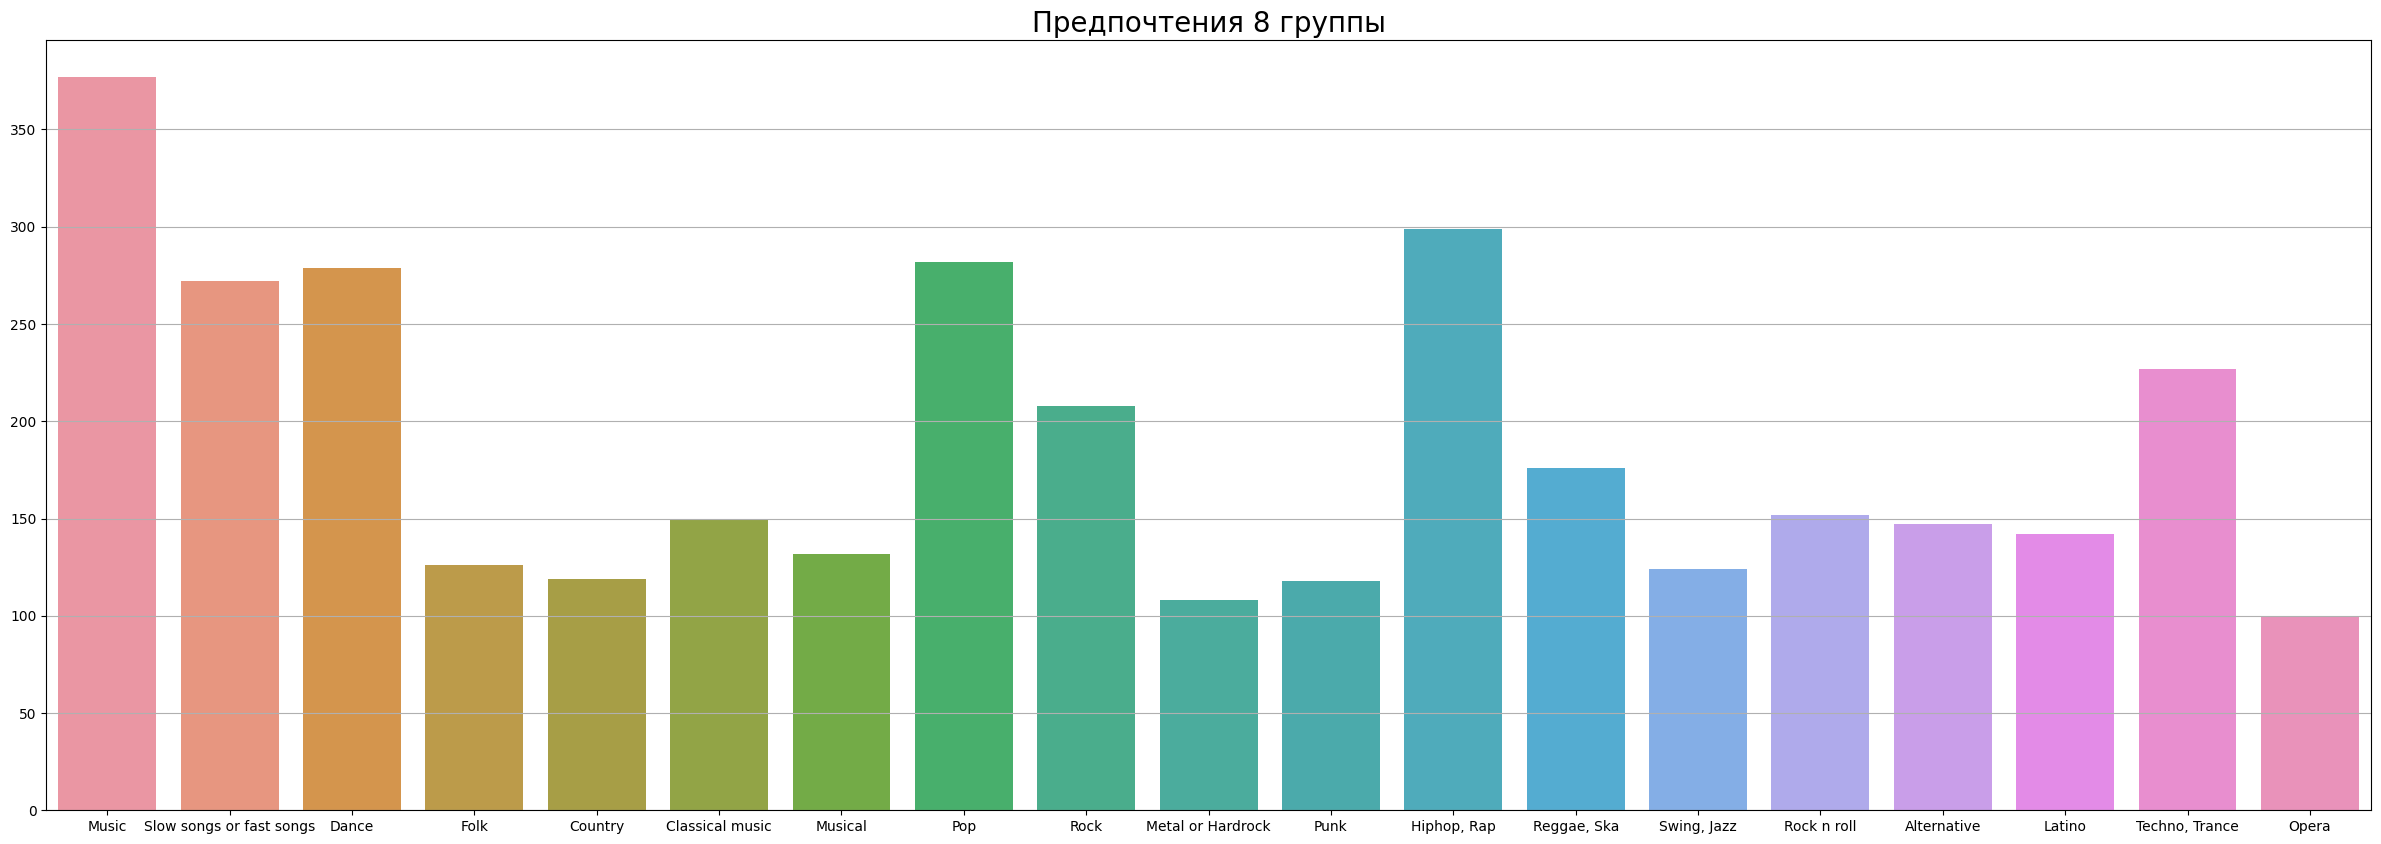

In [31]:
g_ = []
for i in group_7:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 8 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer rock, metal/hardrock. We can say that this group of people are fans of heavy rock.

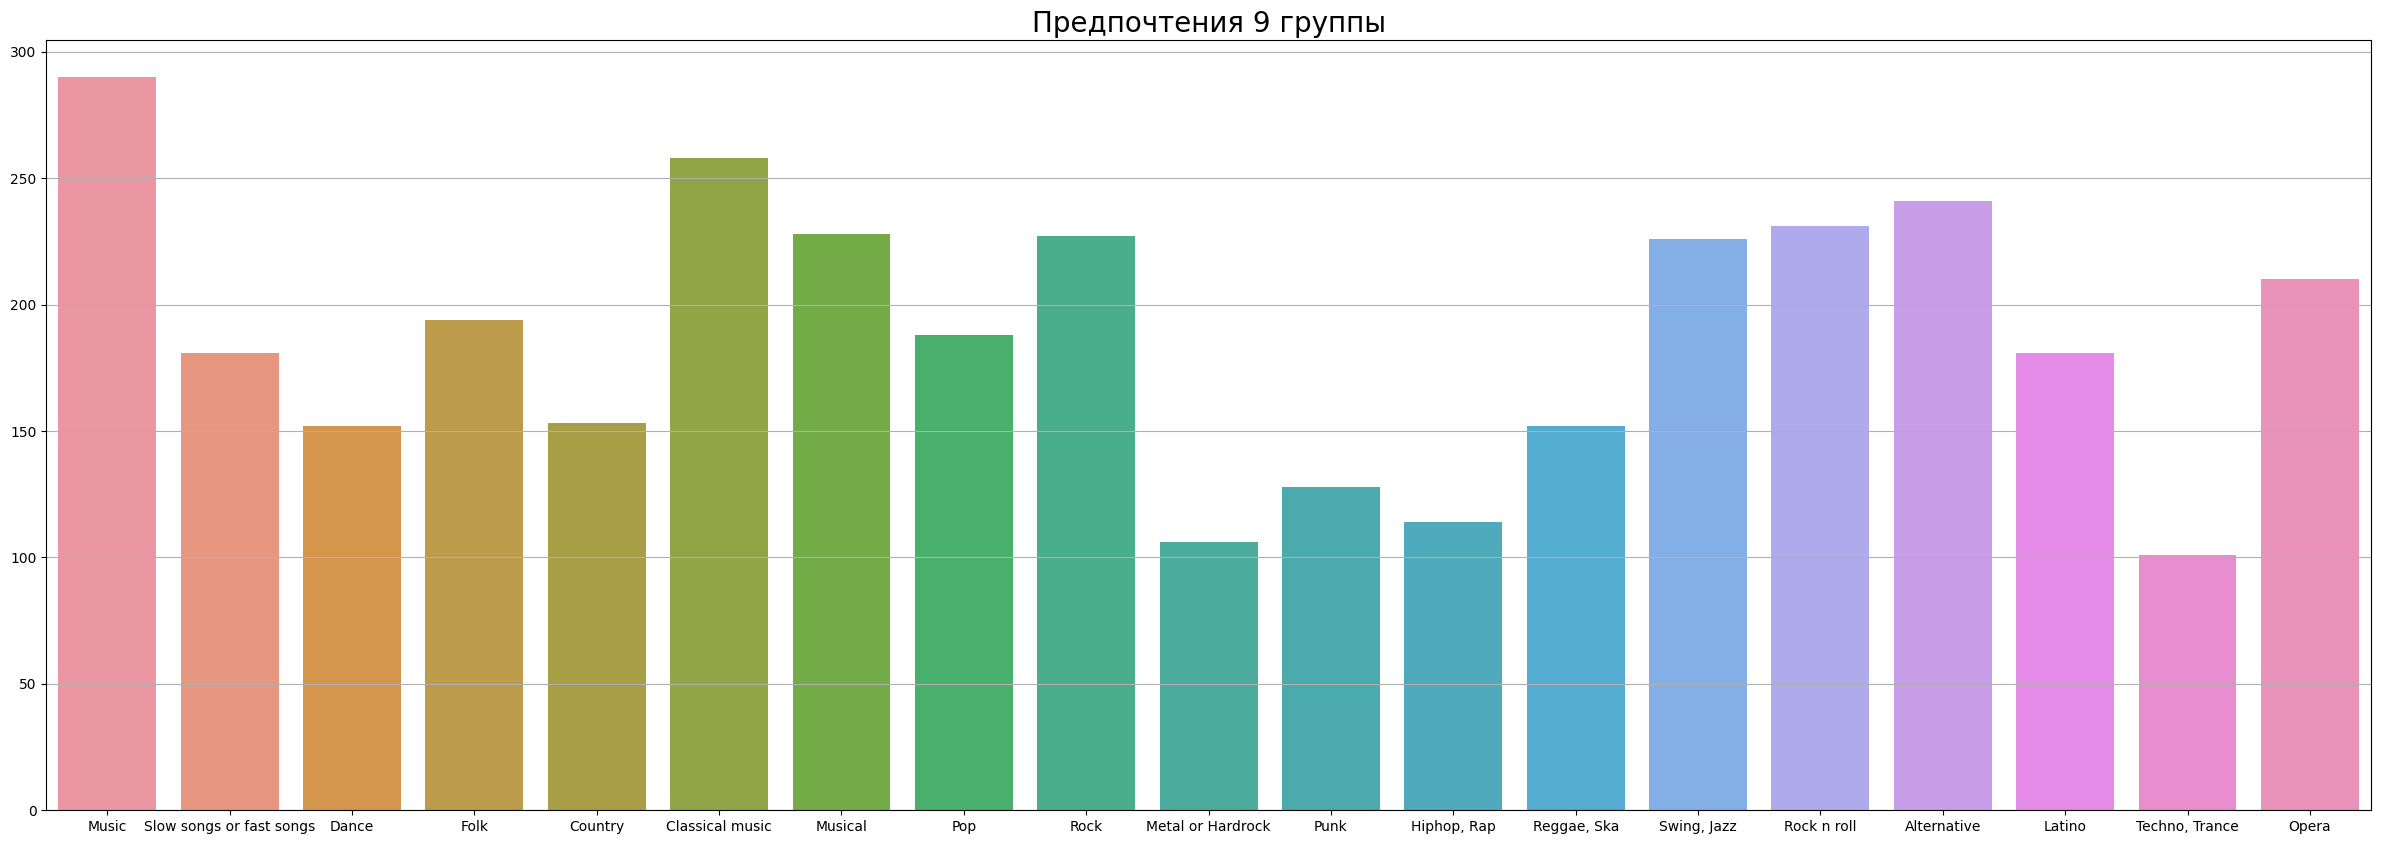

In [32]:
g_ = []
for i in group_8:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 9 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer rock, alternative. We can say that this group of people are fans of alternative rock.

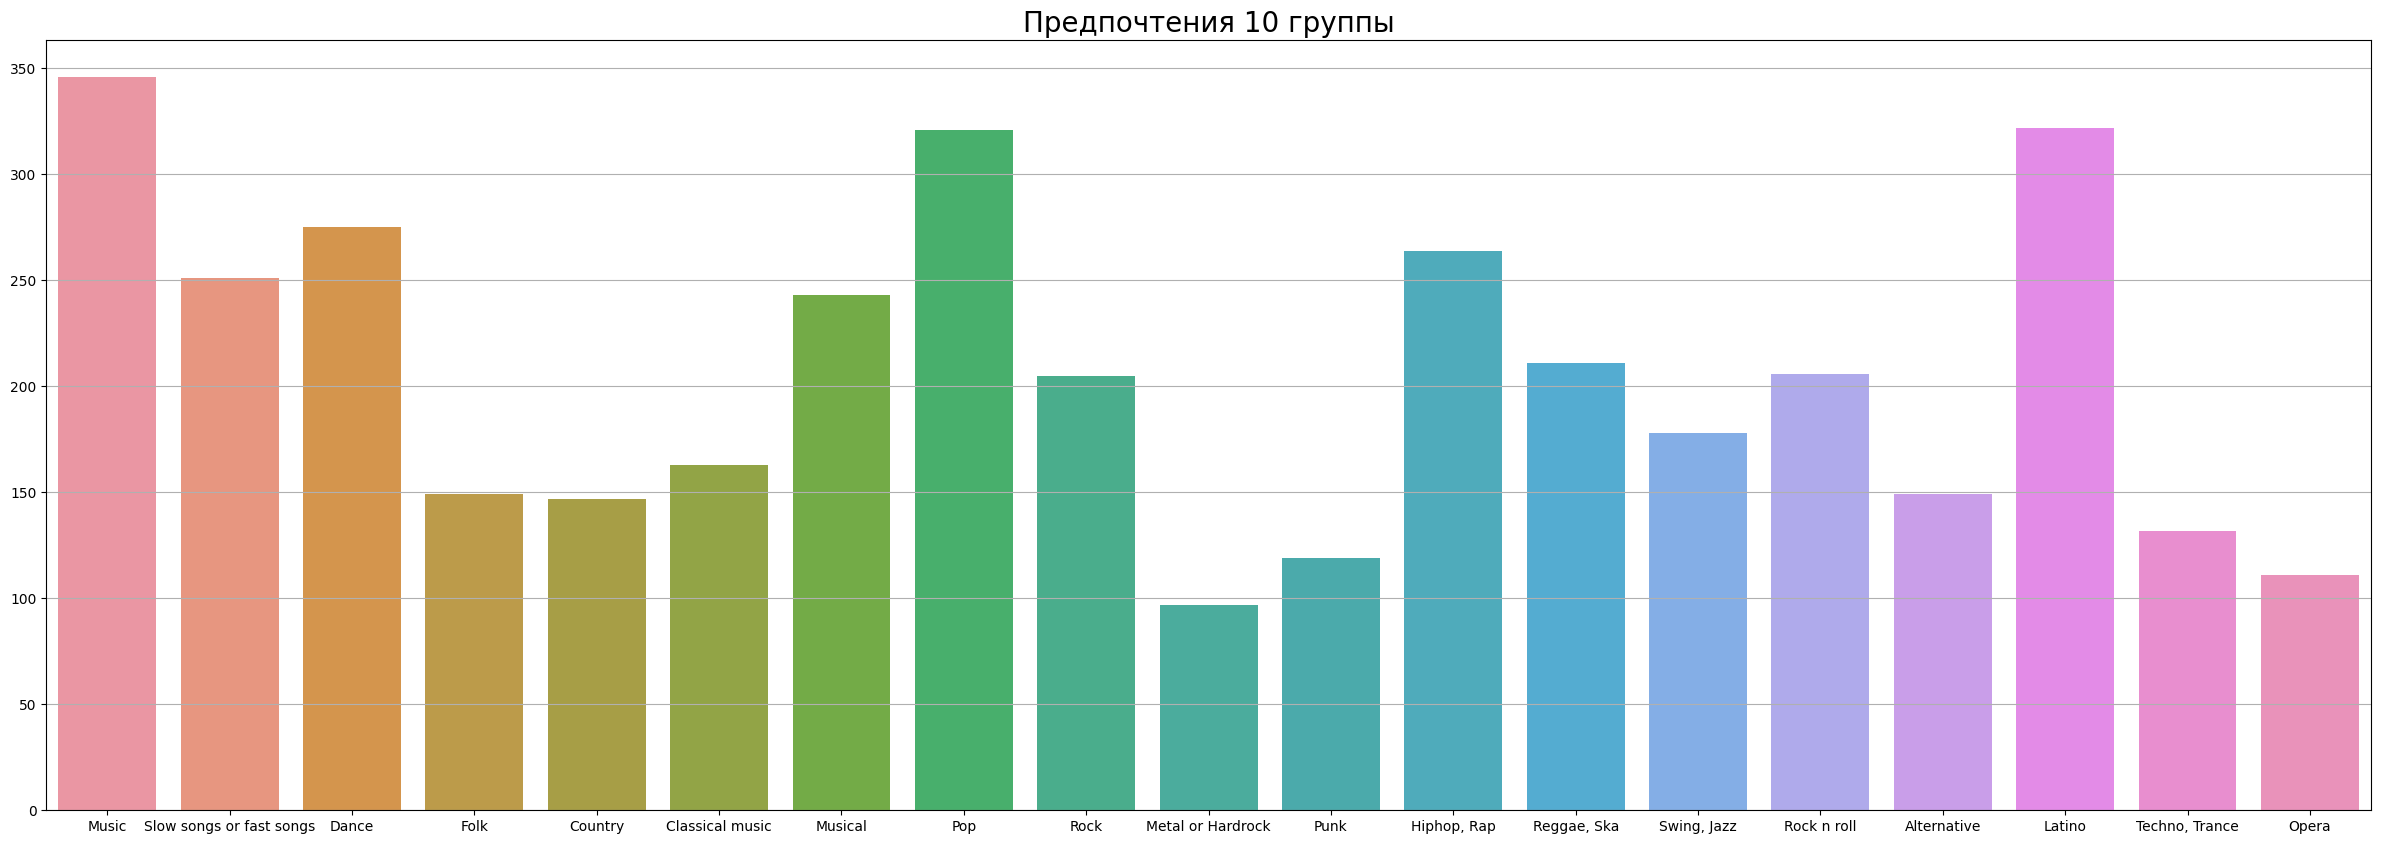

In [33]:
g_ = []
for i in group_9:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 10 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer slow songs or fast songs, pop. We can say that this group of people are fans of pop music.

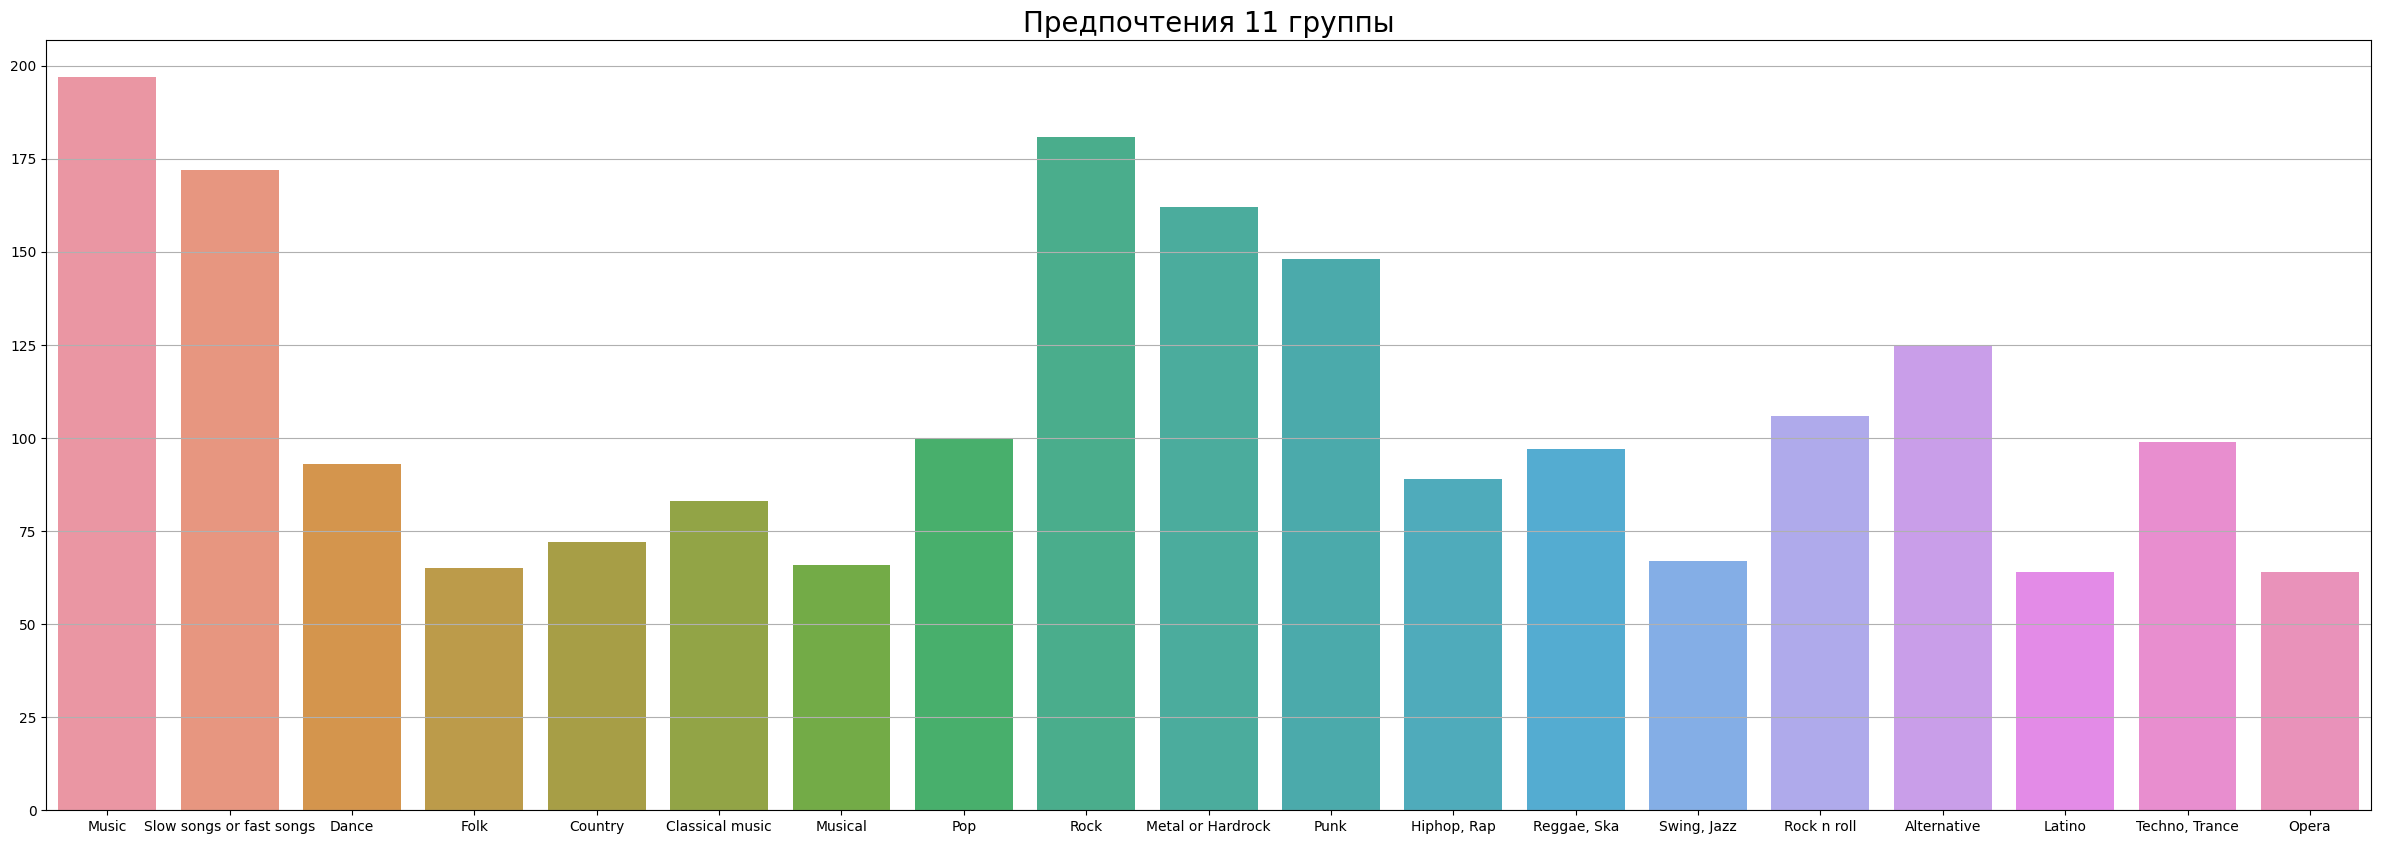

In [34]:
g_ = []
for i in group_10:
  g_.append(list(MusicPrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MusicPrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title('Group 11 preferences',fontsize=20)
plt.show()

<b>Note:</b>

This cluster of people prefer everything except folk, country, metal/hardrock. We can say that this group of people are music lovers and prefer to listen to music of different genres.

Students' preferences for music in general.

<Axes: ylabel='count'>

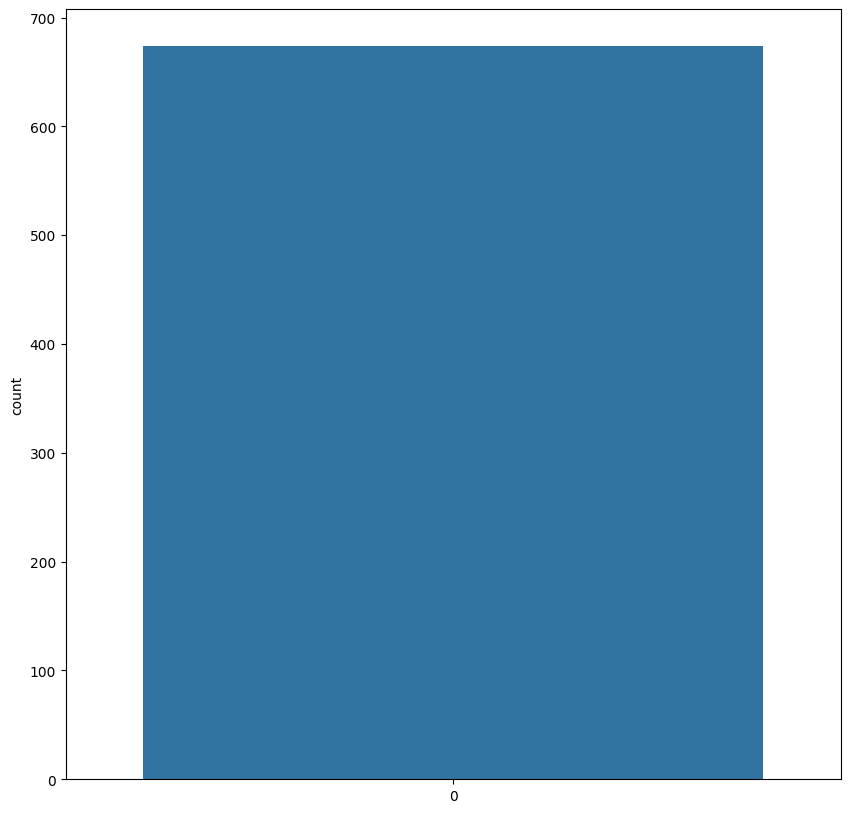

In [35]:
plt.figure(figsize=(10, 10))
sns.countplot(responses.Music)

According to the histogram, we can say that the majority likes music.

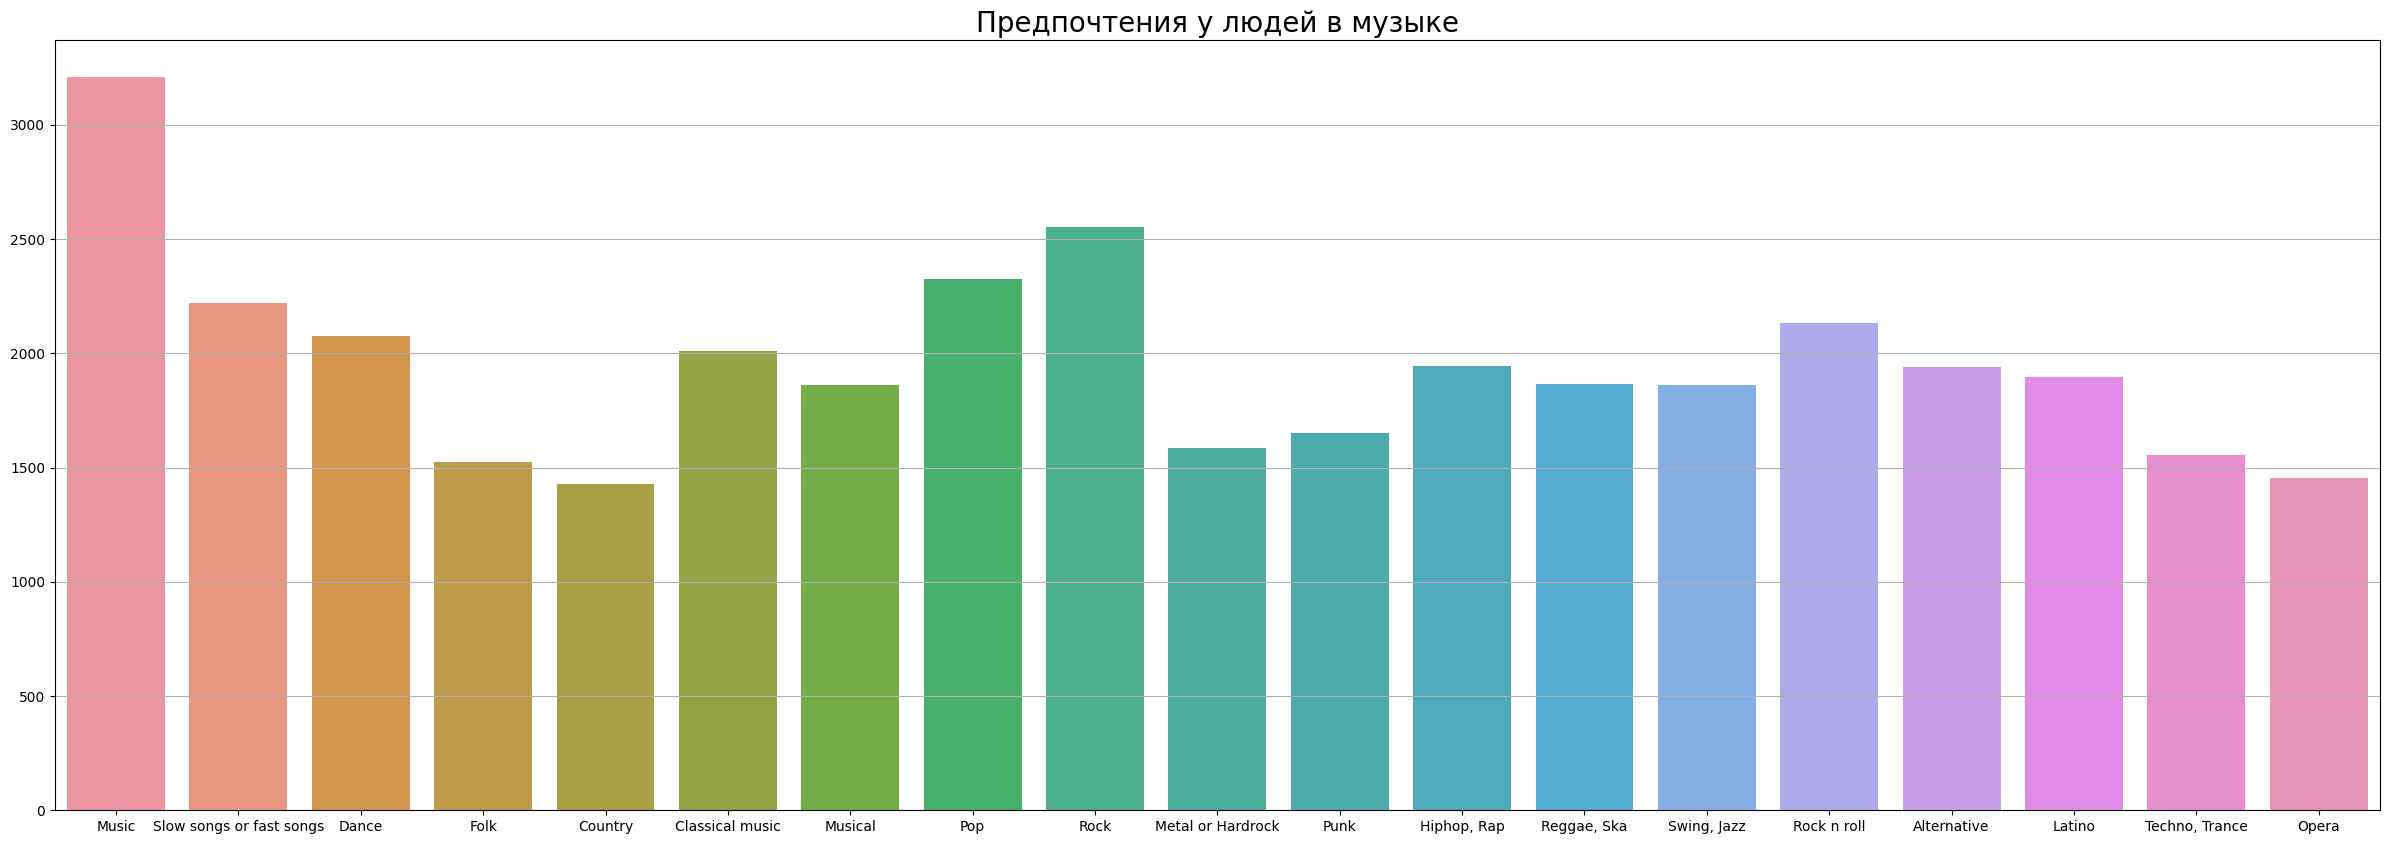

In [36]:
sum = []
for c in MusicPrefered.columns:
  sum.append(MusicPrefered[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MusicPrefered.columns.values, y = sum)
ax.set_title("People's preferences in music",fontsize=20)
plt.show()

<b>Note:</b>

The most popular genre of music is rock, pop, rock n roll. And least of all people are interested in folk, country, opera.

Let's analyse whether there is a correlation between people's preferences in music with preferences in film genres.

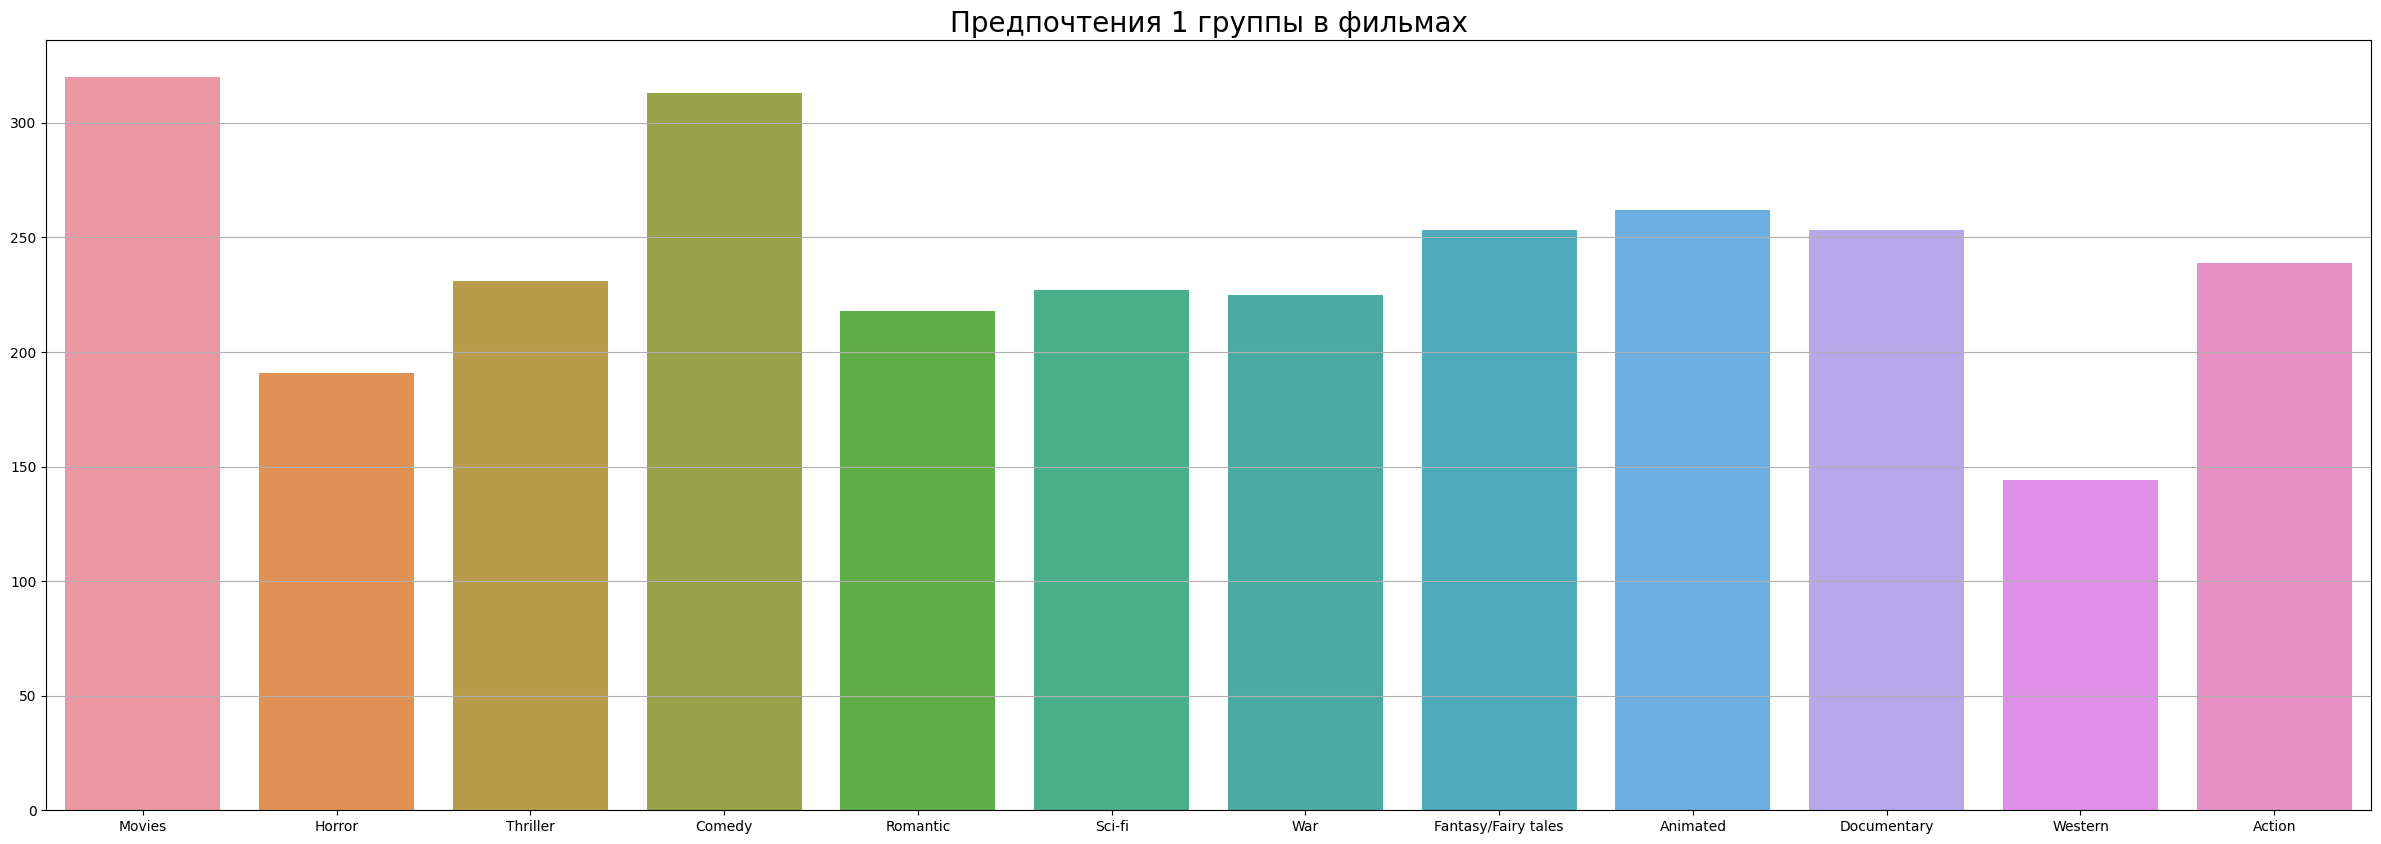

In [37]:
g_ = []
for i in group_0:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 1 preferences in films',fontsize=20)
plt.show()

<b>Note:</b>

People who like rock, rock n roll, alternative prefer comedy, documentaries, as well as cartoons.


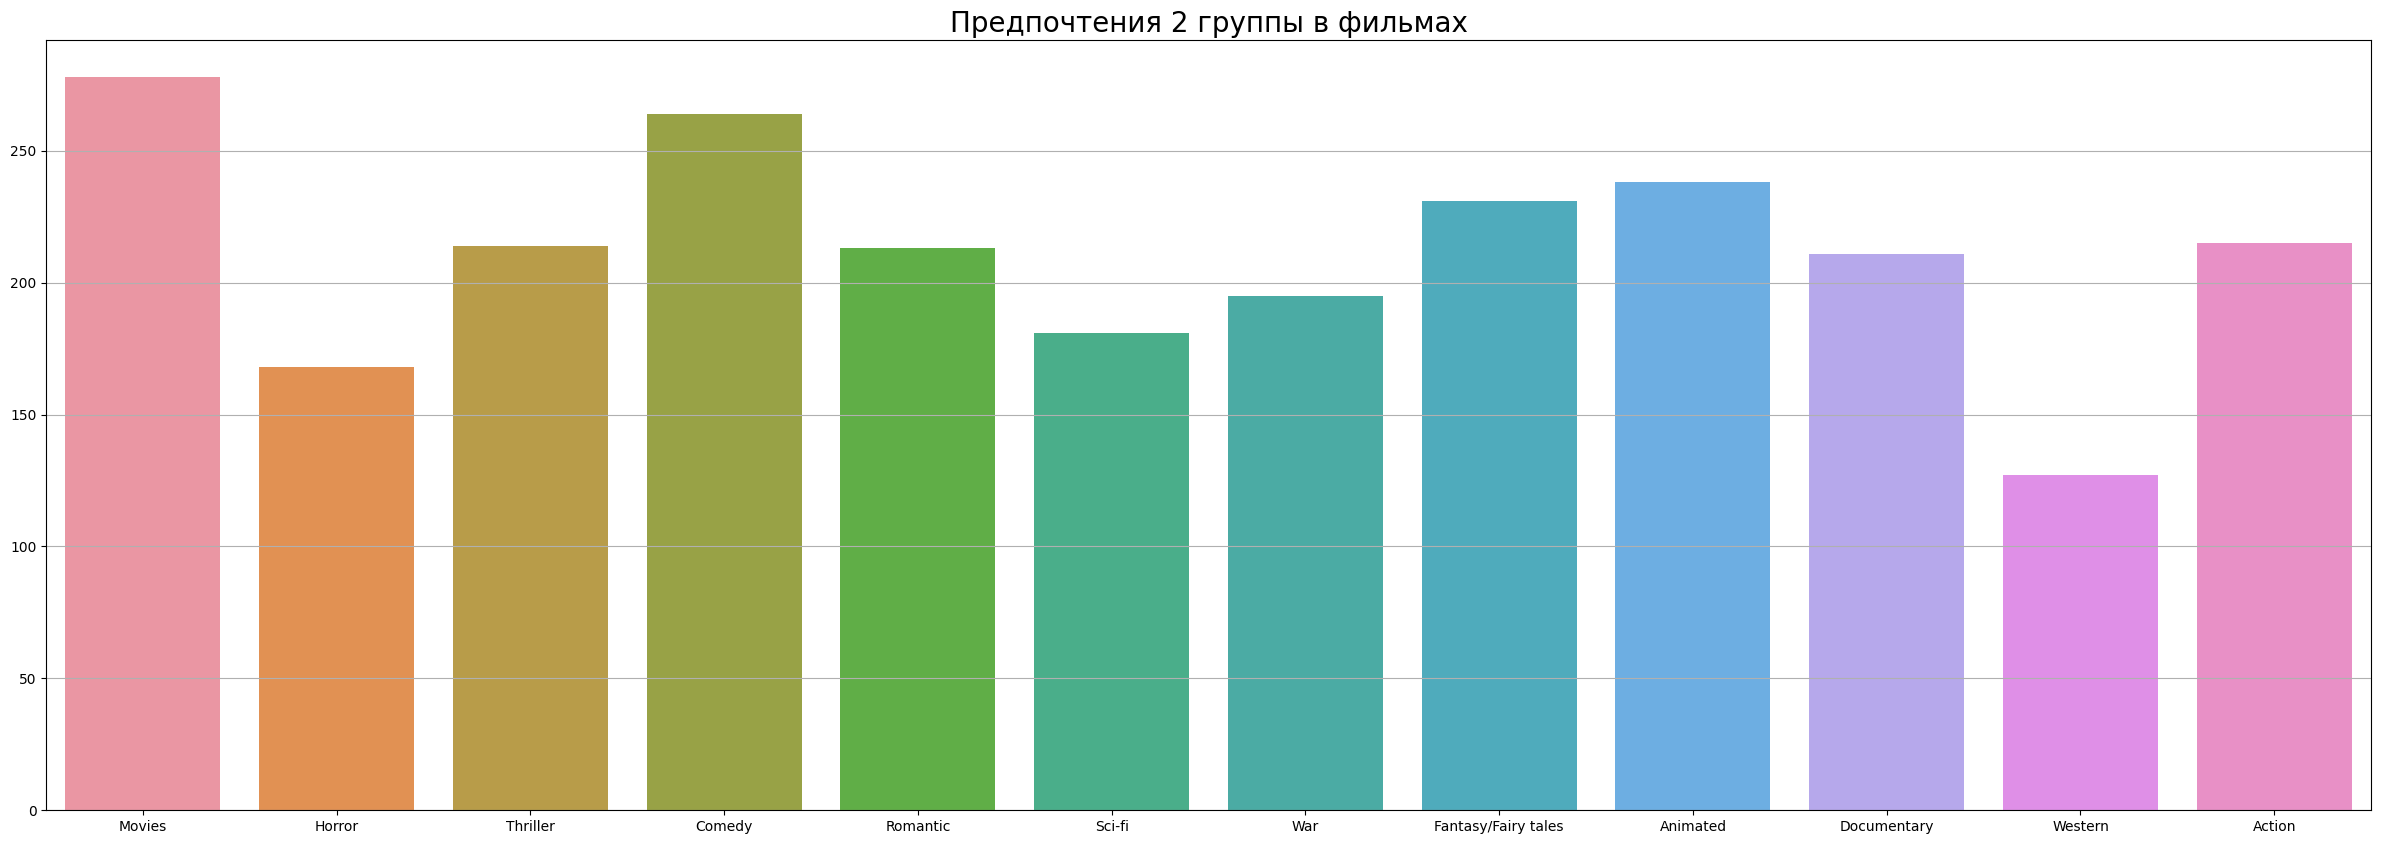

In [38]:
g_= []
for i in group_1:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 2 preferences in films',fontsize=20)
plt.show()

<b>Note:</b>

People who like rock, pop, dance also prefer comedies. They also like sci-fi, cartoons, action films.

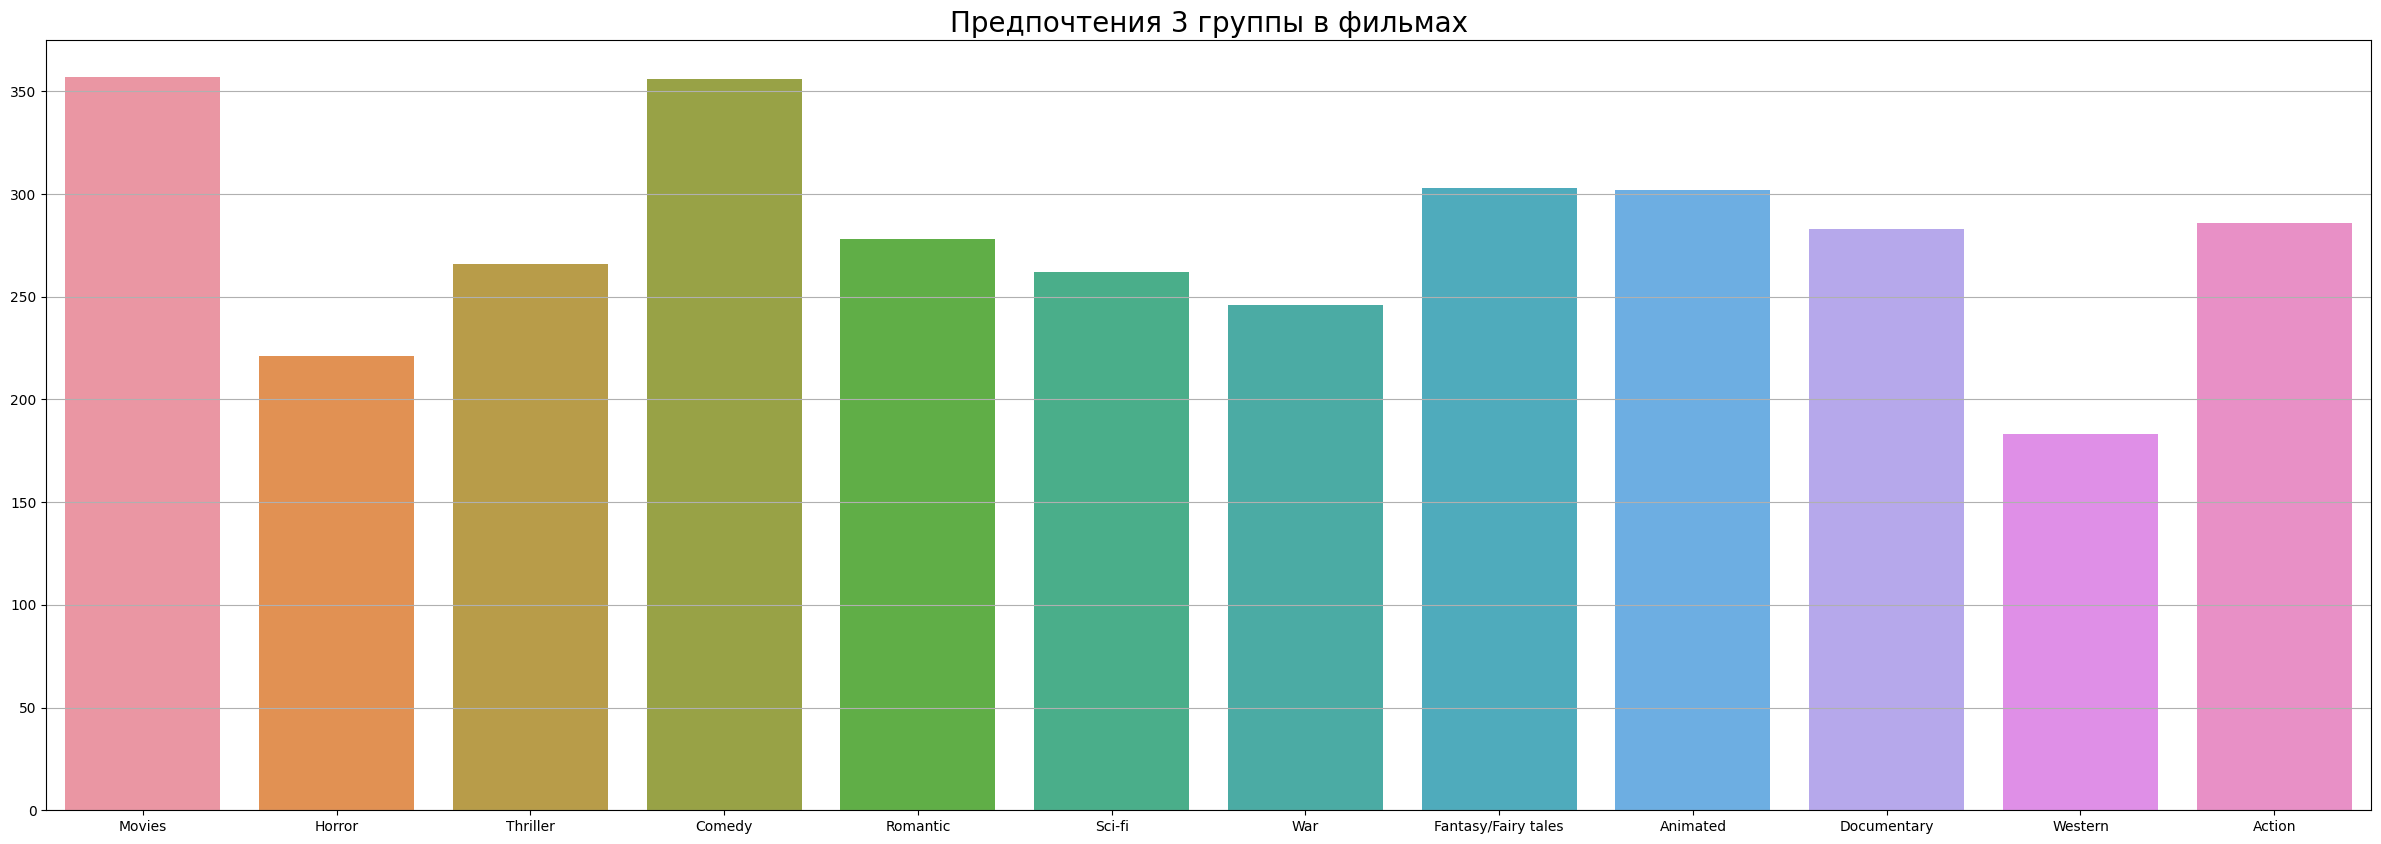

In [39]:
g_= []
for i in group_2:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title("Group 3's preferences in films",fontsize=20)
plt.show()

<b>Note:</b>

People who like dance, pop, hiphop\rap, slow songs or fast songs, echno, Trance have no special preferences in the genre of films, we can single out only comedy, all other genres on average equally attract people of this category.

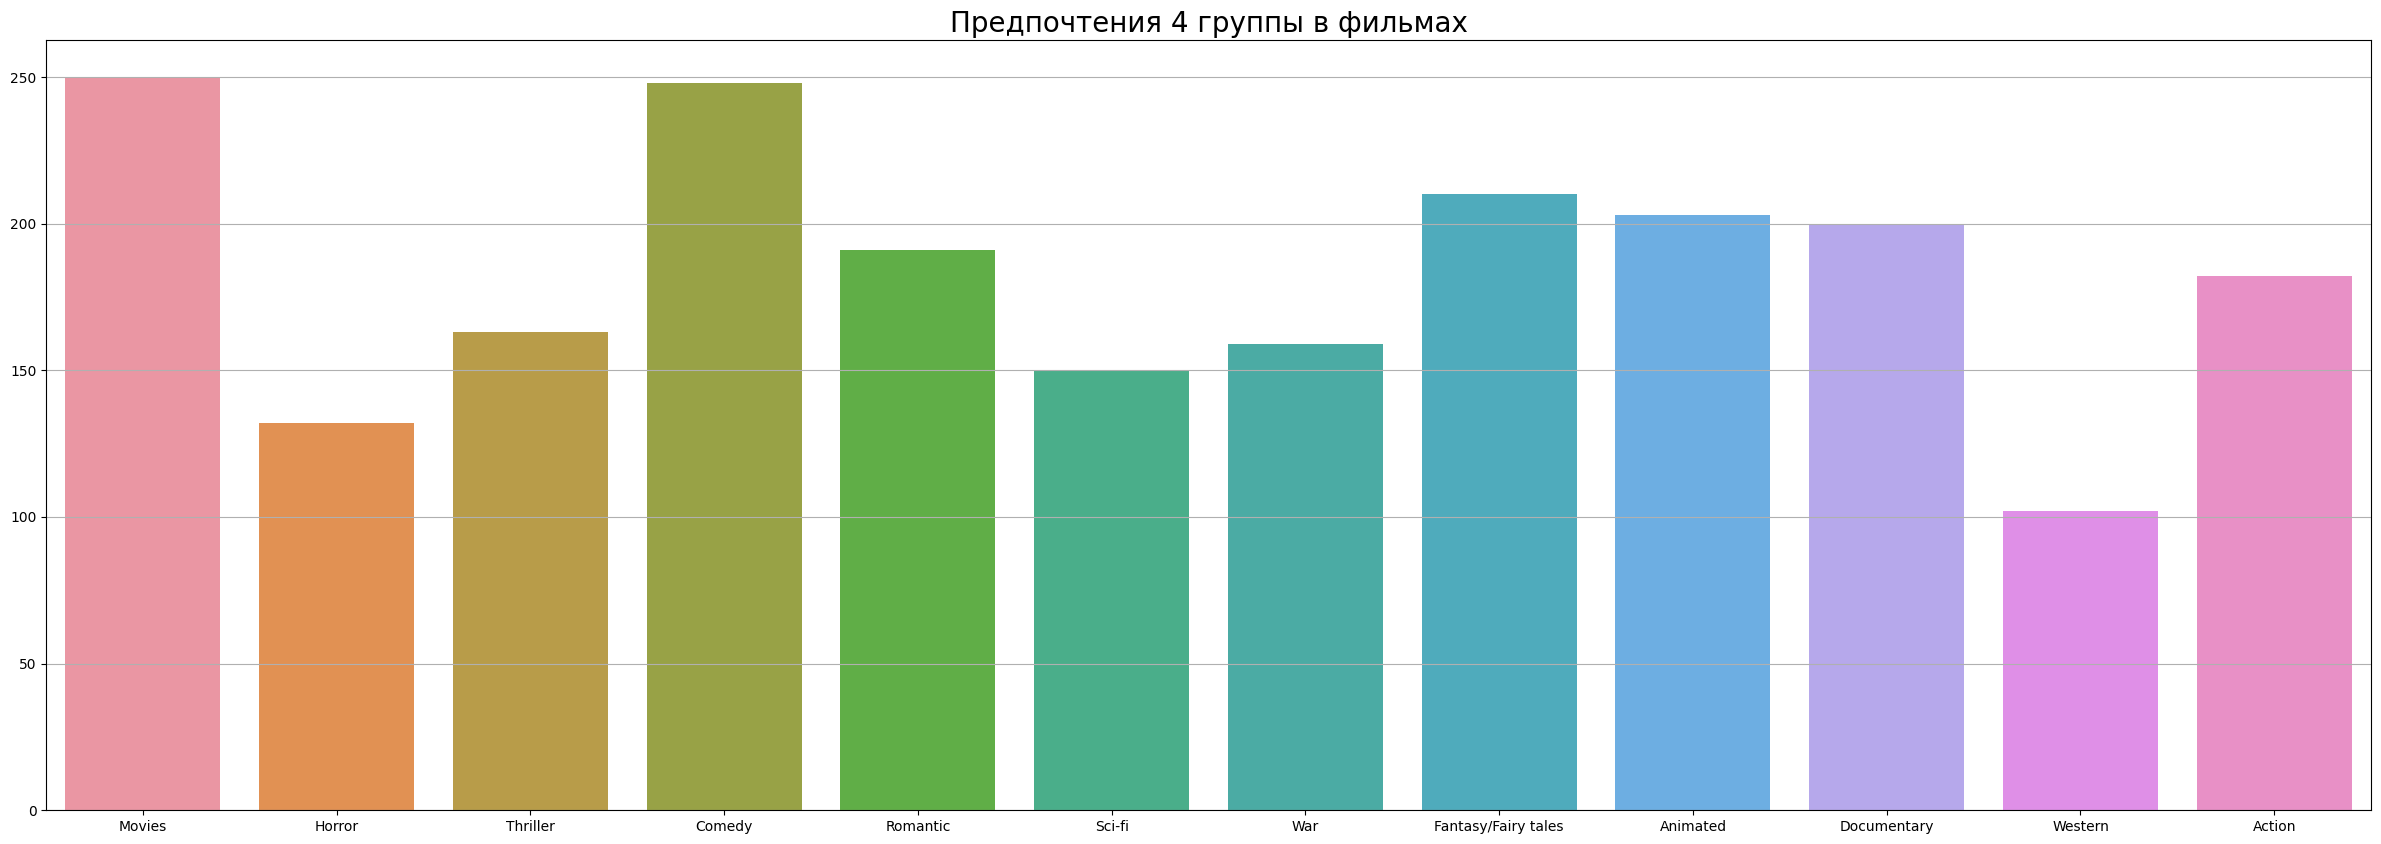

In [40]:
g_= []
for i in group_3:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title("Group 4's preferences in films",fontsize=20)
plt.show()

<b>Note:</b>

People who like rock, metal/hardrock, punk, swing/jazz, rock n roll, alternative prefer comedies, cartoons, sci-fi, documentaries, action films. In addition, people in this category do not like westrn.

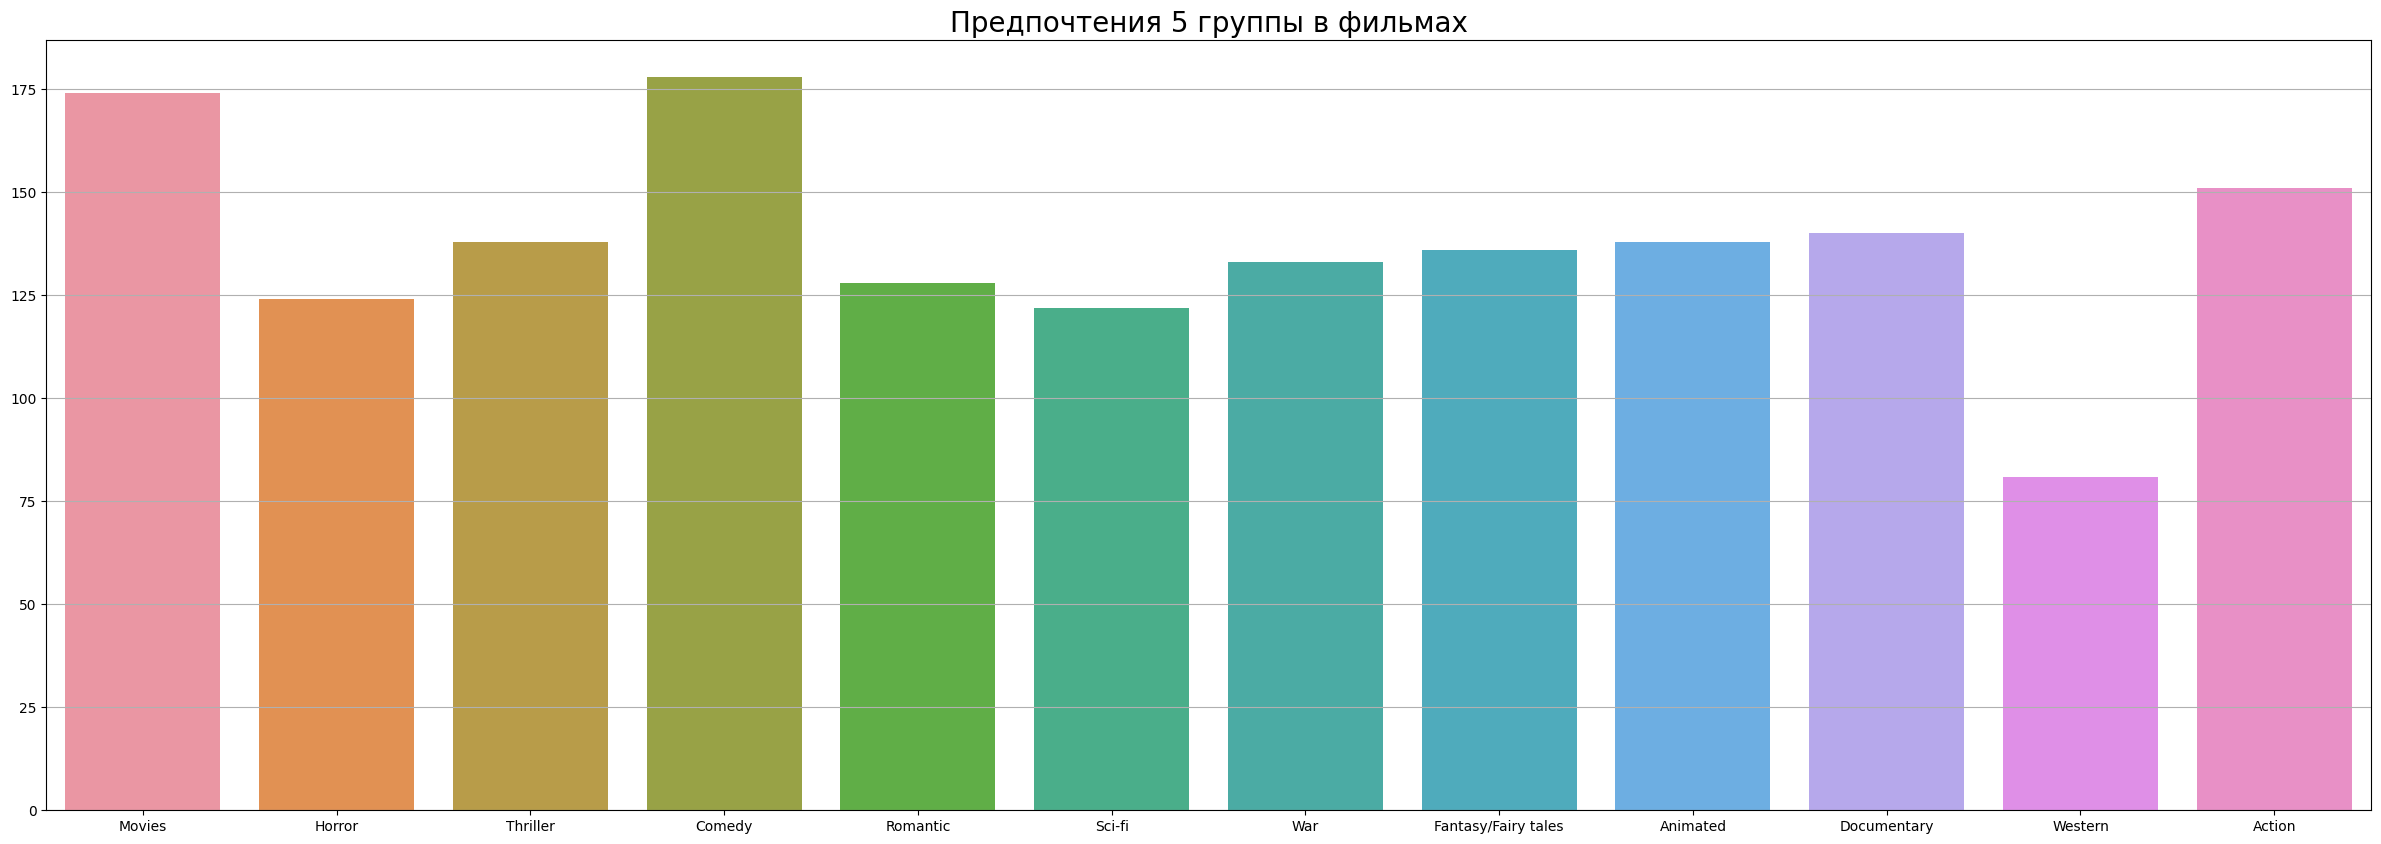

In [41]:
g_= []
for i in group_4:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 5 preferences in films',fontsize=20)
plt.show()

<b>Note:</b>

People who like dance, classical music, musical, pop, rock, latino, prefer comedy, romatic films. They also like sci-fi, cartoons.

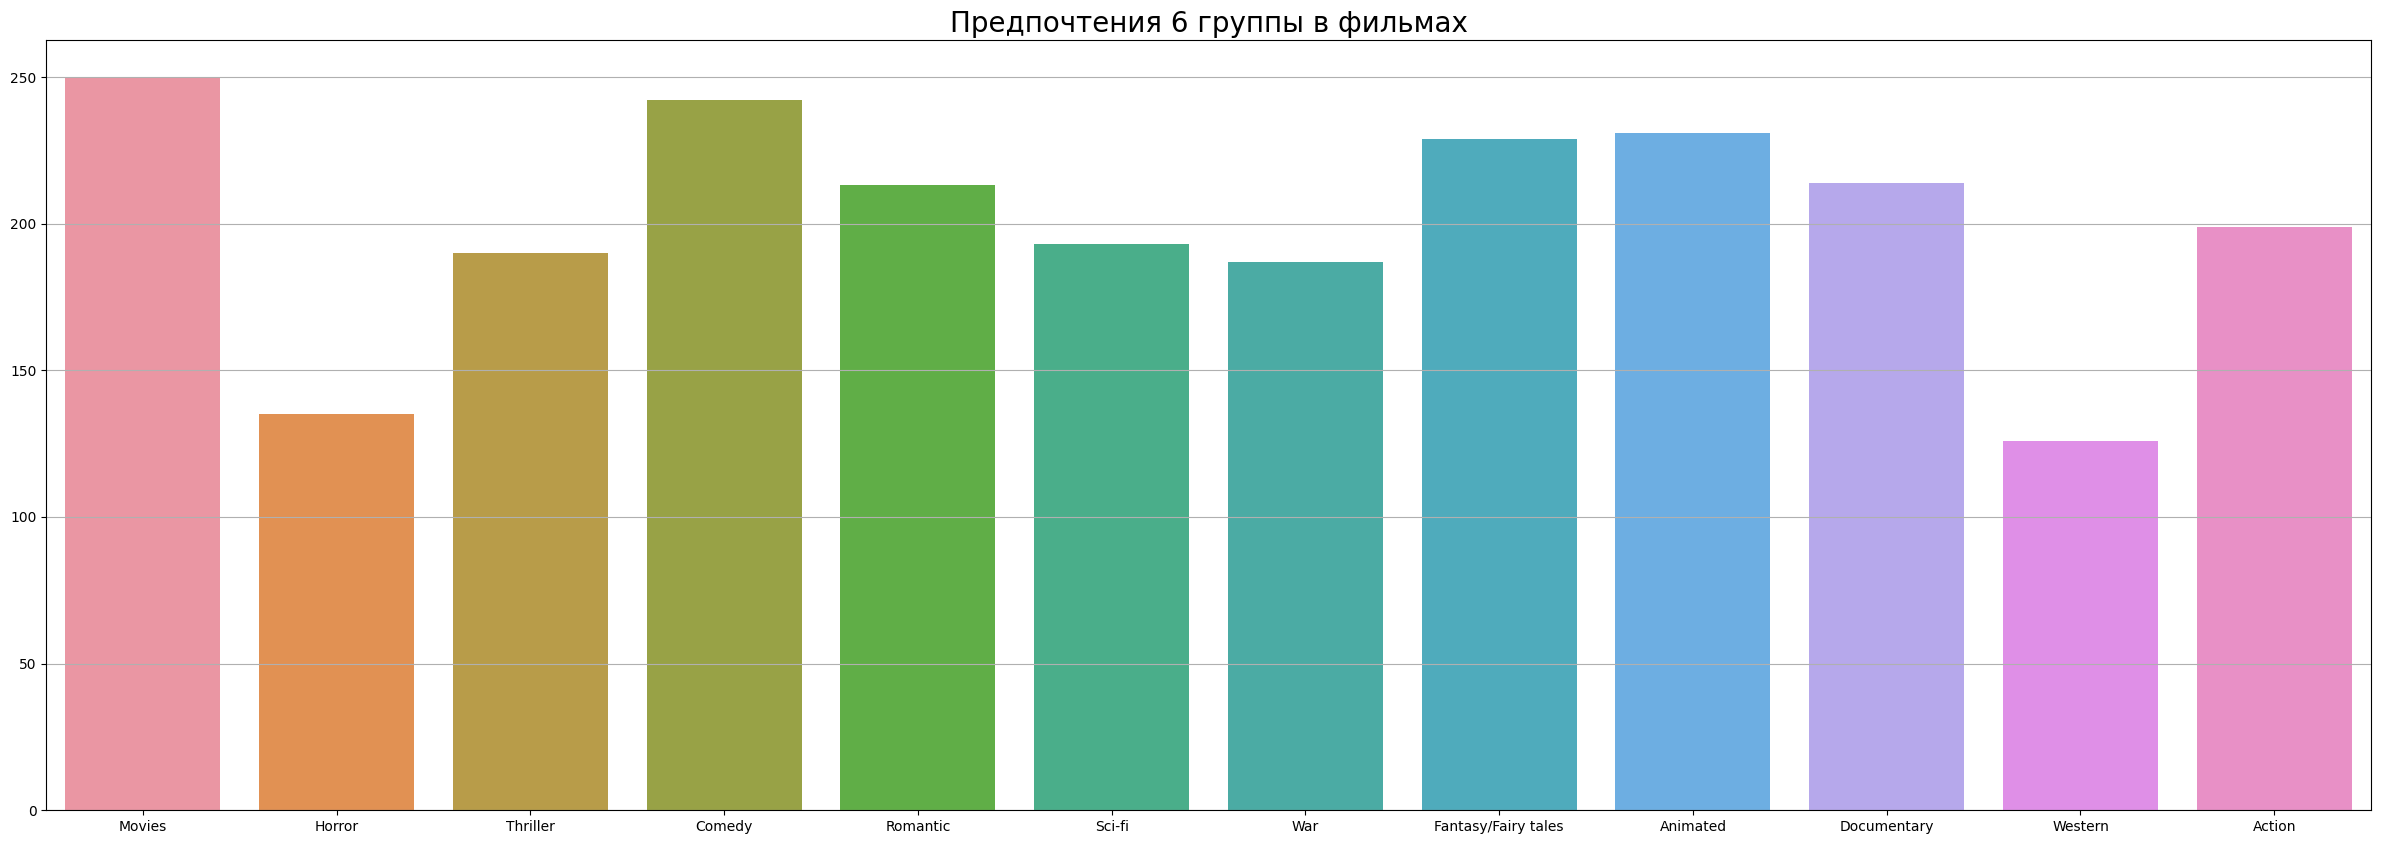

In [42]:
g_= []
for i in group_5:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 6 preferences in films',fontsize=20)
plt.show()

<b>Note:</b>

People who like classical music, musical, pop, rock, swing\jazz, opera, prefer comedies, sci-fi, documentaries.

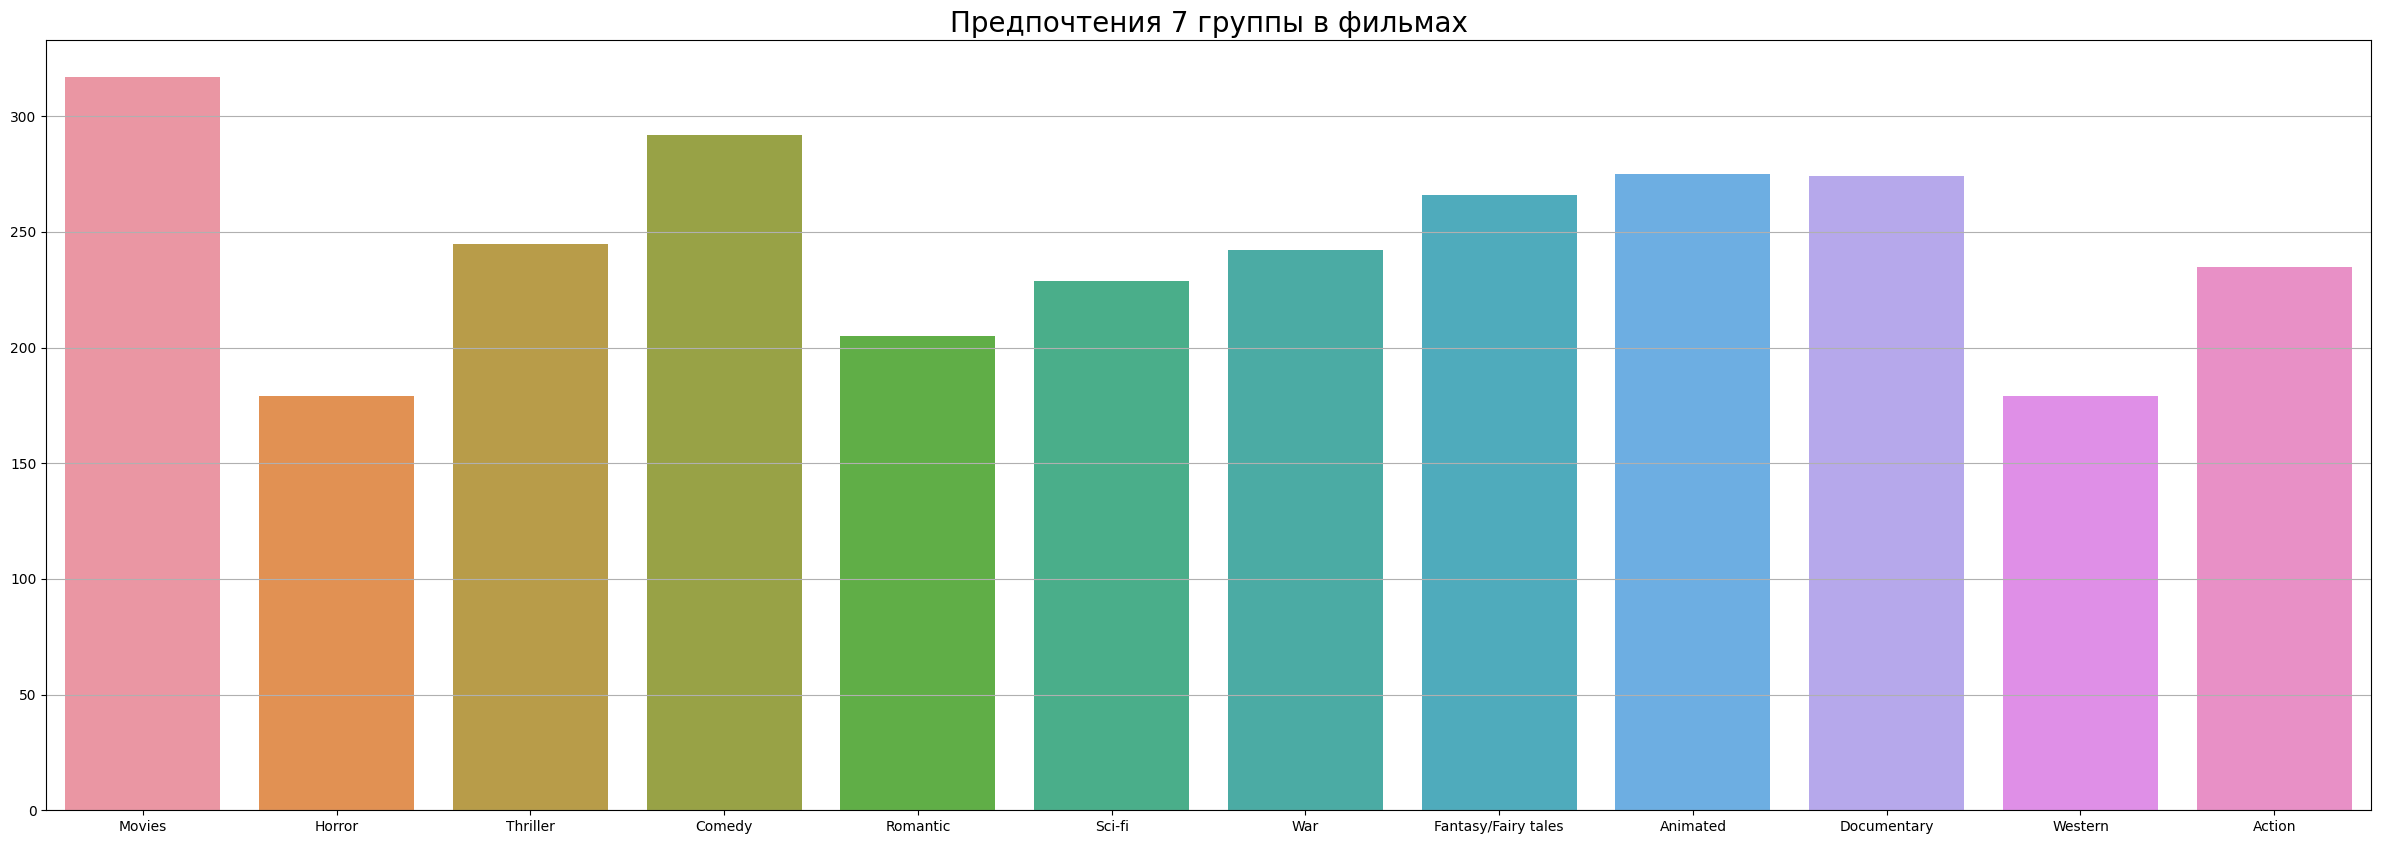

In [43]:
g_= []
for i in group_6:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 7 film preferences',fontsize=20)
plt.show()

<b>Note:</b>

People who like pop, latino, prefer comedy, romantic, fantasy films. This cluster of people do not like films in the genre of chorus, western.

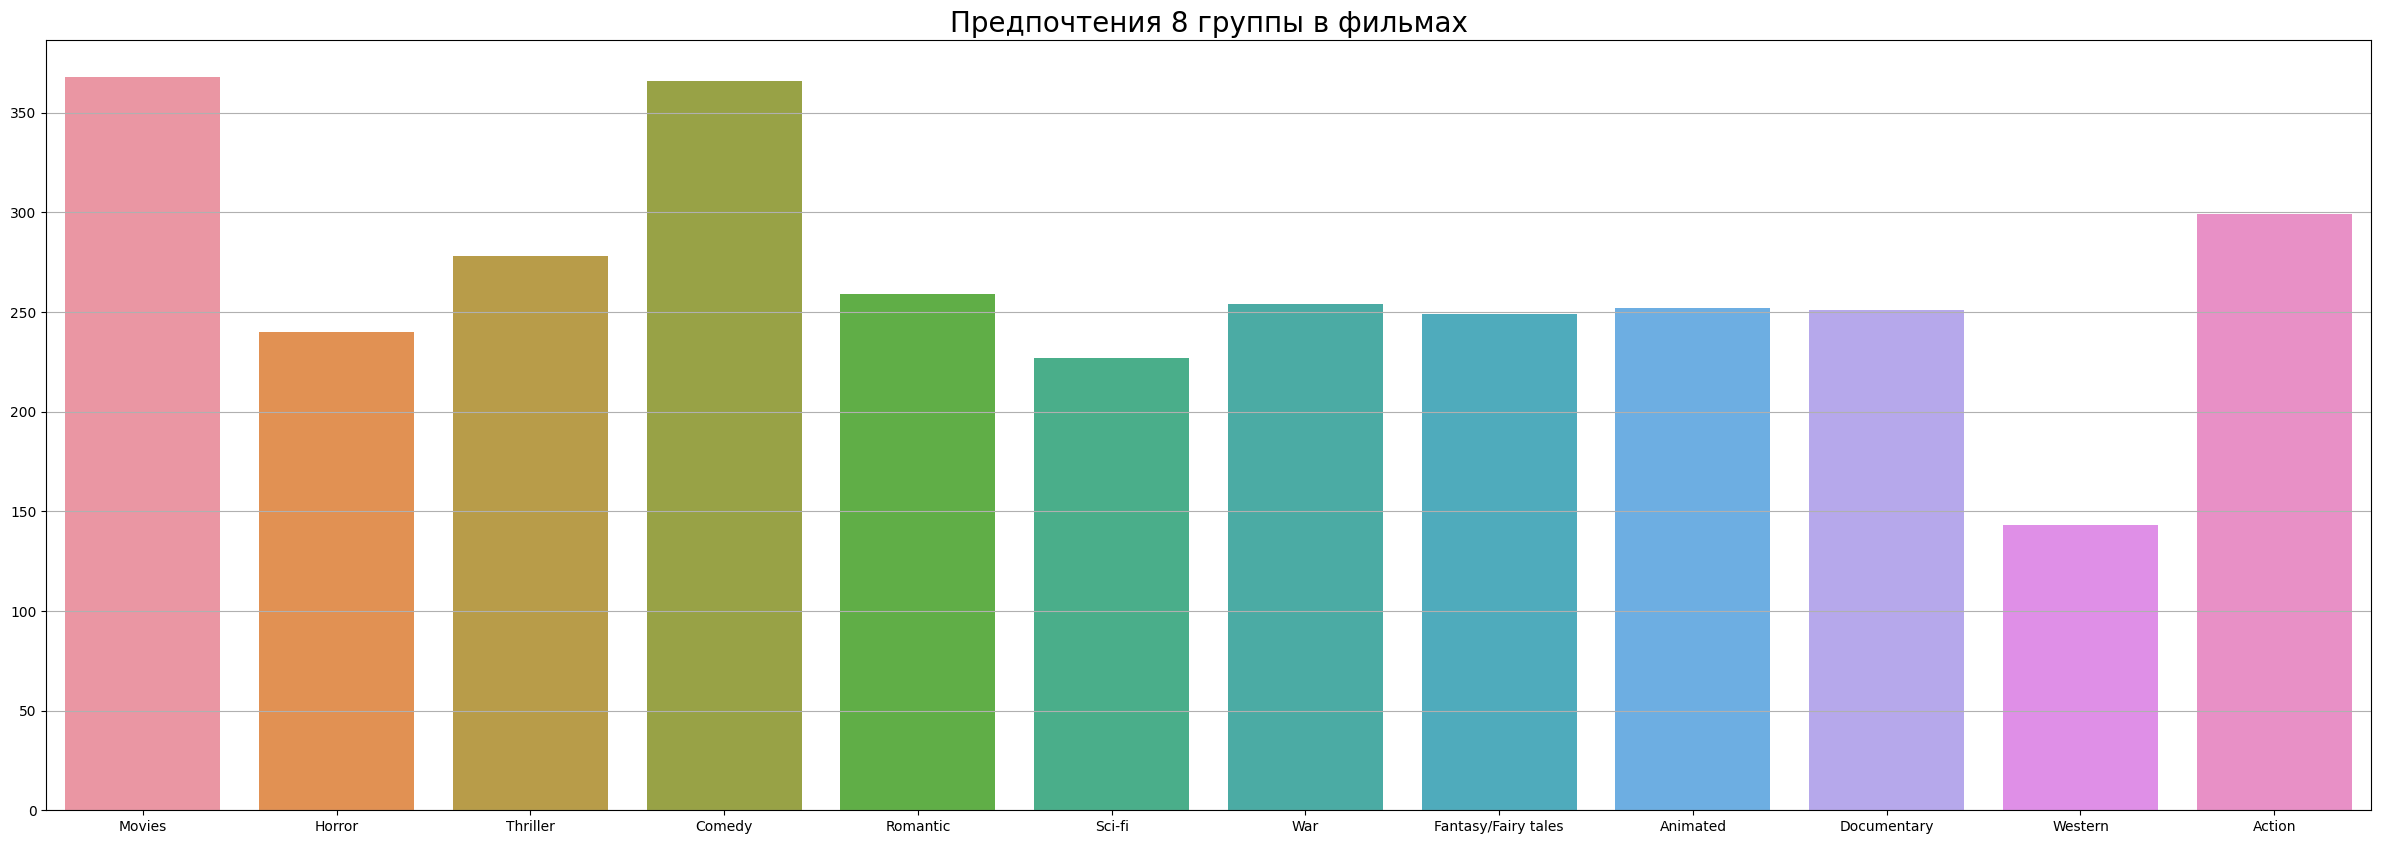

In [44]:
g_= []
for i in group_7:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 8 film preferences',fontsize=20)
plt.show()

<b>Note:</b>

People who like rock, metal/hardrock, prefer comedies, documentaries, war films, as well as action films.

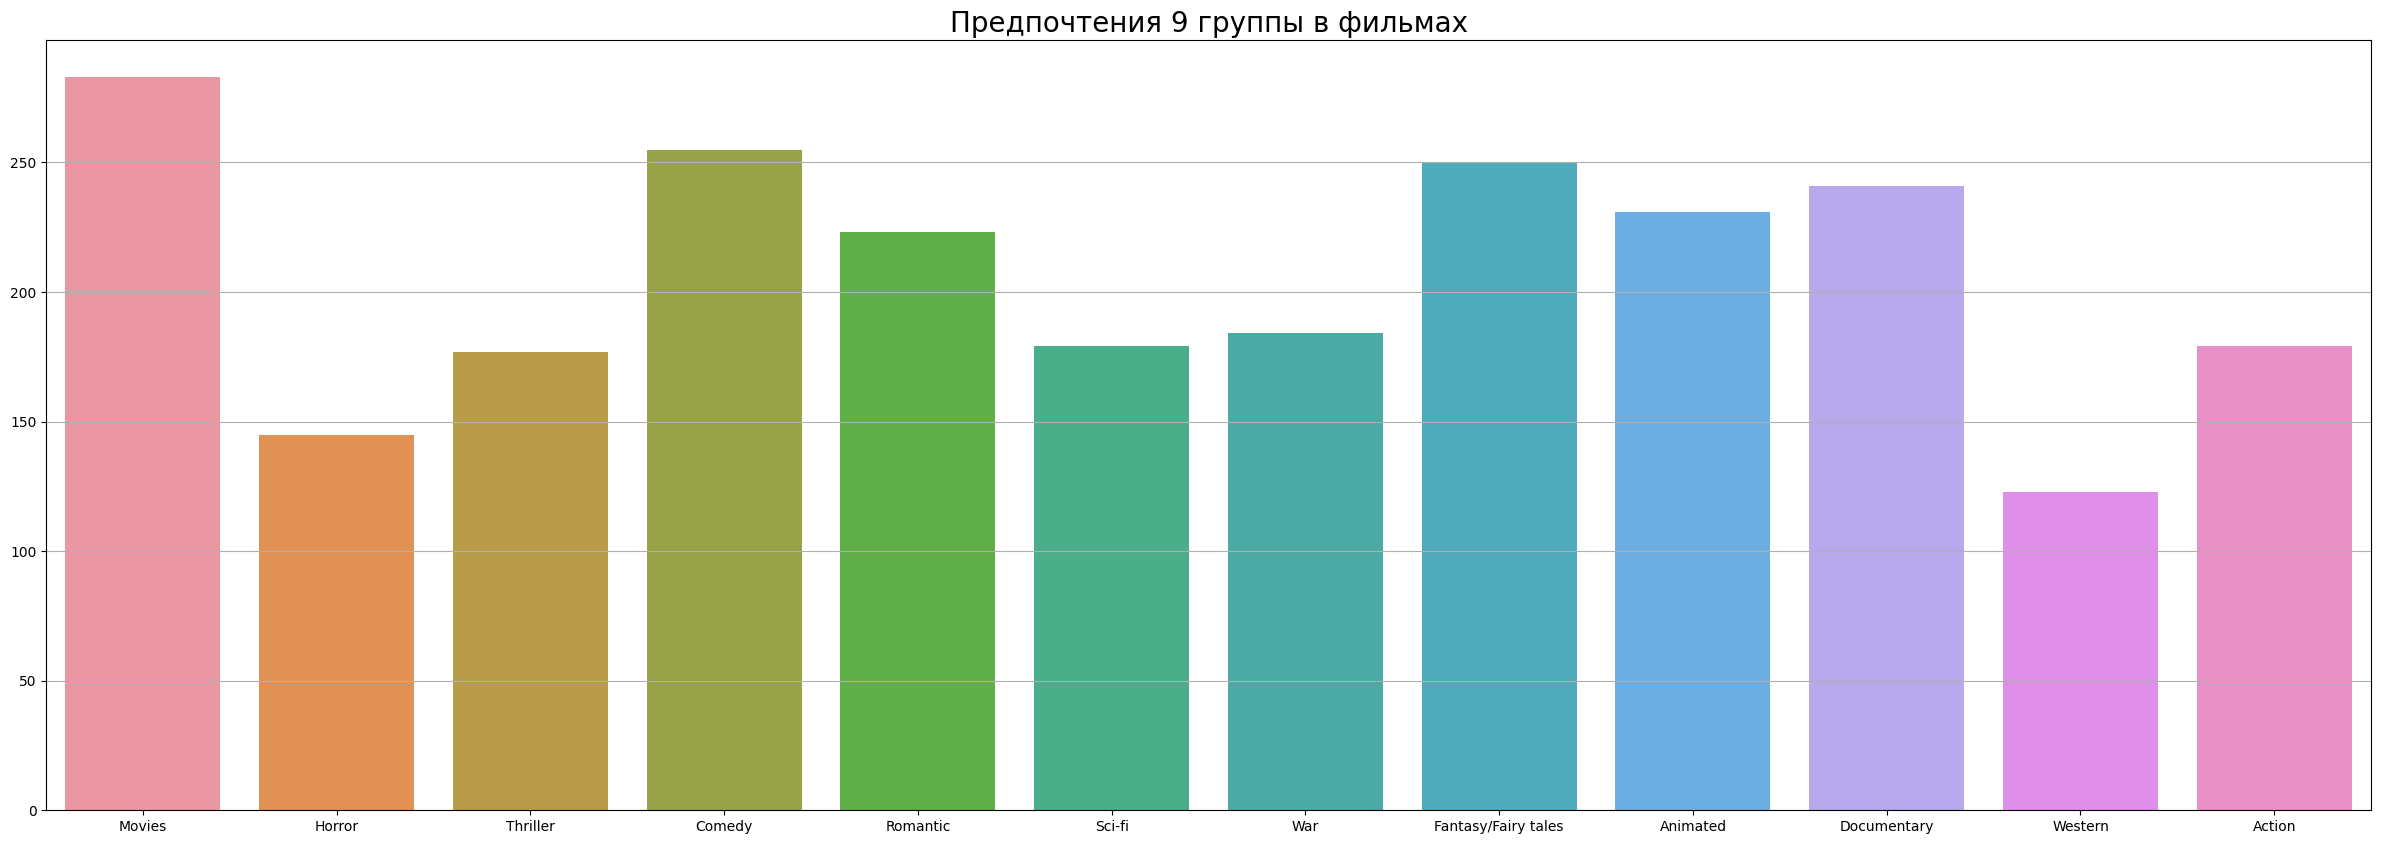

In [45]:
g_= []
for i in group_8:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title("Group 9's film preferences",fontsize=20)
plt.show()

<b>Note:</b>

Alternative rock fans like films in many genres, especially comedies and cartoons.The least favoured by this group are westerns.

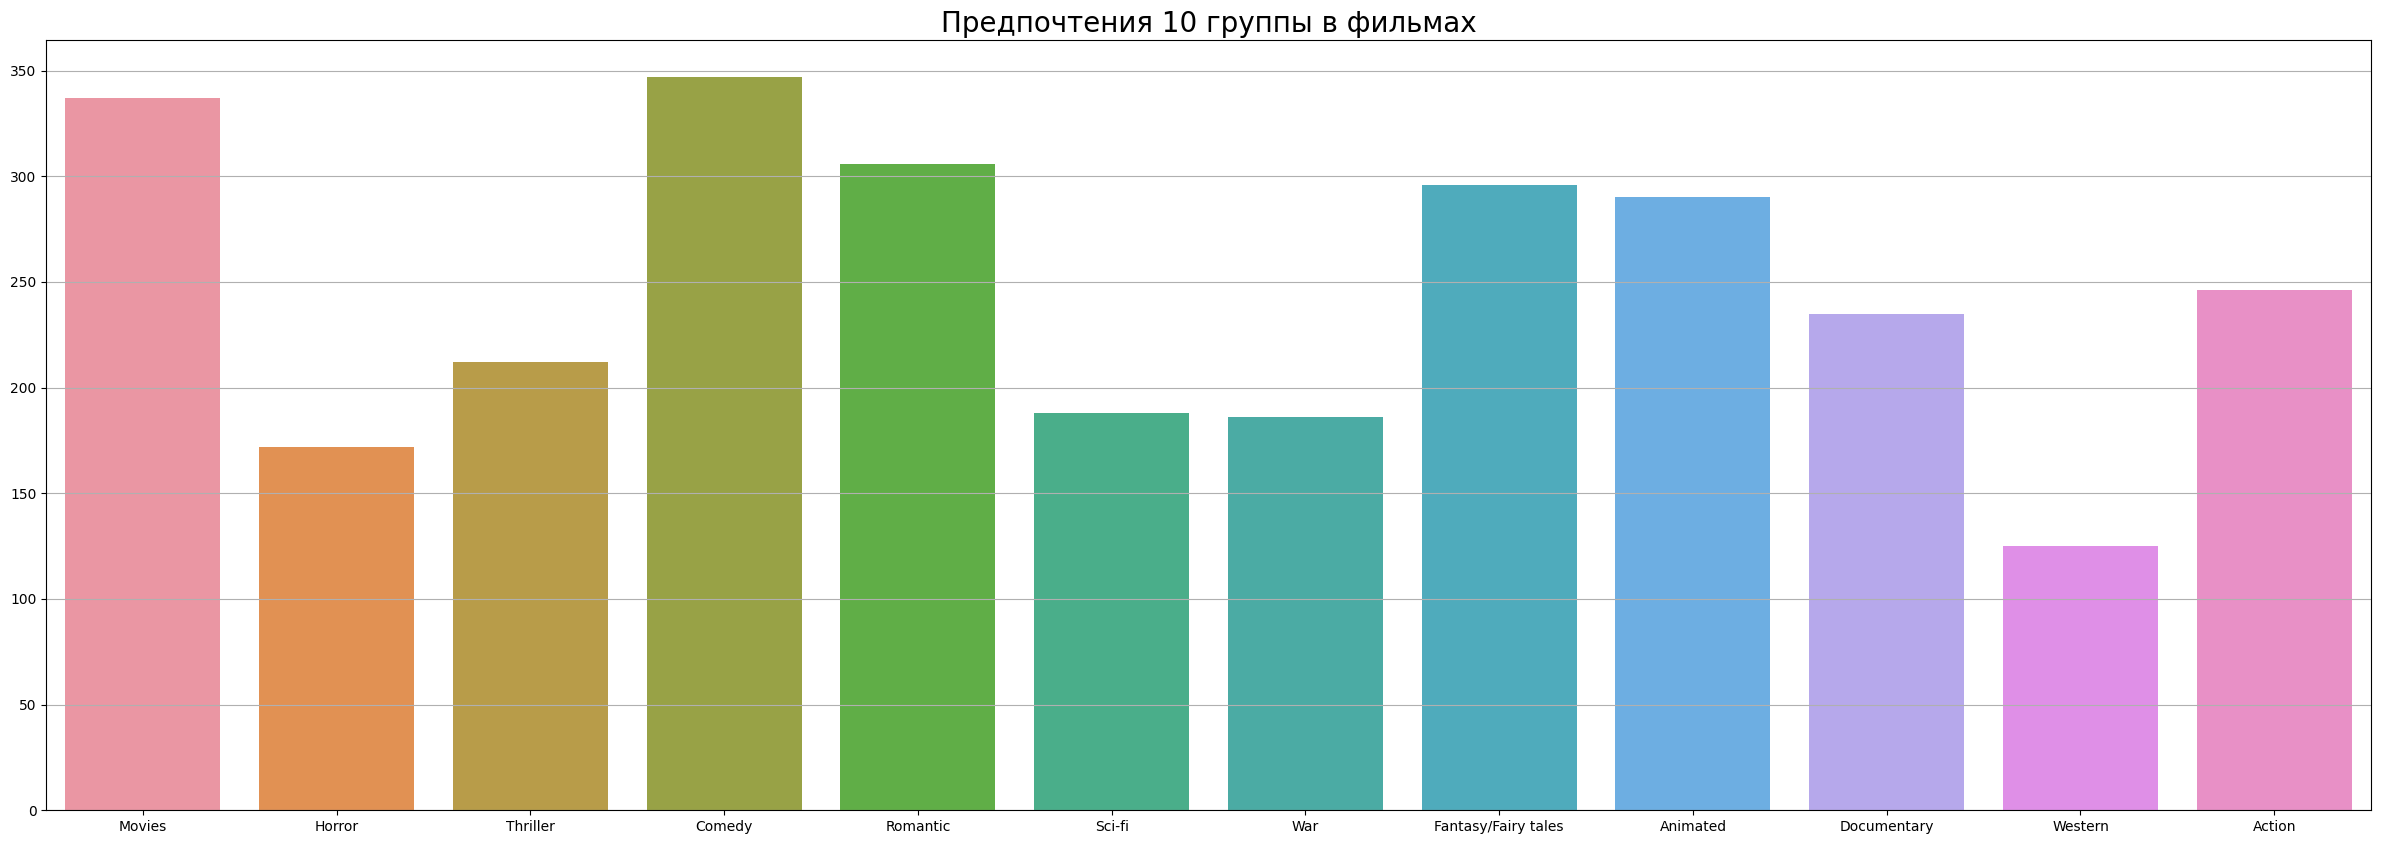

In [46]:
g_= []
for i in group_9:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title("Group 10's film preferences",fontsize=20)
plt.show()

<b>Note:</b>

Pop music fans like most of the genres presented, but especially comedies, romantic films, documentaries and action films.

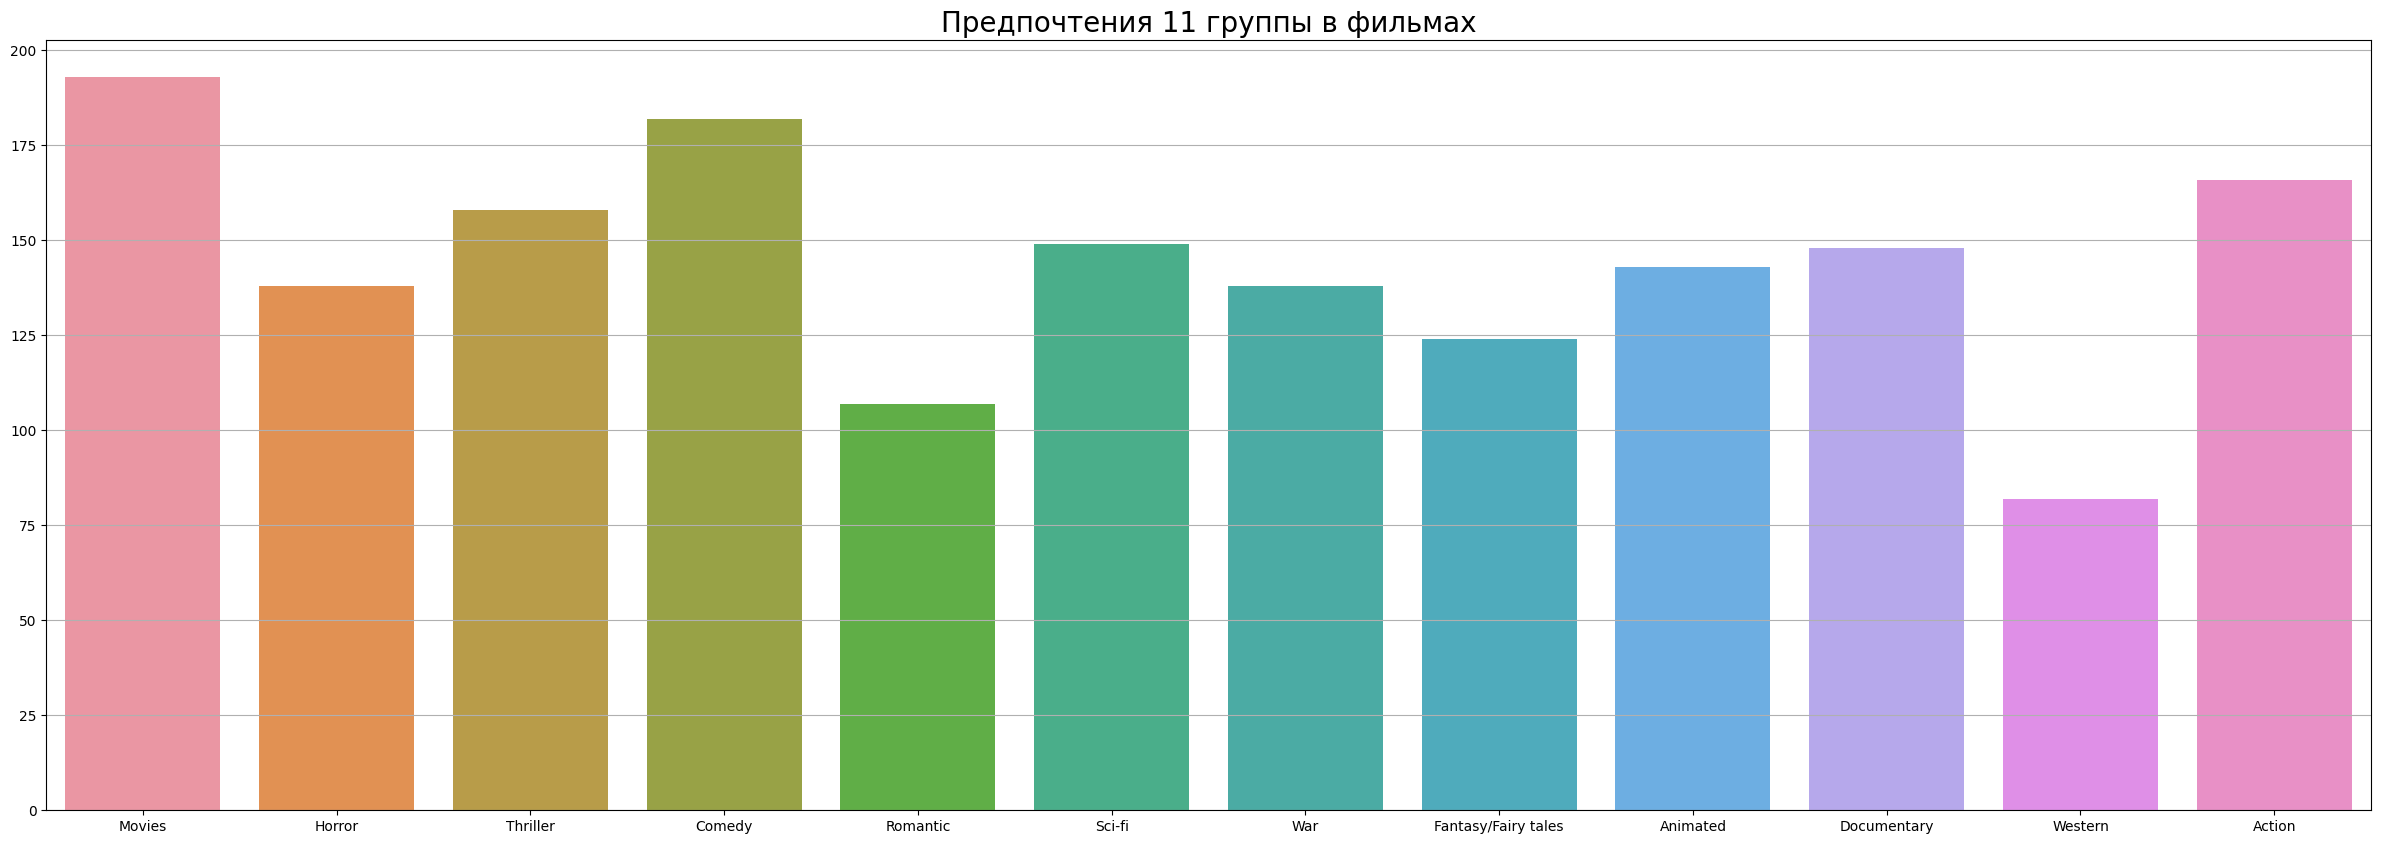

In [47]:
g_= []
for i in group_10:
  g_.append(list(MoviePrefered.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(MoviePrefered.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =MoviePrefered.columns.values, y = sum)
ax.set_title('Group 11 film preferences',fontsize=20)
plt.show()

<b>Note:</b>

Melomaniacs in music are also "melomaniacs" in films, as they prefer basically all genres in films.

#### Conclusion

Most students like music in general. The most popular genre is rock music, the least popular is country music.

Among the surveyed students, it is possible to identify 11 groups with different preferences in music. Some genres may overlap between groups, but each cluster can be distinguished by certain features.

It is rather difficult to trace the connection between preferences in music and preferences in films. However, we can say that people who like cheerful and rhythmic genres in music prefer comedies, cartoons, romantic films. The same people who prefer heavier music, you can see that in the choice of film genre they are also more inclined to horror, war films. Perhaps you can also distinguish people "Melomaniacs / Movie addicts" - this group of people do not give importance to what to watch and what to listen to, because you can not limiting yourself to a particular genre, enjoy everything and in each type of find that come to your liking.

In addition, in all classters there is a tendency to love comedies and cartoons, and the most unpopular genre for all groups is western films.

## Second part

Сlustering of attributes of personal characteristics/opinions:
* Comparison of clustering done by three algorithms: KMeans, DBSCAN, Hierarchical Clustering. Using different hyperparameters to find the optimal partitioning. To determine optimality use any methods: metrics, visualisation, stony scrambling, your thoughts.
* Choosing the best clustering. Use the data as is or the data after transforming with PCA/tSNE, choosing fewer principal components and clustering the data with fewer columns.

Select from the main table the columns that correspond to the personal characteristics of students.

In [67]:
personality = responses.iloc[:,76:133]
#personality

To estimate the clustering models, we consider the corresponding metric.
Since in this case we do not know the true labels of the features, we will use algorithms that do not use this idea in their calculations:
* Shilhouette score.

The best value is 1 and the worst is -1. Values around 0 indicate overlapping clusters. Negative values usually indicate that the sample was assigned to the wrong cluster because the other cluster is more similar.
* Davies Bouldin score.

The minimum score is zero, with lower values indicating better clustering.
* Calinski and Harabasz score

The higher this metric, the better clusters are defined.

In [68]:
def metrics(responses,data_fit):
  print('Shilhouette score ',  silhouette_score(responses, data_fit))
  print('Davies Bouldin score ', davies_bouldin_score(responses,data_fit))
  print('Calinski and Harabasz score', calinski_harabasz_score(responses,data_fit))

### Kmeans

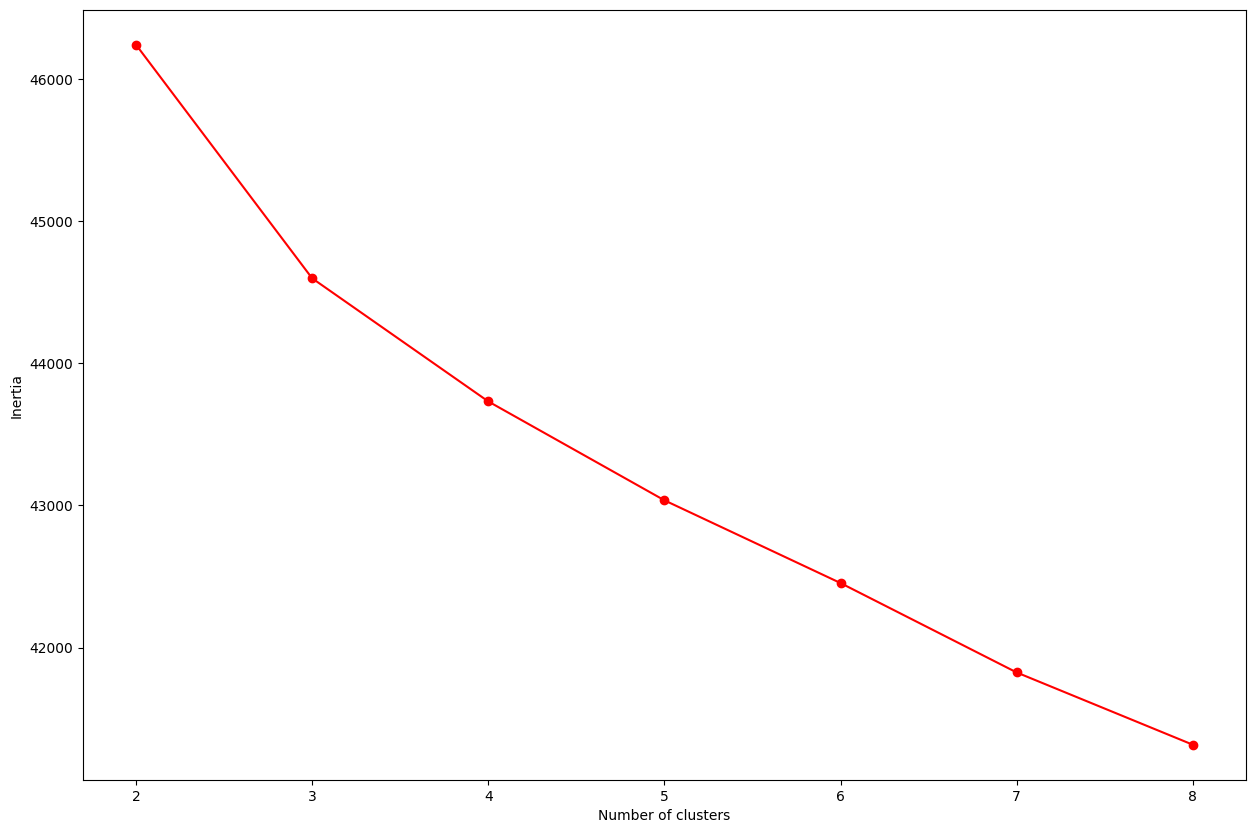

In [69]:
x = list(range(2, 9))
inertia = []
for k in x:
    kmeans = KMeans(n_clusters=k,init = 'k-means++', n_init = 15, random_state= 10)
    kmeans.fit_transform(personality)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(x, inertia, '-r')
plt.plot(x, inertia, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init = 15, max_iter= 10000)
kmeans.fit_transform(personality)
pd = kmeans.predict(personality)
metrics(responses, pd)

Shilhouette score  -5.972330288597049e-05
Davies Bouldin score  6.5594577229406825
Calinski and Harabasz score 17.25330591519772


<b>Note:</b>

The optimal number of clusters was obtained by using rock scattering. The kmeans model performed well in terms of Shilhouette score and Calinski and Harabasz score metrics.

### DBSCAN

In [71]:
db = DBSCAN(eps=12, min_samples=30).fit(personality)
db.labels_
metrics(responses, db.labels_)

Shilhouette score  -0.04324103178611013
Davies Bouldin score  1.133284259933434
Calinski and Harabasz score 0.6992995055991493


<b>Note:</b>

The selection of parameters was done manually. Very often this model defined all attributes in one cluster, this may be due to the close proximity of groups to each other. Metrics gave rather weak results, this can be explained by the fact that these metrics do not work well with clusters selected on the basis of density, which are obtained from DBSCAN.

### Hierarchical Clustering

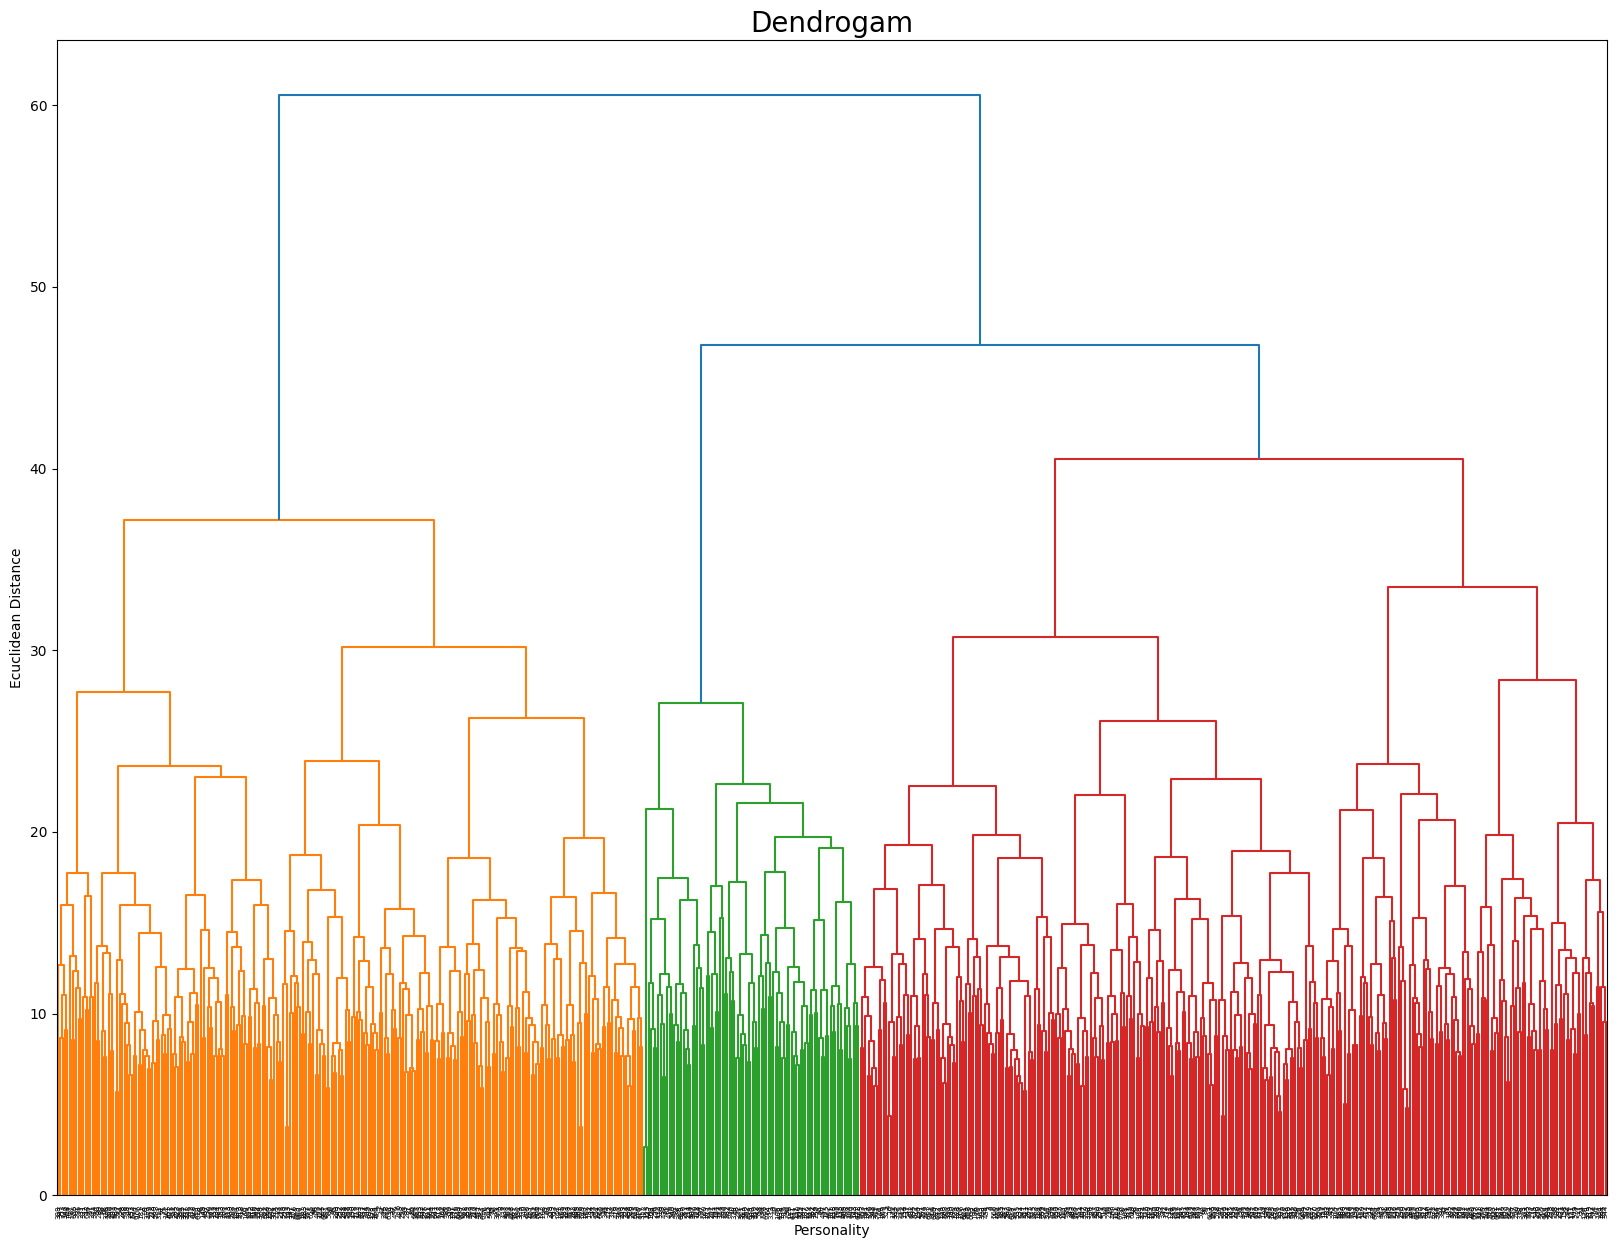

Shilhouette score  0.005353637329370434
Davies Bouldin score  6.1752709924773095
Calinski and Harabasz score 17.337831770905655


In [72]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(sch.linkage(personality, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Personality')
plt.ylabel('Ecuclidean Distance')
plt.show()
clustering = AgglomerativeClustering(n_clusters = 3).fit(personality)
#clustering
metrics(responses, clustering.labels_)

<b>Note:</b>

Dendrogram was used to find the optimal number of clusters. According to the metrics, the Hierarchical Clustering model performed better than all previous models.

### TSNE

In [73]:
tsne = TSNE()
Z = tsne.fit_transform(personality)
Z.shape

(674, 2)

Application of Hierarchical clustering as it showed the best results.

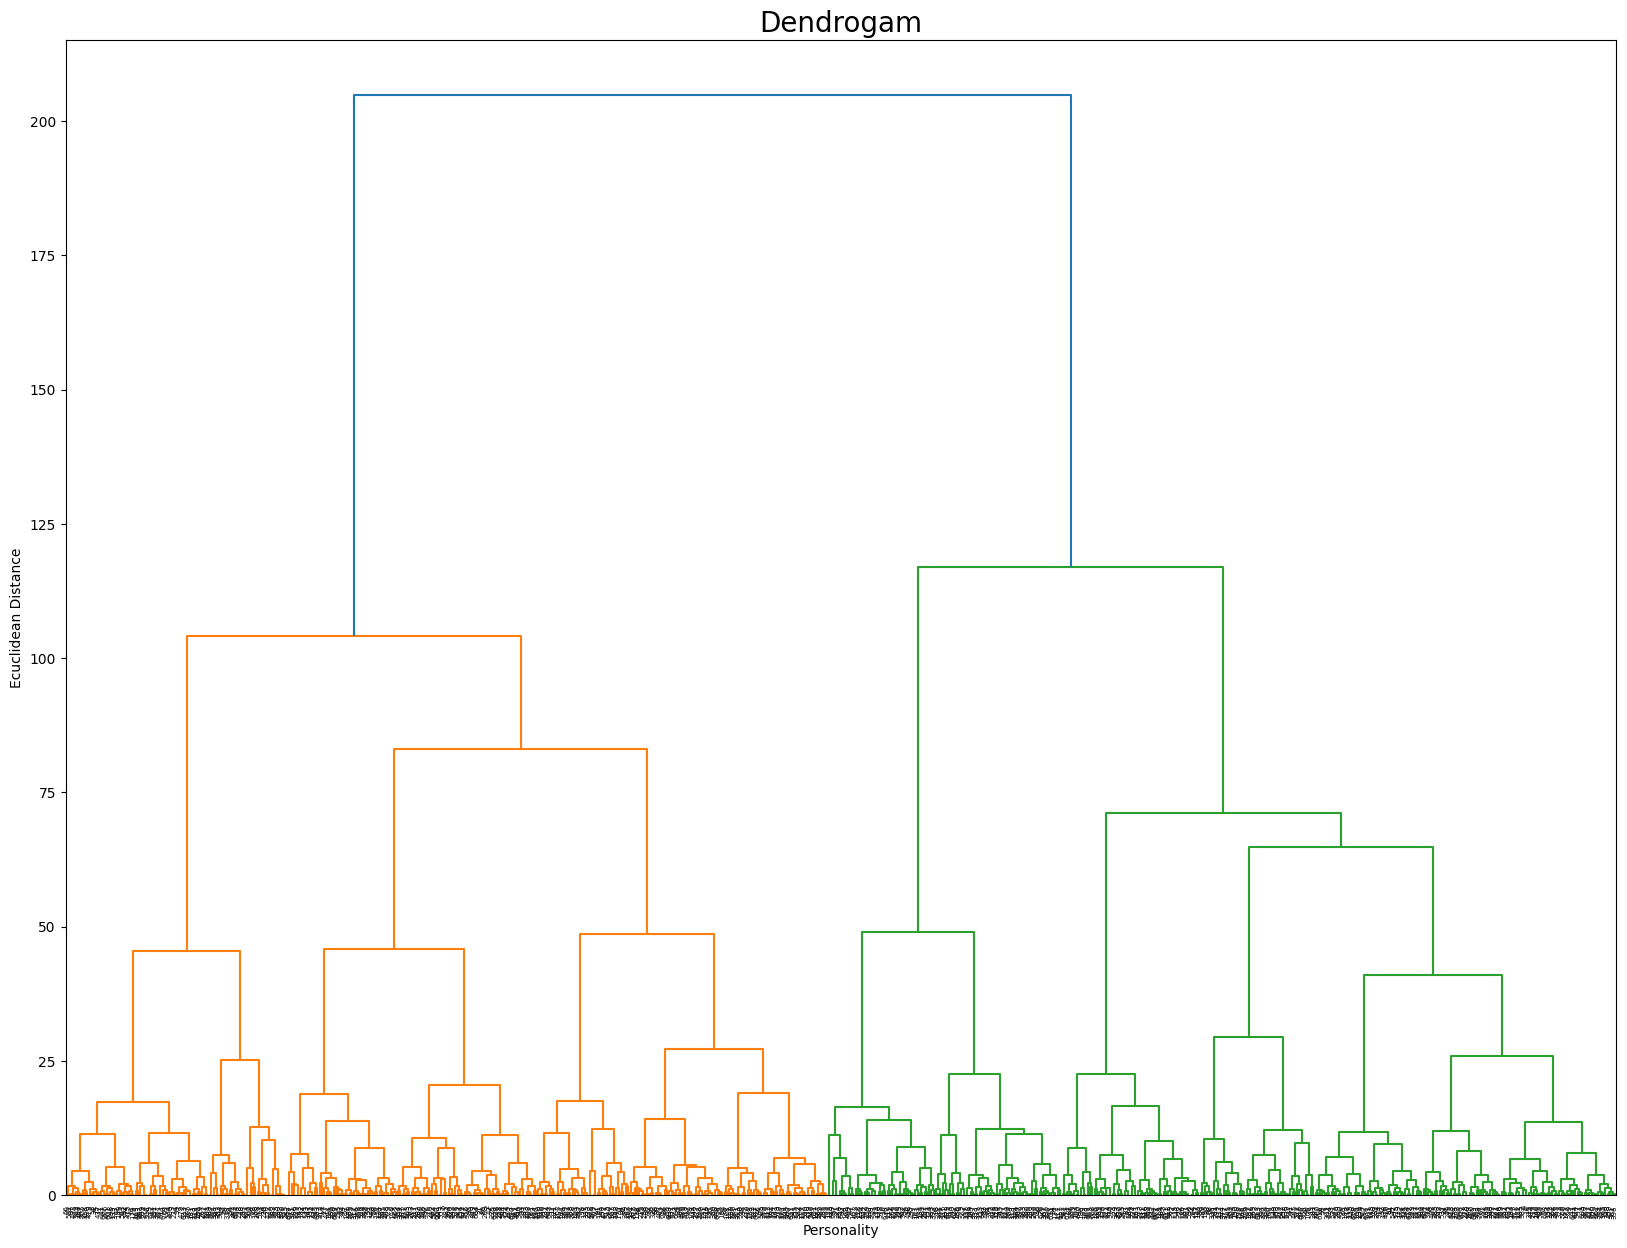

In [74]:
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(sch.linkage(Z, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Personality')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [75]:
clustering = AgglomerativeClustering(n_clusters = 2).fit(Z)
clustering
metrics(responses, clustering.labels_)

Shilhouette score  0.019362532225517707
Davies Bouldin score  6.761006228308323
Calinski and Harabasz score 13.157048381665076


In [76]:
lb = clustering.labels_

<b>Note:</b>

After applying TSNE, the dimensionality decreased to (674.2) and relying on the metrics, the quality of clustering improved.

### Evaluating the group in relation to their personal characteristics

In [77]:
personality_1 = personality.iloc[:,:19]
personality_2 = personality.iloc[:,19:38]
personality_3 = personality.iloc[:,38:]
#personality_3

In [78]:
group_0 = []
group_1 = []

for i in range(len(lb)):
  if lb[i] == 0:
    group_0.append(i)
  if lb[i] == 1:
    group_1.append(i)


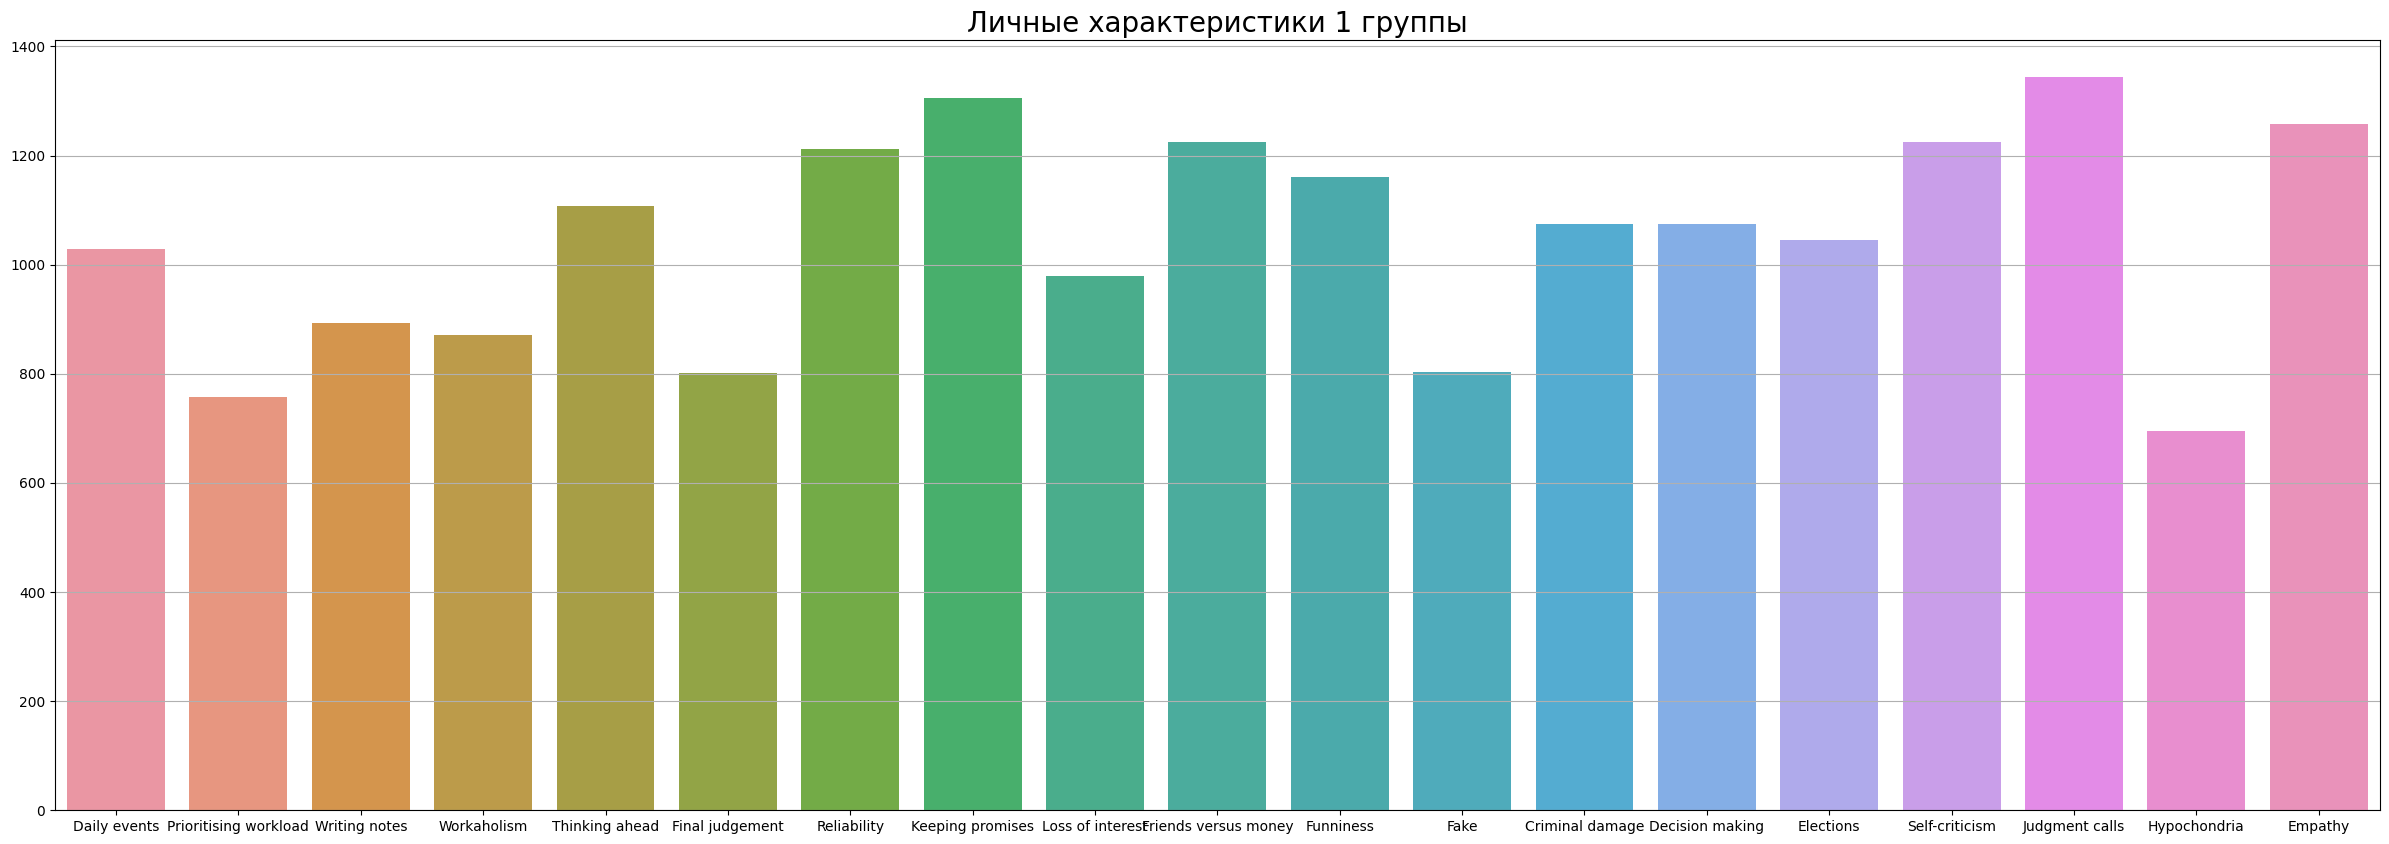

In [79]:
import pandas as pd
g_= []
for i in group_0:
  g_.append(list(personality_1.iloc[i]))
df = pd.DataFrame(g_)
df.columns=[list(personality_1.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =personality_1.columns.values, y = sum)
ax.set_title('Personal characteristics of group 1',fontsize=20)
plt.show()

<b>Note:</b>

This group can be described as responsible and committed people who keep their promises and fulfil their goals.People in this group like to look at a situation from all sides before making any decision.Also, they are people who choose their friends over money.Moreover, this group of people can be described as positive, modern, empathic, fair and honest people.

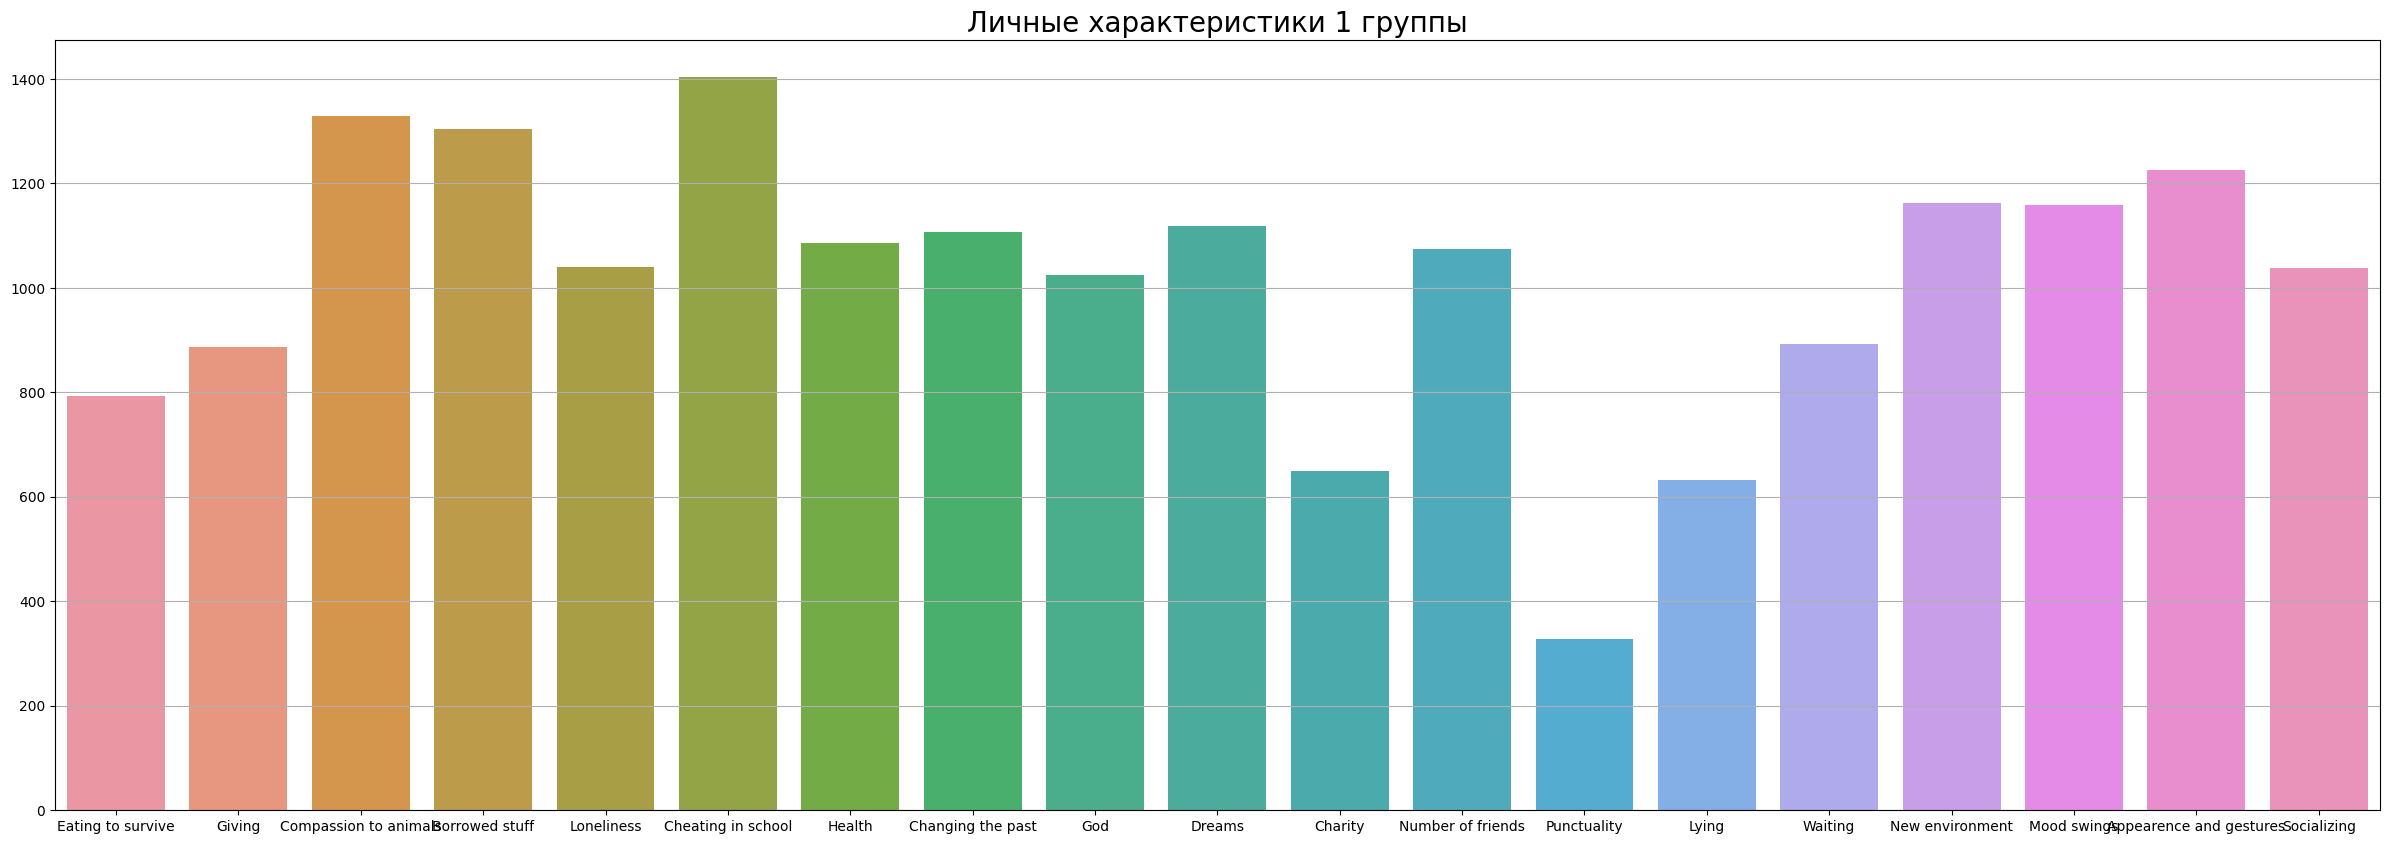

In [80]:
g_= []
for i in group_0:
  g_.append(list(personality_2.iloc[i]))
df = pd.DataFrame(g_)
df.columns=[list(personality_2.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =personality_2.columns.values, y = sum)
ax.set_title('Personal characteristics of 2 group',fontsize=20)
plt.show()

<b>Note:</b>

People from this group have a hard time watching animals being tortured. They care not only about animals, but also about other people's things. People in this group say that they cheat at school. In addition, people in this group are attentive to their health, because they are worried about it. They are also religious people. They note that they always have good dreams. This cluster of people is quite sociable, as people note that they have a large number of friends. It is not difficult for them to adapt to a new environment. However, they notice that their moods change frequently. These people care about how they look and like to meet new people.

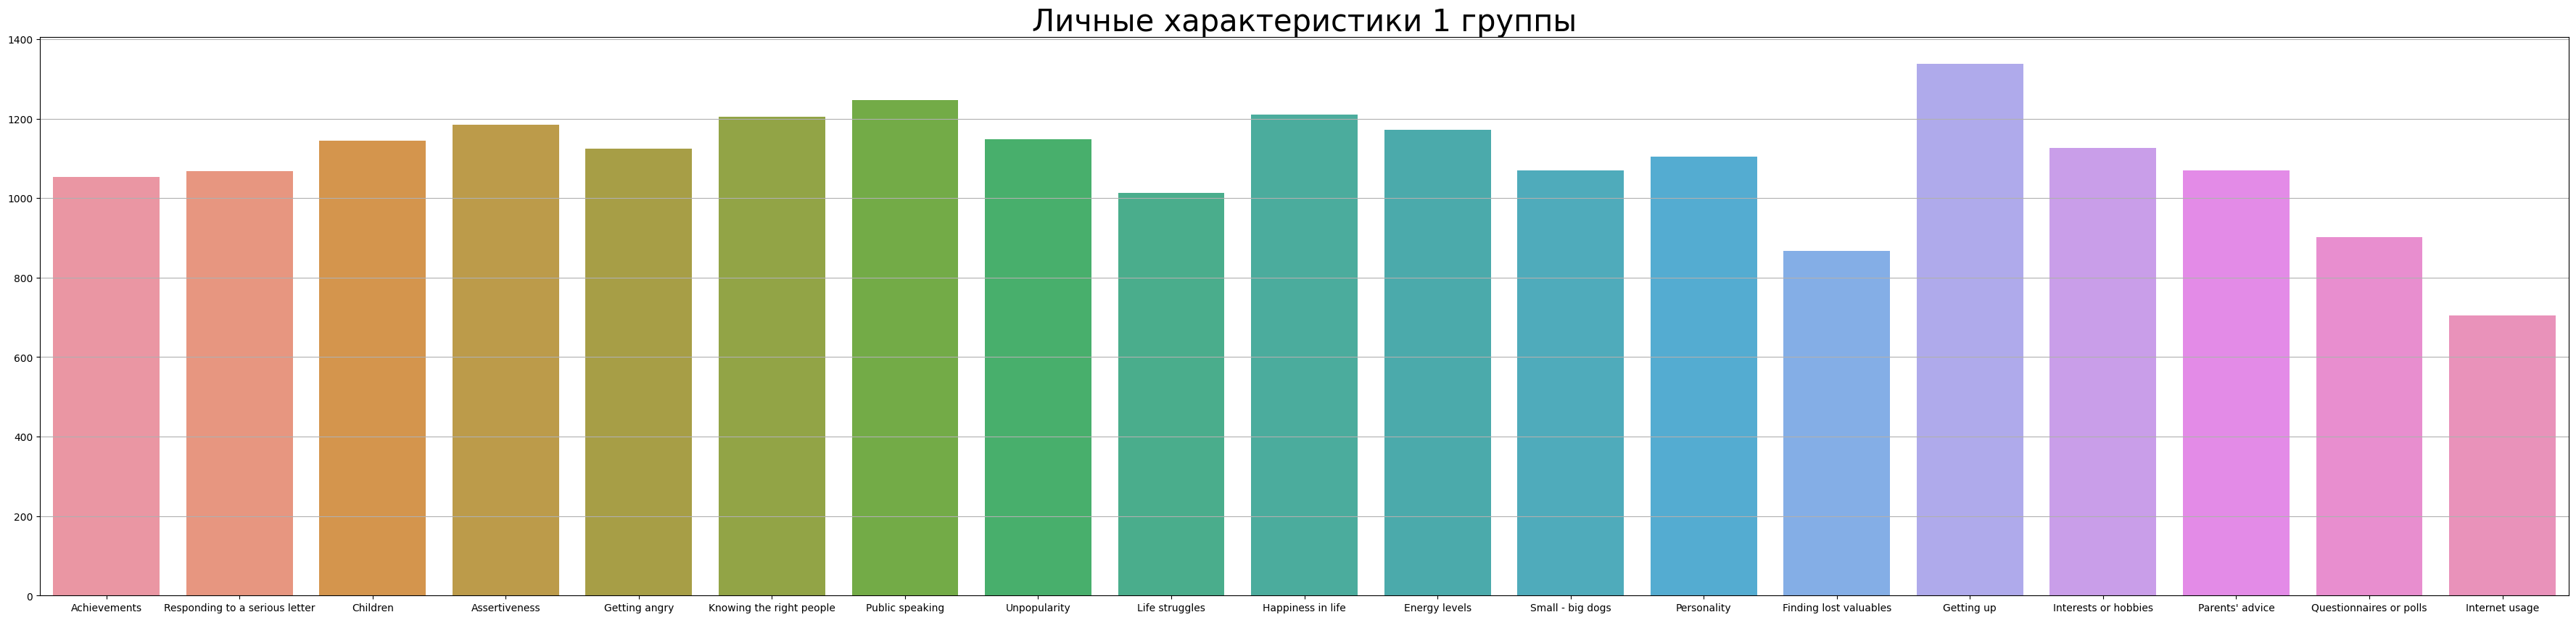

In [81]:
g_= []
for i in group_0:
  g_.append(list(personality_3.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(personality_3.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(45, 10))
plt.grid()
ax = sns.barplot(x =personality_3.columns.values, y = sum)
ax.set_title('Personal characteristics of group 3',fontsize=30)
plt.show()

<b>Note:</b>

People from this group adore children and like to spend time in their company.These are people who can, without fear, express their opinions to others. They try to make acquaintances with the right people.They like to be prepared for performances. These people are prone to self-digging, so if someone does not like them, they are likely to look for the problem in themselves. However, they note that they are perfectly happy and full of energy and life. They believe that their character has mainly positive features.Such people are mostly owls, it is difficult for them to get up in the morning. These people have a large number of interests and hobbies. They also listen to the advice of their parents.

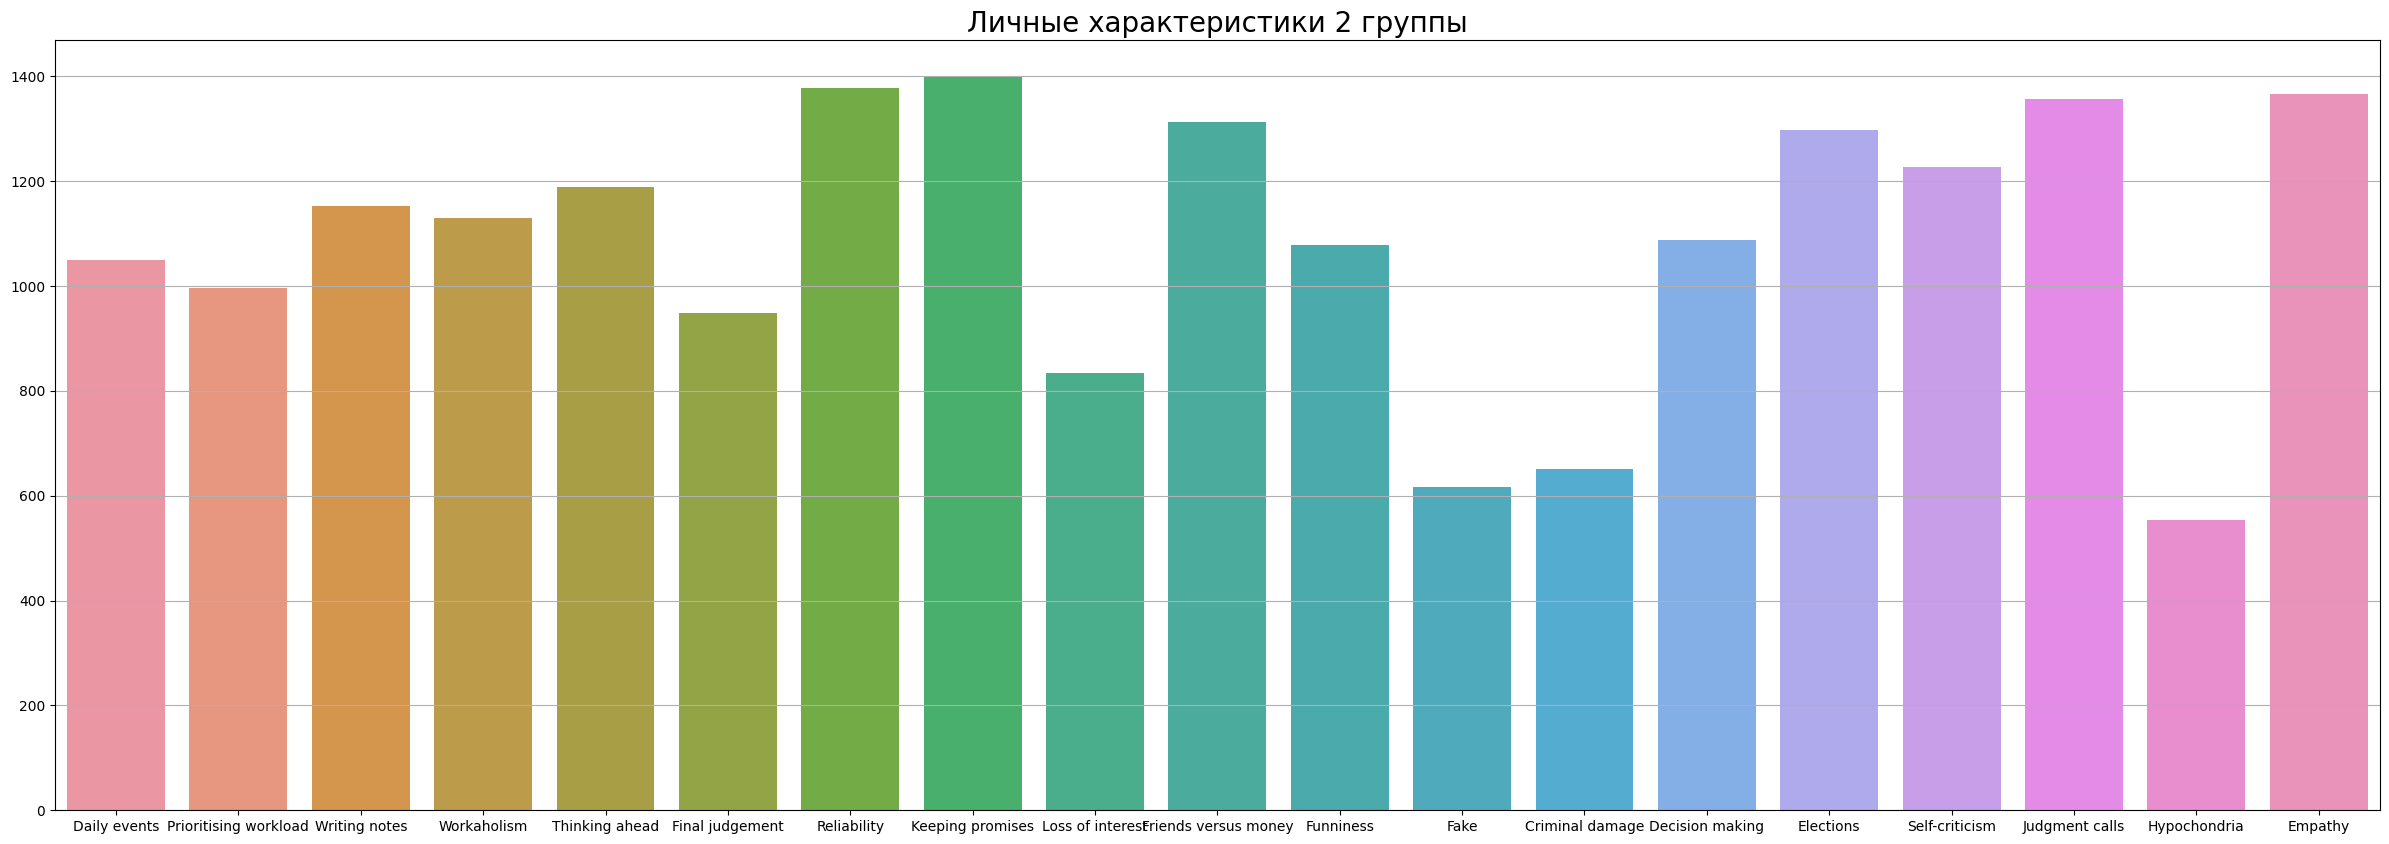

In [82]:
g_= []
for i in group_1:
  g_.append(list(personality_1.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(personality_1.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =personality_1.columns.values, y = sum)
ax.set_title('Personal Characteristics of Group 1',fontsize=20)
plt.show()

<b>Note:</b>

This group of people can be described as responsible and committed people who keep their promises and fulfil their tasks.They try to see the good in everything. Moreover, this group of people can be described as modern, self-critical, empathic, fair and honest people.

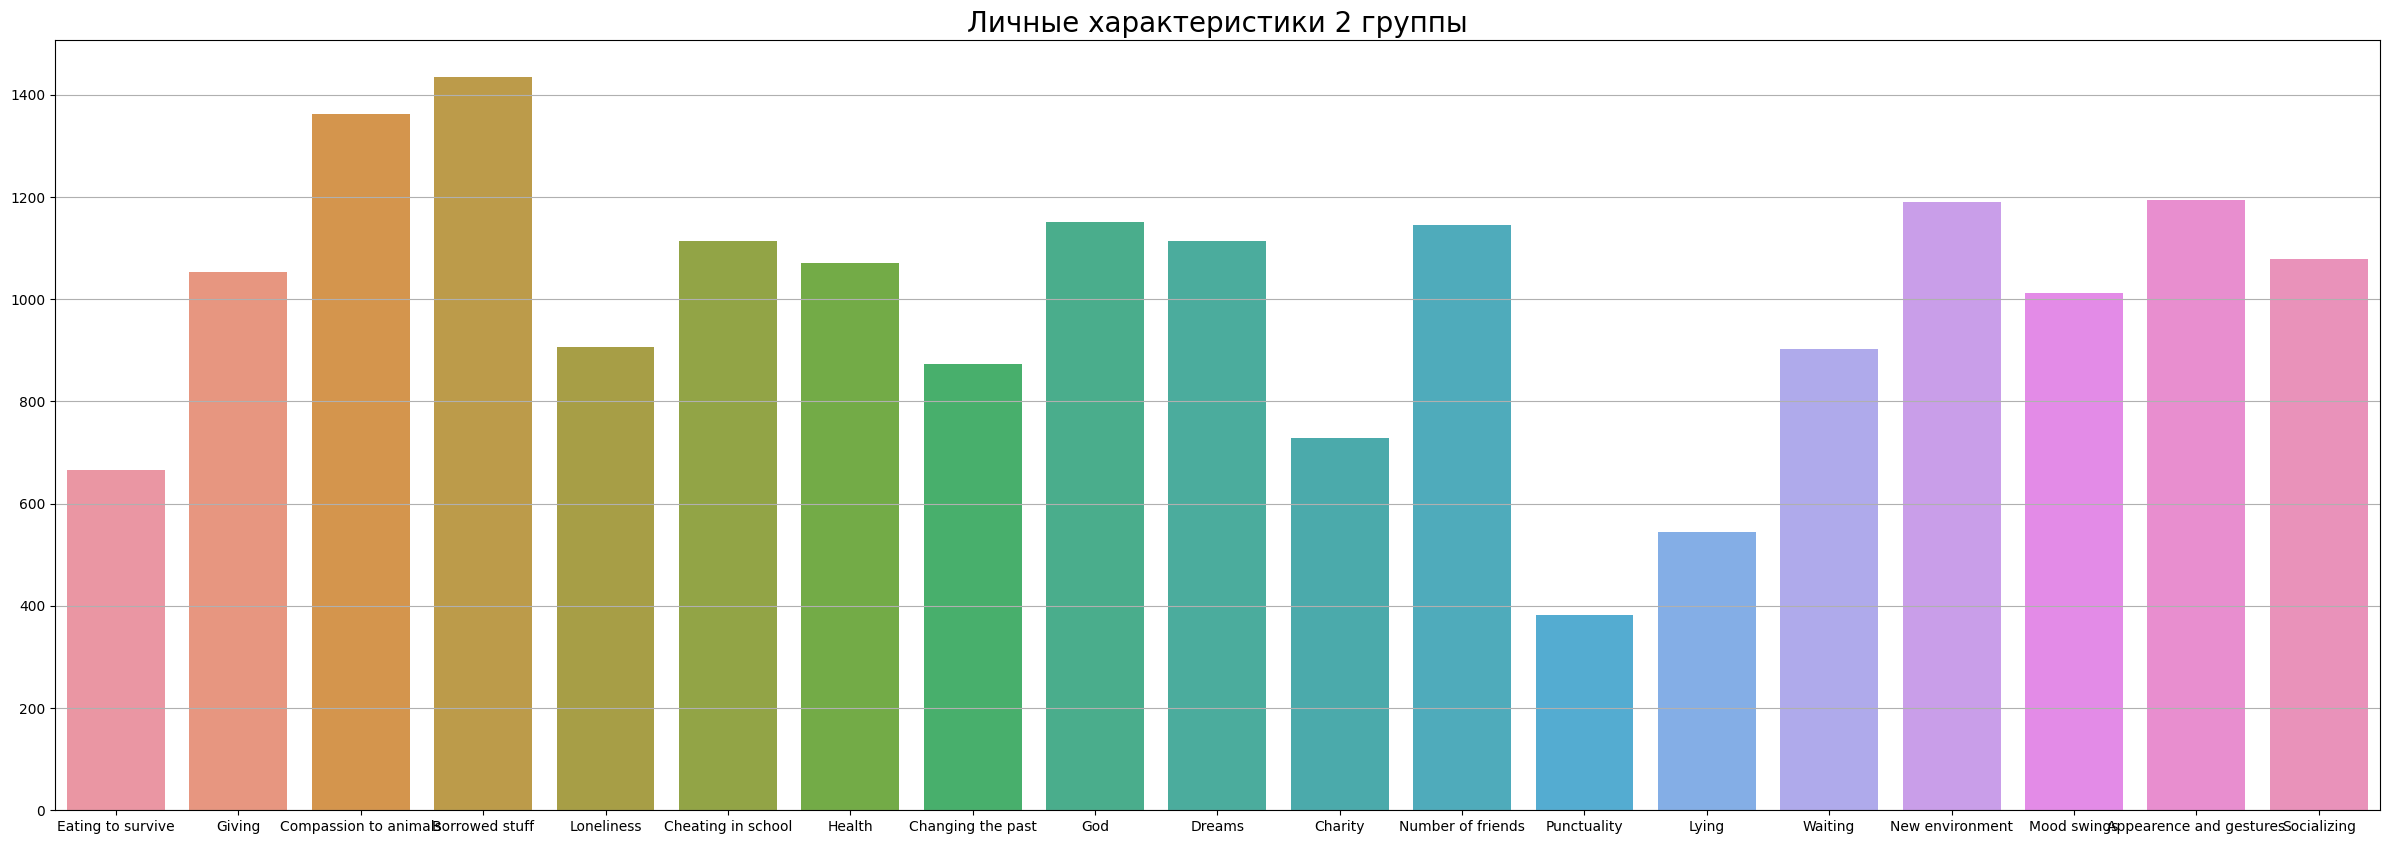

In [83]:
g_= []
for i in group_1:
  g_.append(list(personality_2.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(personality_2.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =personality_2.columns.values, y = sum)
ax.set_title('Personal Characteristics of Group 2',fontsize=20)
plt.show()

<b>Note:</b>

People in this group love animals. They treat not only animals but also other people's things with care. People in this group say that they cheat at school. In addition, people in this group are religious people. They note that they always have good dreams. This cluster of people is quite sociable, as people note that they have a large number of friends. It is not difficult for them to adapt to a new environment, it is important to them how they look and they like to meet new people.

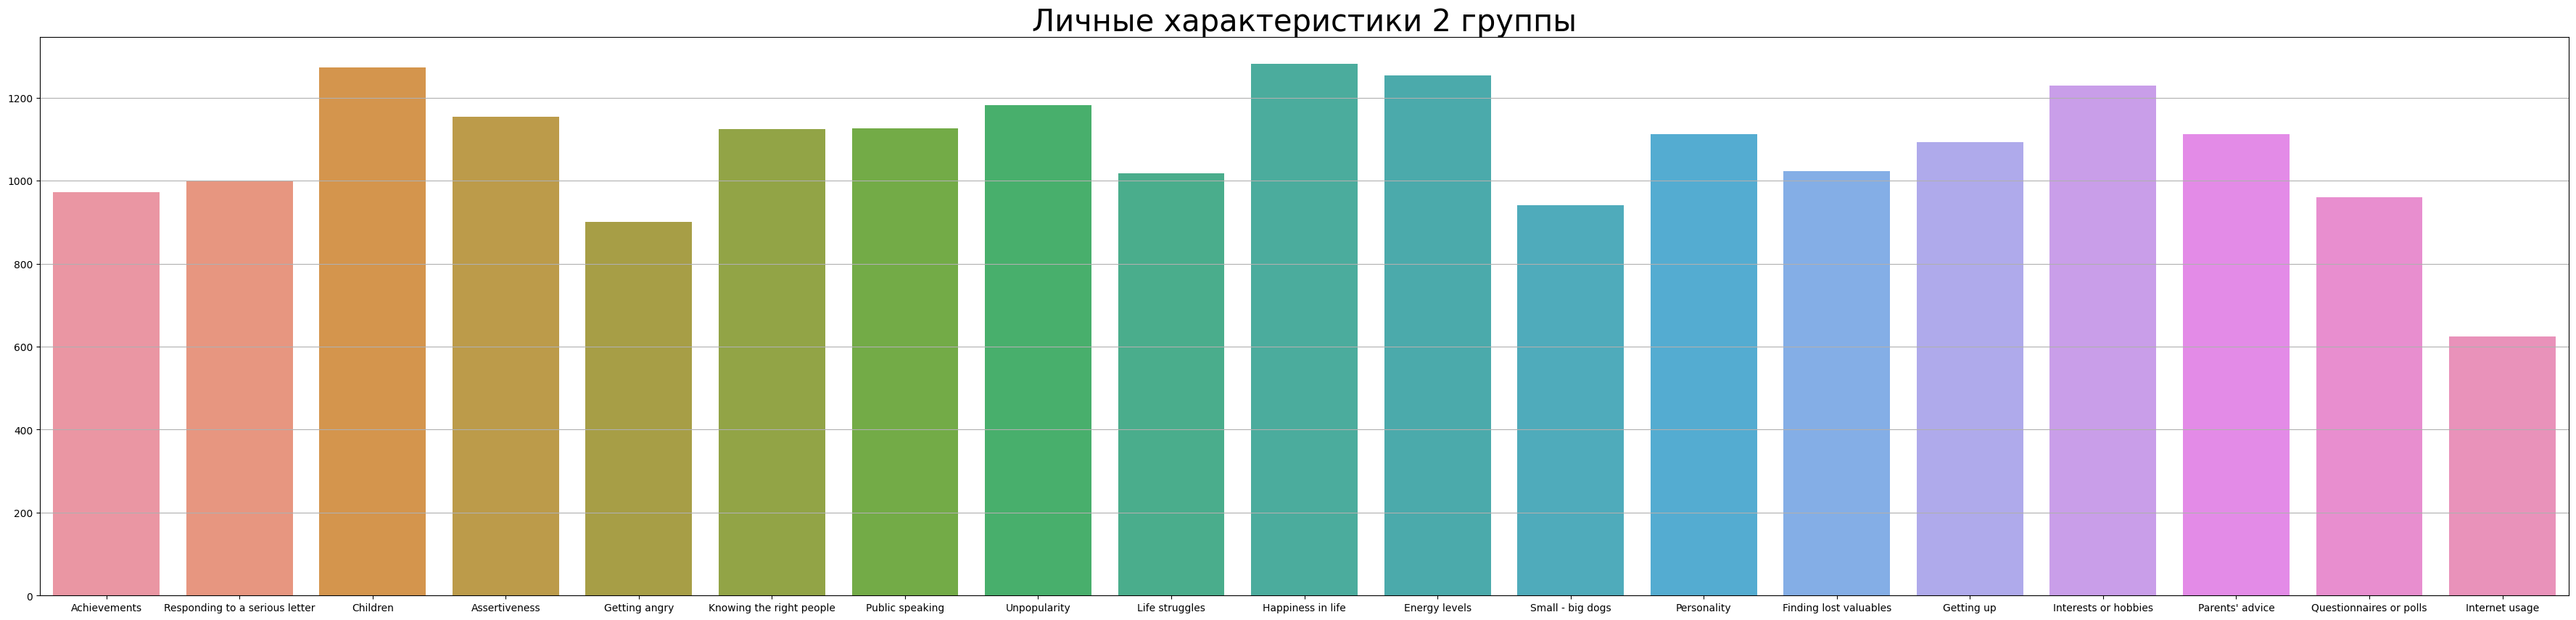

In [84]:
g_= []
for i in group_1:
  g_.append(list(personality_3.iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(personality_3.columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(45, 10))
plt.grid()
ax = sns.barplot(x =personality_3.columns.values, y = sum)
ax.set_title('Personal Characteristics of Group 3',fontsize=30)
plt.show()

<b>Note:</b>

People from this group adore children and like to spend time in their company.These are people who can, without fear, express their opinions to others. They try to make acquaintances with the right people.They like to be prepared for performances. These people are prone to self-digging, so if someone does not like them, they are likely to look for the problem in themselves. However, they note that they are absolutely happy and full of energy and life. In addition, people from this group like big and dangerous dogs.They believe that their character has mainly positive features.Such people are mostly owls, it is difficult for them to get up in the morning. They have a large number of interests and hobbies.

## Third part

Using demographic data, find how any preferences (music, film, hobbies, opinions) might change depending on demographics (gender-age, relatives, physical characteristics)

Select columns related to demographics from the main table.

In [95]:
demo = responses.loc[:,'Age':]
demo

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,20.0,163.0,48.0,1.0,0,1,3,0,1,0
1,19.0,163.0,58.0,2.0,0,1,3,0,0,0
2,20.0,176.0,67.0,2.0,0,1,2,0,0,0
4,20.0,170.0,59.0,1.0,0,1,2,0,1,1
5,20.0,186.0,77.0,1.0,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1004,22.0,175.0,60.0,1.0,1,1,2,0,0,0
1005,20.0,164.0,57.0,1.0,0,1,2,0,0,1
1007,18.0,173.0,75.0,0.0,0,1,2,1,0,0
1008,25.0,173.0,58.0,1.0,0,1,3,0,0,0


Using Hierarchical Clustering to define groups based on demographics.

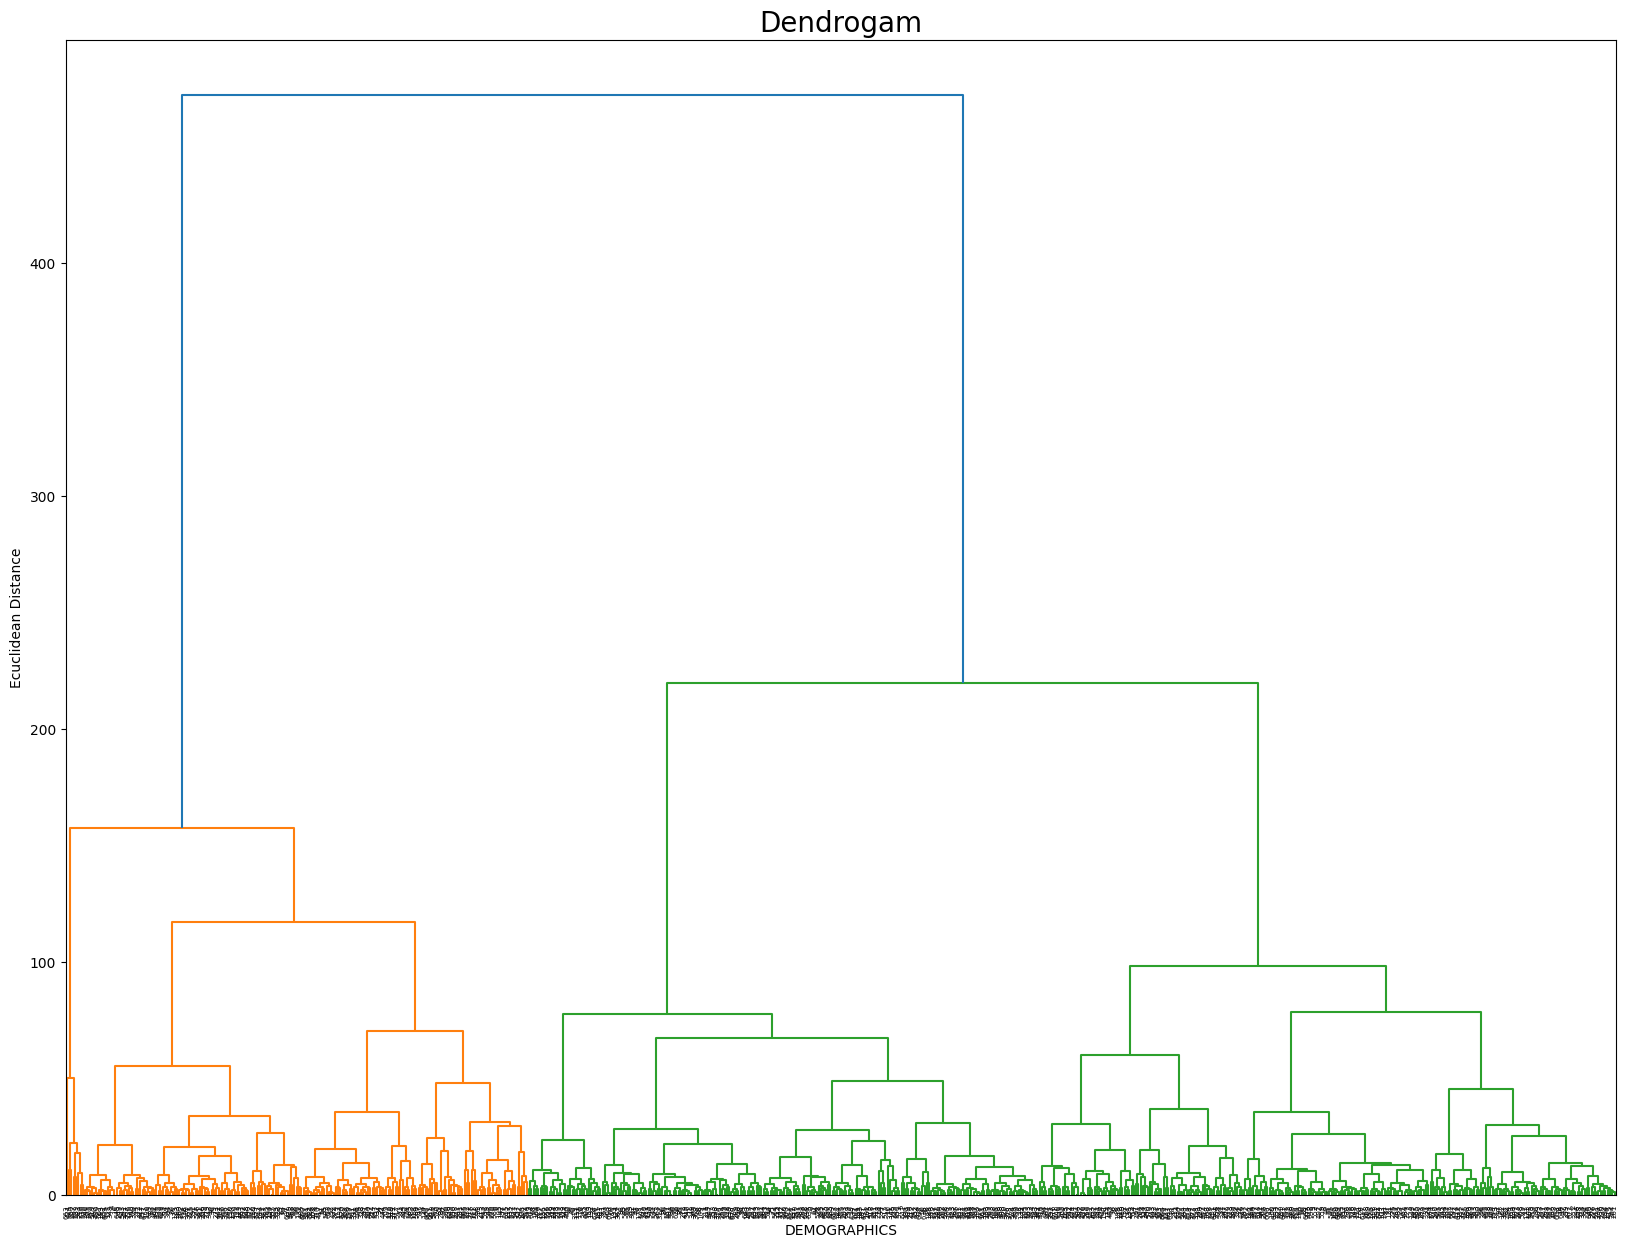

In [86]:
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(sch.linkage(demo, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('DEMOGRAPHICS')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [87]:
clustering = AgglomerativeClustering(n_clusters = 2).fit(personality)
clustering
metrics(responses, clustering.labels_)
cl = clustering.labels_

Shilhouette score  0.026917548924988016
Davies Bouldin score  4.598454084850232
Calinski and Harabasz score 26.32636424710951


Let's look at each group in detail.

In [88]:
group_0 = []
group_1 = []
for i in range(len(cl)):
  if cl[i] == 0:
    group_0.append(i)
  if cl[i] == 1:
    group_1.append(i)

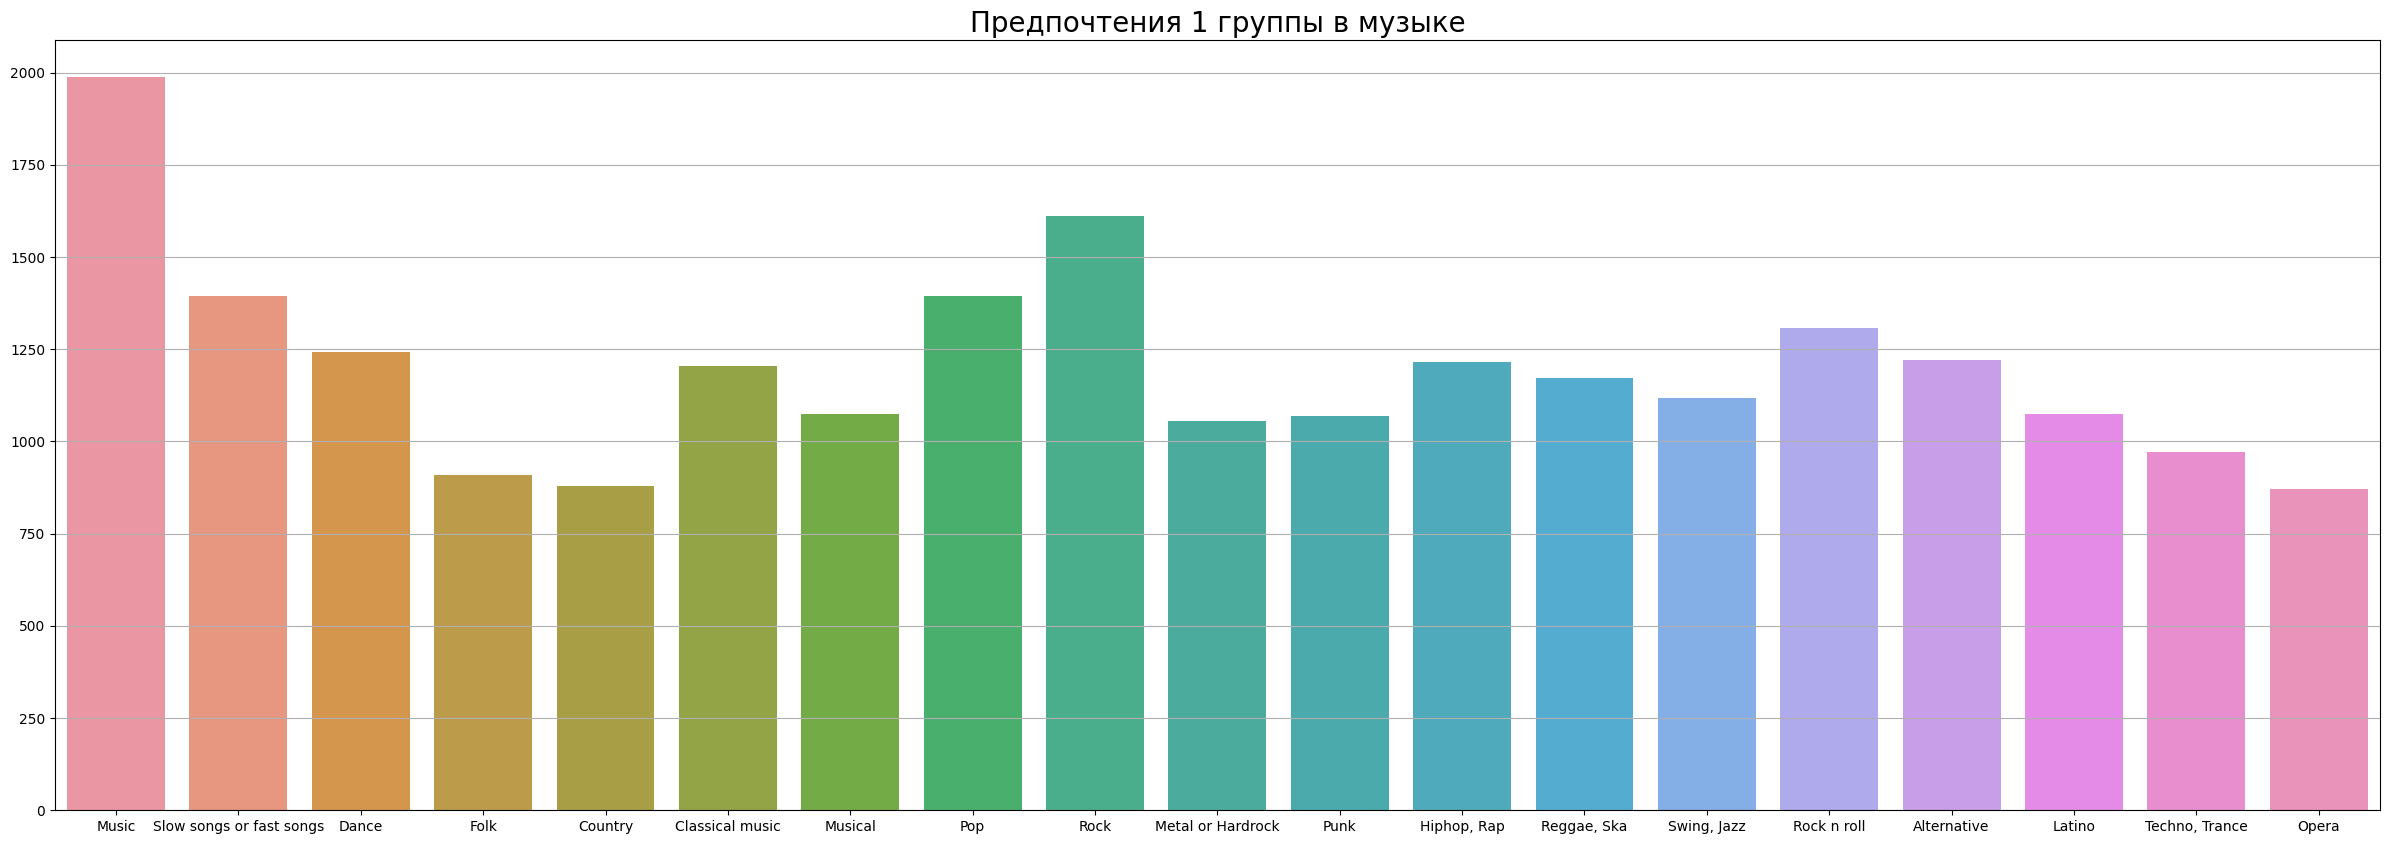

In [89]:
g_= []
for i in group_0:
  g_.append(list(responses.loc[:,'Music':'Opera'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'Music':'Opera'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'Music':'Opera'].columns.values, y = sum)
ax.set_title("Group 1's preferences in music",fontsize=20)
plt.show()

<b>Note:</b>

The most popular genres for this band are rock, pop, rock n roll, classical music.

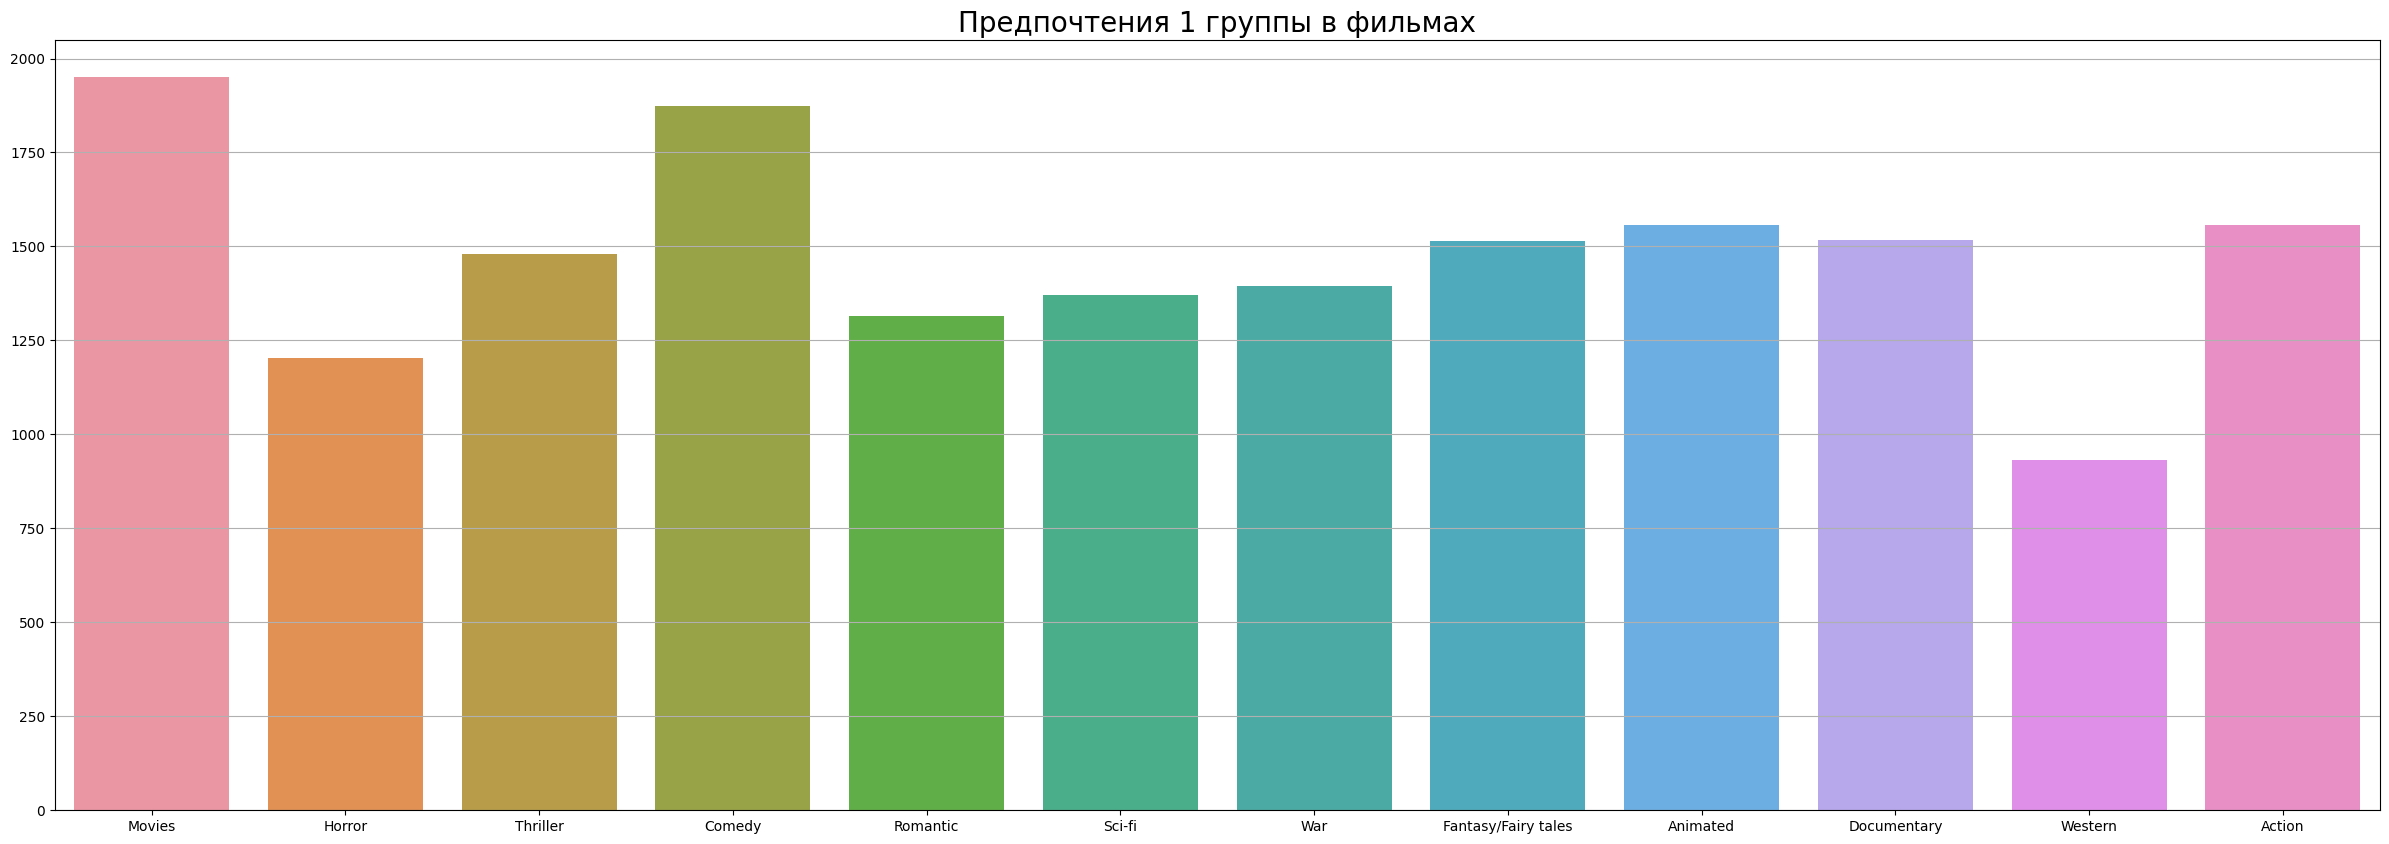

In [90]:
g_= []
for i in group_0:
  g_.append(list(responses.loc[:,'Movies':'Action'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'Movies':'Action'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'Movies':'Action'].columns.values, y = sum)
ax.set_title('Group 1 preferences in the film',fontsize=20)
plt.show()

<b>Note:</b>

This group has the most popular film genres comedy,fantasy/fairy tales,animated,documentary.

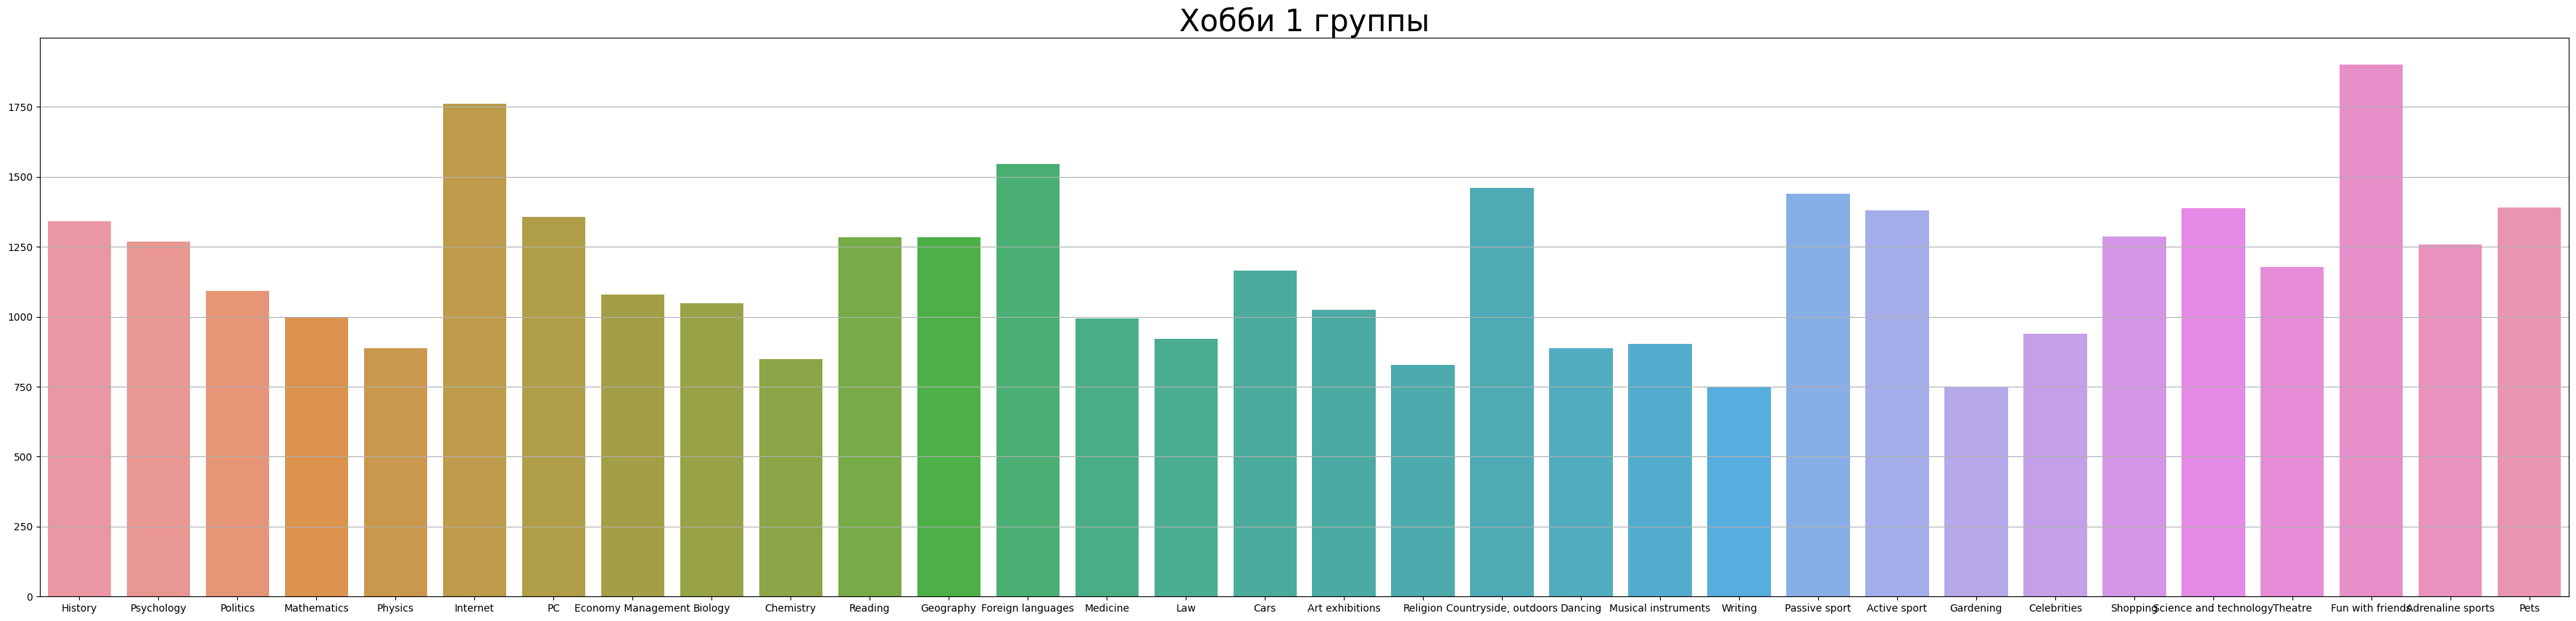

In [91]:
g_= []
for i in group_0:
  g_.append(list(responses.loc[:,'History':'Pets'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'History':'Pets'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(45, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'History':'Pets'].columns.values, y = sum)
ax.set_title('Group 1 hobbies',fontsize=30)
plt.show()

<b>Note:</b>

People from this group note that they spend a lot of time on the Internet, computers, reading, geography, learning foreign languages, out-of-town walks, sports, shopping, technology, socialising with friends, and pets.

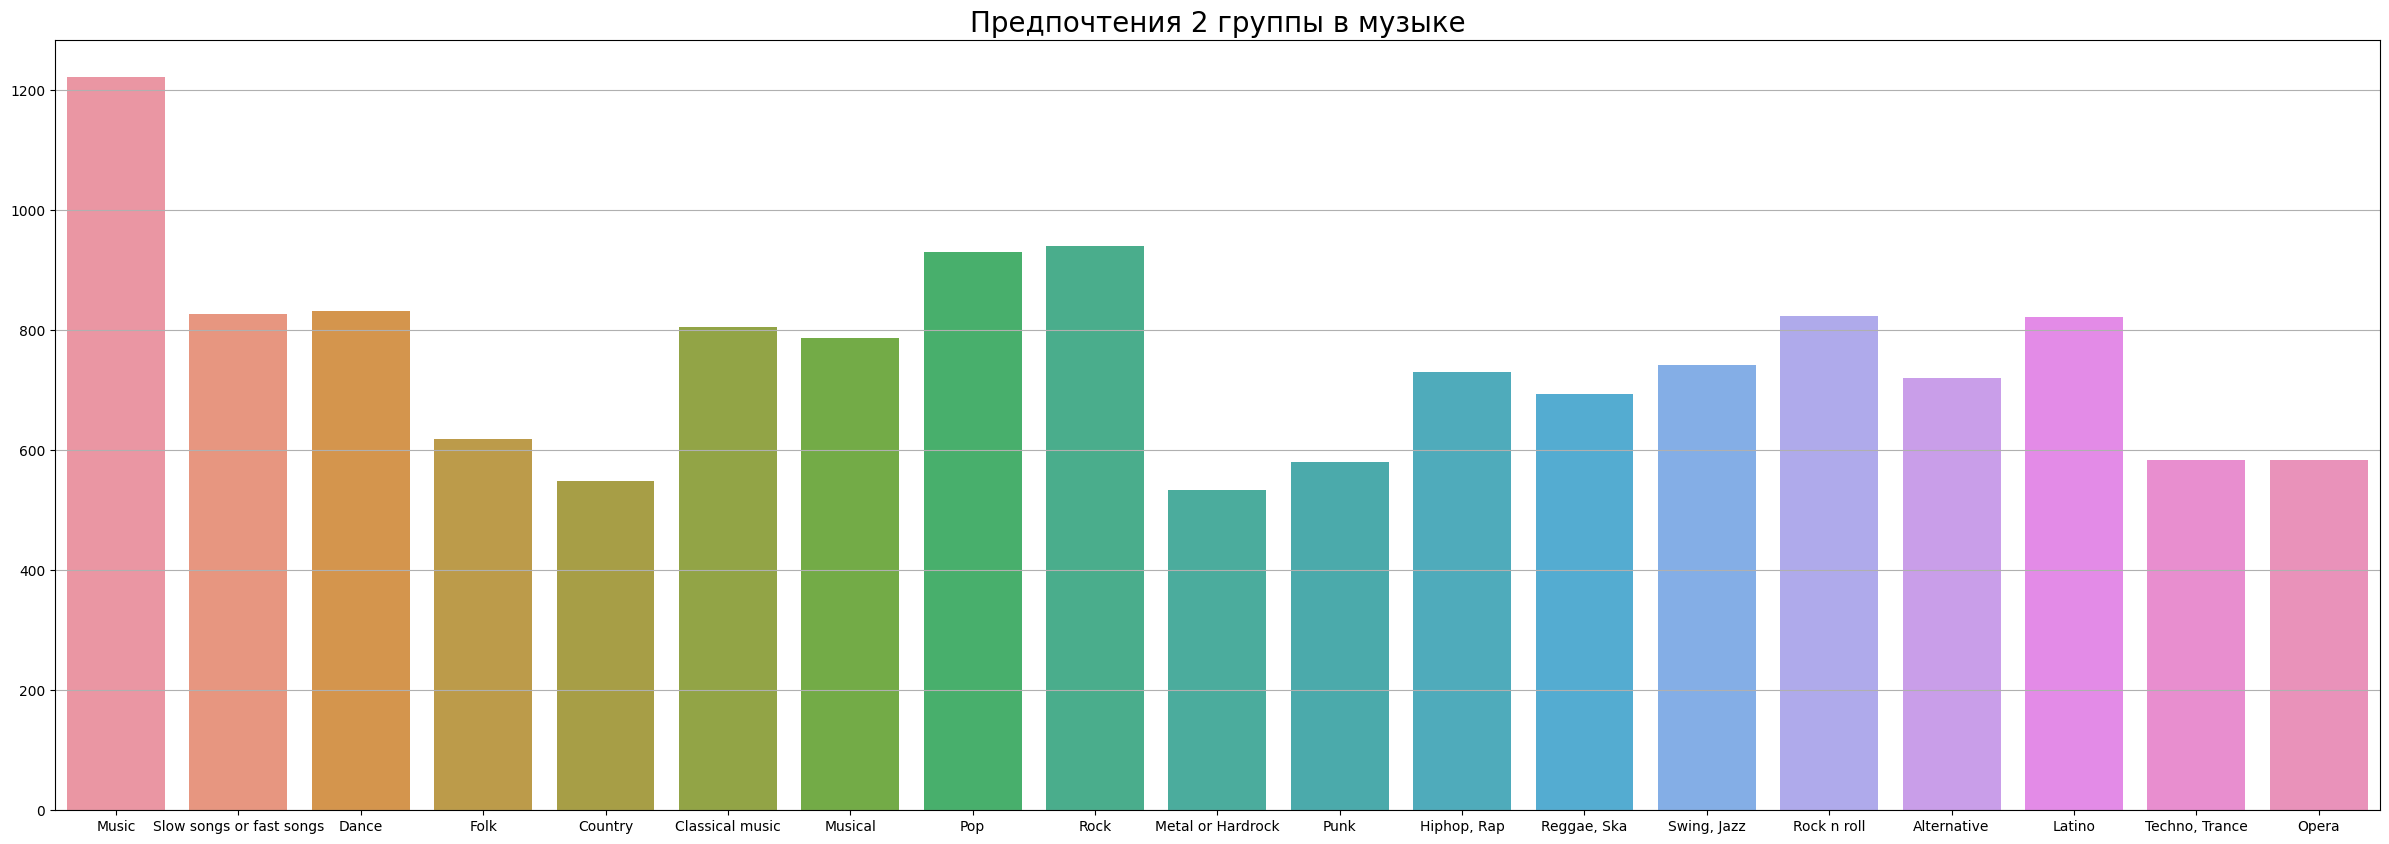

In [92]:
g_= []
for i in group_1:
  g_.append(list(responses.loc[:,'Music':'Opera'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'Music':'Opera'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'Music':'Opera'].columns.values, y = sum)
ax.set_title("Group 2's preferences in music",fontsize=20)
plt.show()

<b>Note:</b>

With this band people prefer the following genres of music rock, pop and in general slow or fast songs.

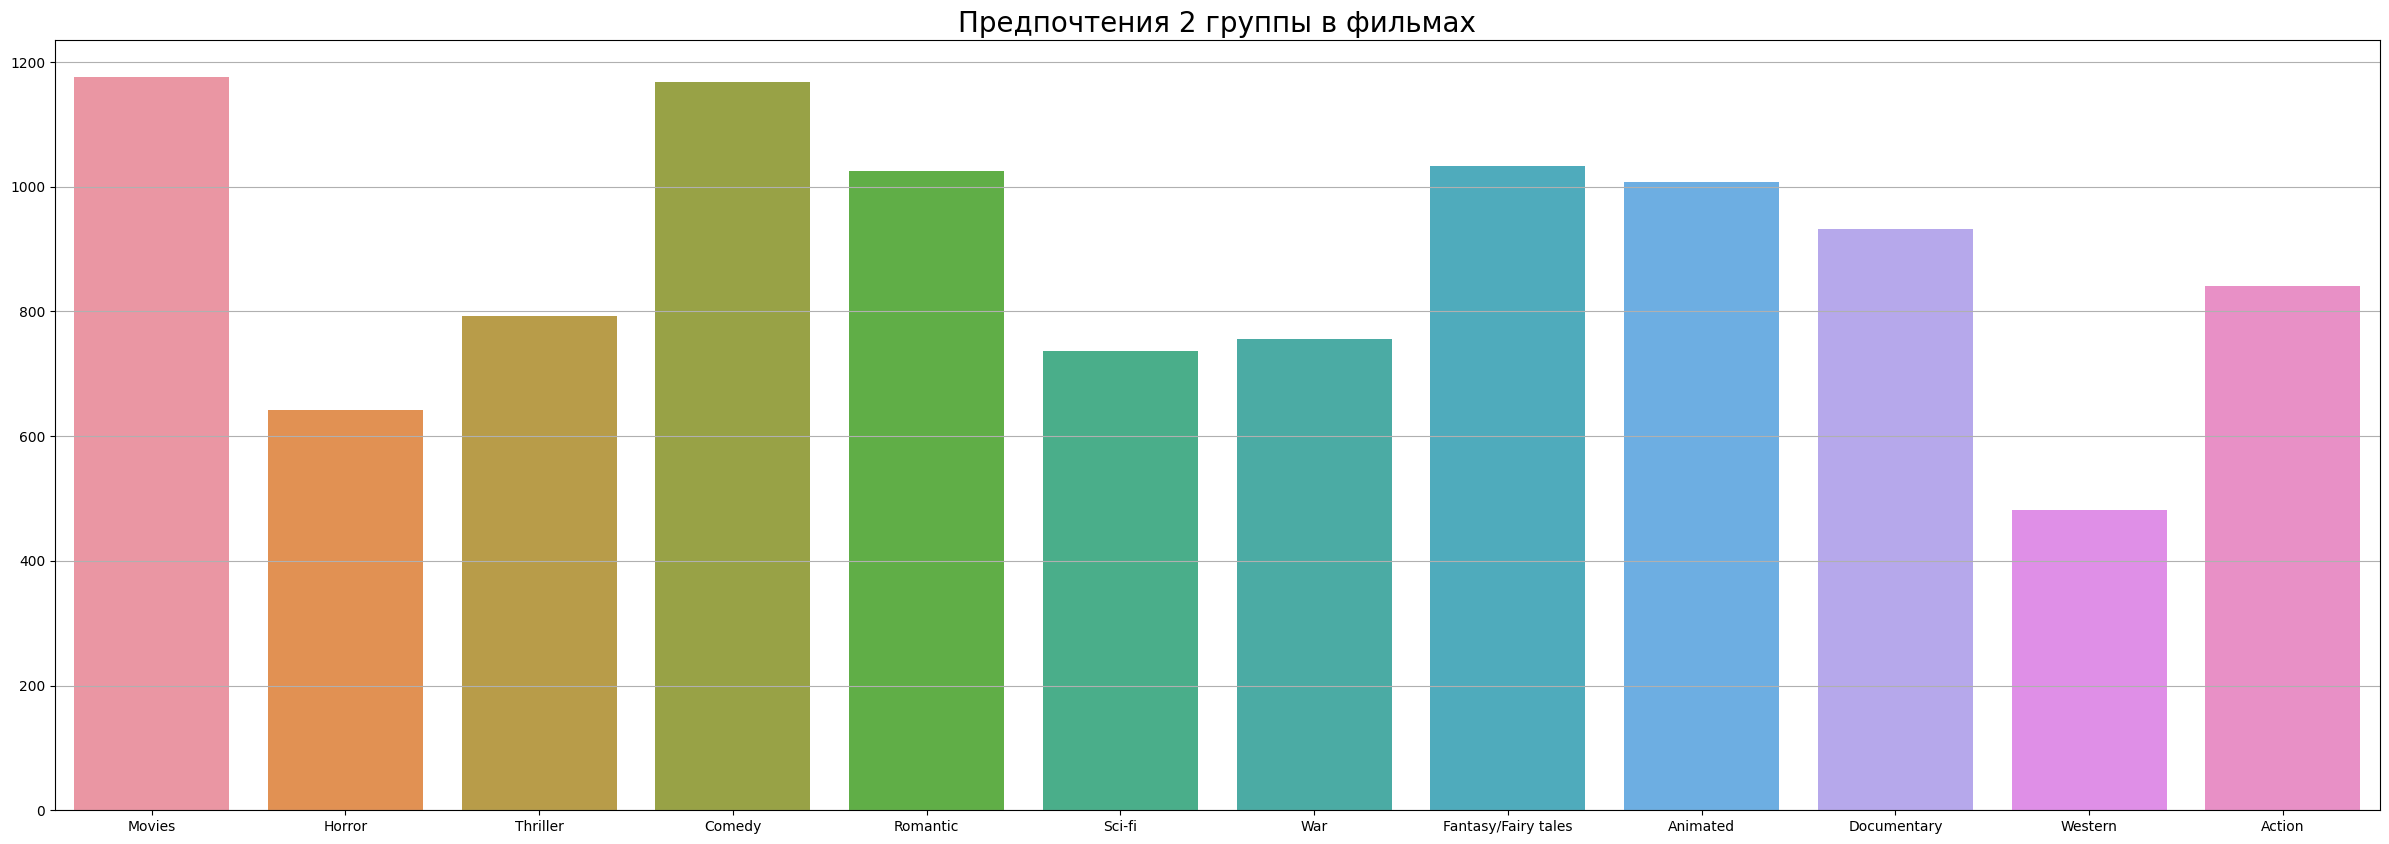

In [93]:
g_= []
for i in group_1:
  g_.append(list(responses.loc[:,'Movies':'Action'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'Movies':'Action'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(30, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'Movies':'Action'].columns.values, y = sum)
ax.set_title('Group 2 preferences in the film',fontsize=20)
plt.show()

<b>Note:</b>

People in this group indicate that they are interested in such films as comedy, thriller, sci-fi,war, fantasy, animated, documentary, action.

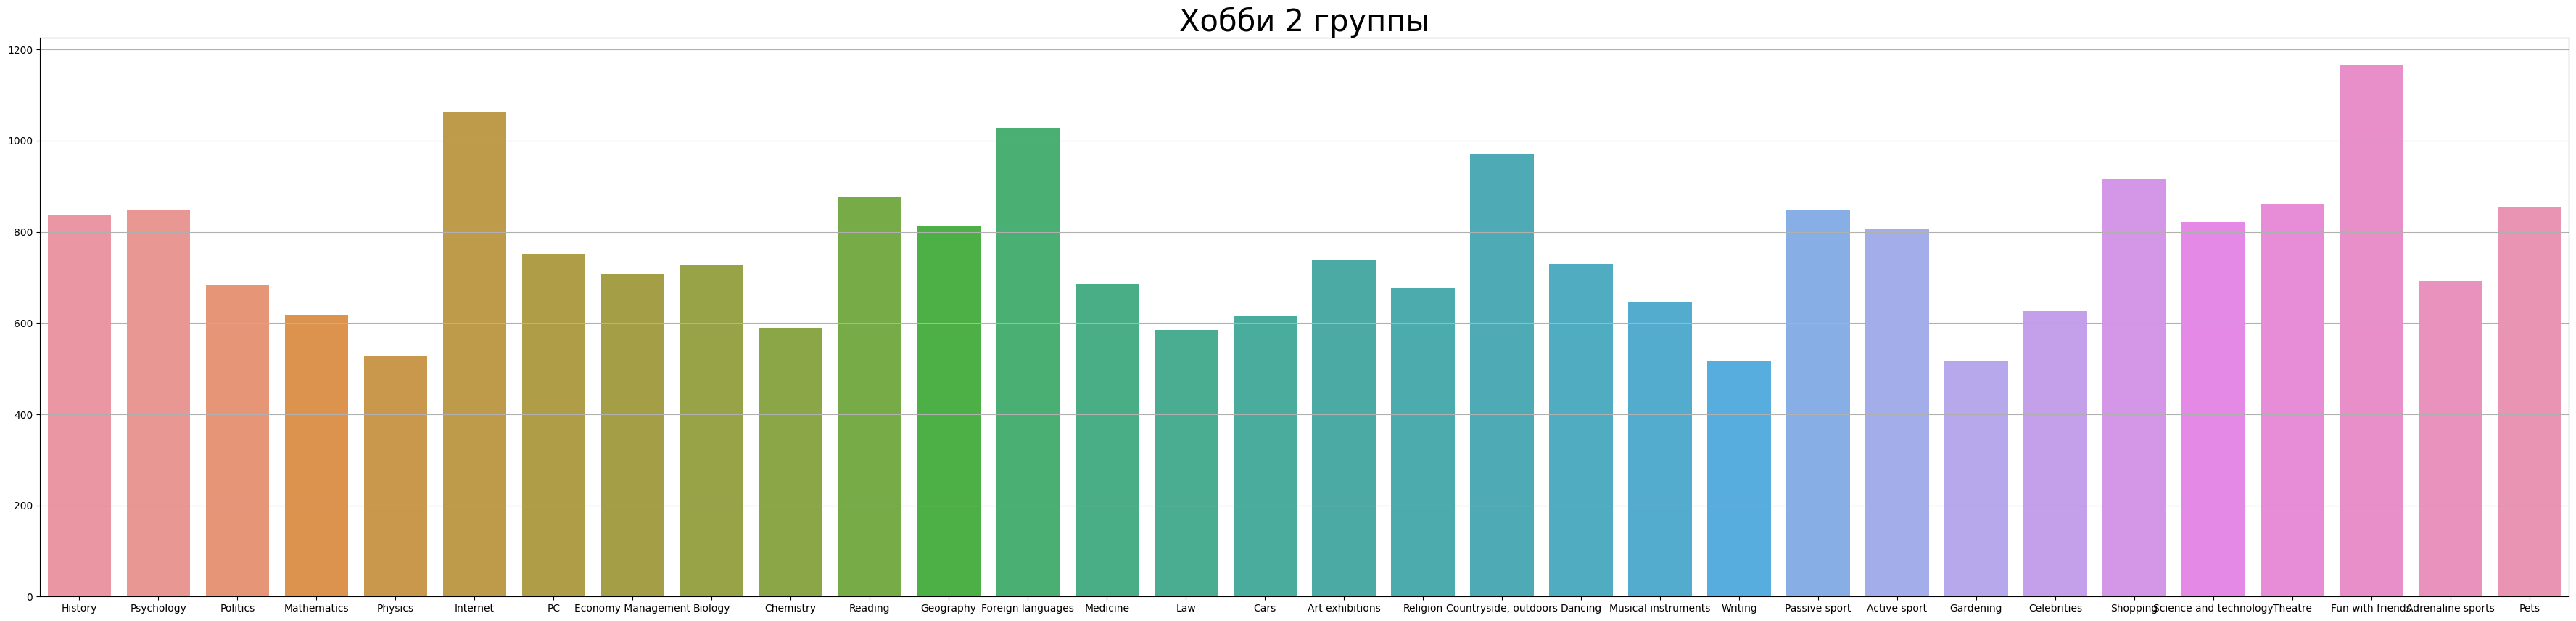

In [94]:
g_= []
for i in group_1:
  g_.append(list(responses.loc[:,'History':'Pets'].iloc[i]))
df= pd.DataFrame(g_)
df.columns=[list(responses.loc[:,'History':'Pets'].columns.values)]
sum = []
for c in df.columns:
  sum.append(df[c].sum())

plt.figure(figsize=(45, 10))
plt.grid()
ax = sns.barplot(x =responses.loc[:,'History':'Pets'].columns.values, y = sum)
ax.set_title('Group 2 hobbies',fontsize=30)
plt.show()

<b>Note:</b>

People from this cluster surf the Internet a lot, study foreign languages, like to go to the countryside, do sports, and spend time with friends.

### Conclusion

Two groups emerged from the clustering based on demographic data. They are quite close to each other in terms of interests - in general, about 50% of preferences coincided. However, differences are still noticeable. For example, group 1 likes classical music more, while people from cluster 2 prefer dance music. In films, group 1 likes romantic films more than group 2. If we analyse the hobbies, we can see that people from cluster 1 spend more time on reading than cluster 2. However, people in group 2 are more into cars than group 1.